Data Mining - Task 1

1. univariate analysis - description of the variables by methods of descriptive statistics: central tendency, dispersion, shape of the distribution (skewness, kurtosis), frequencies for categorical attributes, graphics (boxplots, histograms, density)

2. bivariate/multivariate analysis - the study of the dependence of variables by calculating correlations, independence tests, tests that compare several populations (such as the mean test), visualization (scatter plots on combinations of 2 variables; 3d graphs; scatter plots on principal components; non-linear maps in two-dimensional space:Sammon, t-SNE, uMap; projections extracted by projection pursuit methodologies - the tourr package in R; conditioned boxplots; stacked or superimposed histograms; corrgrams)

3. for a further analysis through classification, identify the variables that have predictive power for the target variable. Use conditional boxplots and independence tests.

In [ ]:
library(tidyverse)
library(ggplot2)
library(knitr)
library(dplyr)
library(tidyr)
library(forcats)
library(purrr)
library(stats)

install.packages("corrplot")

install.packages("vcd")
library(vcd)

install.packages("kableExtra")
library(kableExtra)

install.packages("e1071")
library(e1071)

install.packages("gridExtra")
library(gridExtra)

install.packages("cowplot");
library(cowplot)

install.packages("reshape2")
library(reshape2)

install.packages("scatterplot3d")
library(scatterplot3d)

install.packages("tsne")
library(tsne)

install.packages("umap")
library(umap)

install.packages("tourr")
library(tourr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’


Loading required package: grid

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘webshot’



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rc

In [ ]:
### Unzip the csv with airlines delay and print the table

unzip('airlines_delay.csv.zip')
tabel <- read.csv('airlines_delay.csv', stringsAsFactors = FALSE)
# print(tabel)

In [ ]:
## Separe the numeric and categorical data in two tables

name_cols <- colnames(tabel)

numeric_name_cols <- name_cols[sapply(tabel, is.numeric)]
#print(numeric_name_cols)

numeric_cols <- sapply(tabel, is.numeric)
numeric_data <- tabel[, numeric_cols]
#print(numeric_data)

categorical_name_cols <- name_cols[sapply(tabel, is.factor) | sapply(tabel, is.character)]
#print(categorical_name_cols)

categorical_cols <- sapply(tabel, is.factor) | sapply(tabel, is.character)
categorical_data <- tabel[, categorical_cols]
categorical_data <- data.frame(lapply(categorical_data, as.factor))
# print(categorical_data)

Univariate :

In [ ]:
## Calculate measures of central tendency

# Central tendency refers to a measure of the central position of data in a data set.

## Min and Max

minim <- apply(numeric_data, 2, min)
maxim <- apply(numeric_data, 2, max)

## Mean

# The sum of the values in the data set divided by the number of values in the data set.

means <- colMeans(numeric_data)
#print(means)

## Median

# The value in the middle of the data set, when it is sorted in ascending or descending order.

medians <- sapply(numeric_data, median)
#print(medians)

## Mode

# The value that appears most often in the data set.

## For numerical numbers
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

modes_numeric <- apply(numeric_data, 2, Mode)
#print(modes_numeric)

## For categorical numbers
modes_categorical <- apply(categorical_data, 2, Mode)
#print(modes_categorical)

##Print a nice tabel with measure for central tendency

cat("Central tendency for numerical values:\n")
central_tendency <- data.frame(min = minim, max = maxim, mean = means, median = medians, mode = modes_numeric)
kable(central_tendency, format="simple", align = "c")

cat("\n\n")
cat("Central tendency for categorical values:\n")
central_tendency <- data.frame(mode = modes_categorical)
kable(central_tendency, format="simple", align = "c")



Central tendency for numerical values:




             min    max         mean        median    mode 
----------  -----  ------  --------------  --------  ------
Flight        1     7814    2427.9279880     1809      16  
Time         10     1439    802.7281611      795      360  
Length        0     655     132.2021035      115       80  
DayOfWeek     1      7       3.9296658        4        4   
Class         0      1       0.4454431        0        0   



Central tendency for categorical values:




               mode 
------------  ------
Airline         WN  
AirportFrom    ATL  
AirportTo      ATL  

In [ ]:
## Calculate measures of spread

# The spread refers to how far the values in the data set are from each other.

## Variance

# Measures how much the values in the data set deviate from the arithmetic mean.

variance <- sapply(numeric_data, var)
# print(variance)

## Standard deviation

# Represents the square root of the variation and is used to measure the dispersion of the values in the data set.

sd <- sapply(numeric_data, sd)
#print(sd)

## Quartiles and interquartile range

# Quartiles divide the data set into four equal parts.
# IQR represents the distance between the first and third quartiles.
# These statistics are used to measure data variability, as well as to detect possible extreme values (outliers).

quantiles <- t(sapply(numeric_data, quantile, probs = c(0.25, 0.5, 0.75)))
#print(quantiles)
iqr <- sapply(numeric_data, IQR)
#print(iqr)

cat("Measures of spread for numeric values:\n")
spread <- data.frame(variance = variance, sd = sd, Q1 = quantiles[, 1], Q2 = quantiles[, 2], Q3 = quantiles[, 3], IQR = iqr)
kable(spread, format="simple", align = "c")



Measures of spread for numeric values:




               variance           sd         Q1      Q2      Q3     IQR  
----------  --------------  --------------  -----  ------  ------  ------
Flight       4.274274e+06    2067.4316995    712    1809    3745    3033 
Time         7.730933e+04    278.0455456     565    795     1035    470  
Length       4.916400e+03     70.1170446     81     115     162      81  
DayOfWeek    3.665944e+00     1.9146656       2      4       5       3   
Class        2.470240e-01     0.4970151       0      0       1       1   

In [ ]:
## Form of distribution

## Skewness (measures of asymmetry)

# Skewness tells us how symmetrical the distribution is.
# A symmetric distribution has a skewness of 0.
# If the skewness is greater than 0, the distribution is tall to the right and
# it indicates a narrower and more concentrated distribution around the mean.
# If it is less than 0, the distribution is tall to the left and
# it indicates a distribution that is wider and less concentrated around the mean.

skewness_data <- apply(numeric_data, 2, skewness)
#print(skewness_data)

## Kurtosis (flatten or "tall")

# Kurtosis tells us how flattened or "tall" the distribution is relative to a normal distribution.
# A normal distribution has a kurtosis of 3.
# If the kurtosis is less than 3, the distribution is "flatter" than the normal distribution (it has shorter tails).
# If the kurtosis is greater than 3, the distribution is "taller" than the normal distribution (it has longer tails).

kurtosis_data <- apply(numeric_data, 2, kurtosis)
# print(kurtosis_data)

cat("Form of distribution for numeric values:\n")
distribution <- data.frame(skewness = skewness_data, kurtosis = kurtosis_data)
kable(distribution, format="simple", align = "c")

## Interpretation

# Skewness: all the distributions have skewness greater than 0, so it can be said that their distribution is positively asymetric,
# which means that the tail of the distribution extends more to the right and that most of the values are on the left side of the distribution.
# This indicates that positive extreme values (outliers) are present and that the distribution is not symmetric around its central value.

# Kurtosis: all the distributions have kurtosis less than 3, so their distribution has a flatter shape than the normal (platykurtic) distribution.
# This suggests that the data has fewer extreme values than a normal distribution would have, which may indicate that the data set does not contain abnormal values
# or that they have been removed by data processing. Also, a platykurtic distribution may suggest that the variables do not have significant variation,
# so the distribution is concentrated around the mean.

## Conclusion: There is a probability than in the case of the normal distribution to obtain extreme values and these values can have a significant impact on the results

Form of distribution for numeric values:




             skewness      kurtosis  
----------  -----------  ------------
Flight       0.8688903    -0.3567258 
Time         0.0763863    -1.0145376 
Length       1.4938938    2.7565649  
DayOfWeek    0.0622857    -1.0932306 
Class        0.2195377    -1.9518068 

In [ ]:
## Frequency for categorical and some numeric attributes

# Frequency for categorical values

for (col in categorical_name_cols) {
  freq <- table(categorical_data[[col]])
  top_vals <- head(sort(freq, decreasing = TRUE), 9)
  other_sum <- sum(freq[!(names(freq) %in% names(top_vals))])
  new_tbl <- data.frame(
    Variable = c(names(top_vals), "Other"),
    Frequency = c(as.vector(top_vals), other_sum)
  )

  cat(sprintf("Frequency for %s:\n\n", col))
  print(new_tbl)
  cat("\n\n")
}

# Frequency for relevant numeric values

for (i in 4:ncol(numeric_data)) {
  col <- colnames(numeric_data)[i]
  freq <- table(numeric_data[[col]])
  top_vals <- head(sort(freq, decreasing = TRUE), 9)
  other_sum <- sum(freq[!(names(freq) %in% names(top_vals))])
  new_tbl <- data.frame(
    Variable = c(names(top_vals), "Other"),
    Frequency = c(as.vector(top_vals), other_sum)
  )

  cat(sprintf("Frequency for %s:\n\n", col))
  print(new_tbl)
  cat("\n\n")
}

Frequency for Airline:

   Variable Frequency
1        WN     94097
2        DL     60940
3        OO     50254
4        AA     45656
5        MQ     36604
6        US     34500
7        XE     31126
8        EV     27983
9        UA     27619
10    Other    130603


Frequency for AirportFrom:

   Variable Frequency
1       ATL     34449
2       ORD     24822
3       DFW     22153
4       DEN     19843
5       LAX     16657
6       IAH     15821
7       PHX     15557
8       DTW     13136
9       LAS     11918
10    Other    365026


Frequency for AirportTo:

   Variable Frequency
1       ATL     34440
2       ORD     24871
3       DFW     22153
4       DEN     19848
5       LAX     16656
6       IAH     15819
7       PHX     15558
8       DTW     13146
9       LAS     11918
10    Other    364973


Frequency for DayOfWeek:

  Variable Frequency
1        4     91445
2        3     89746
3        5     85247
4        1     72769
5        2     71340
6        7     69879
7        6     58

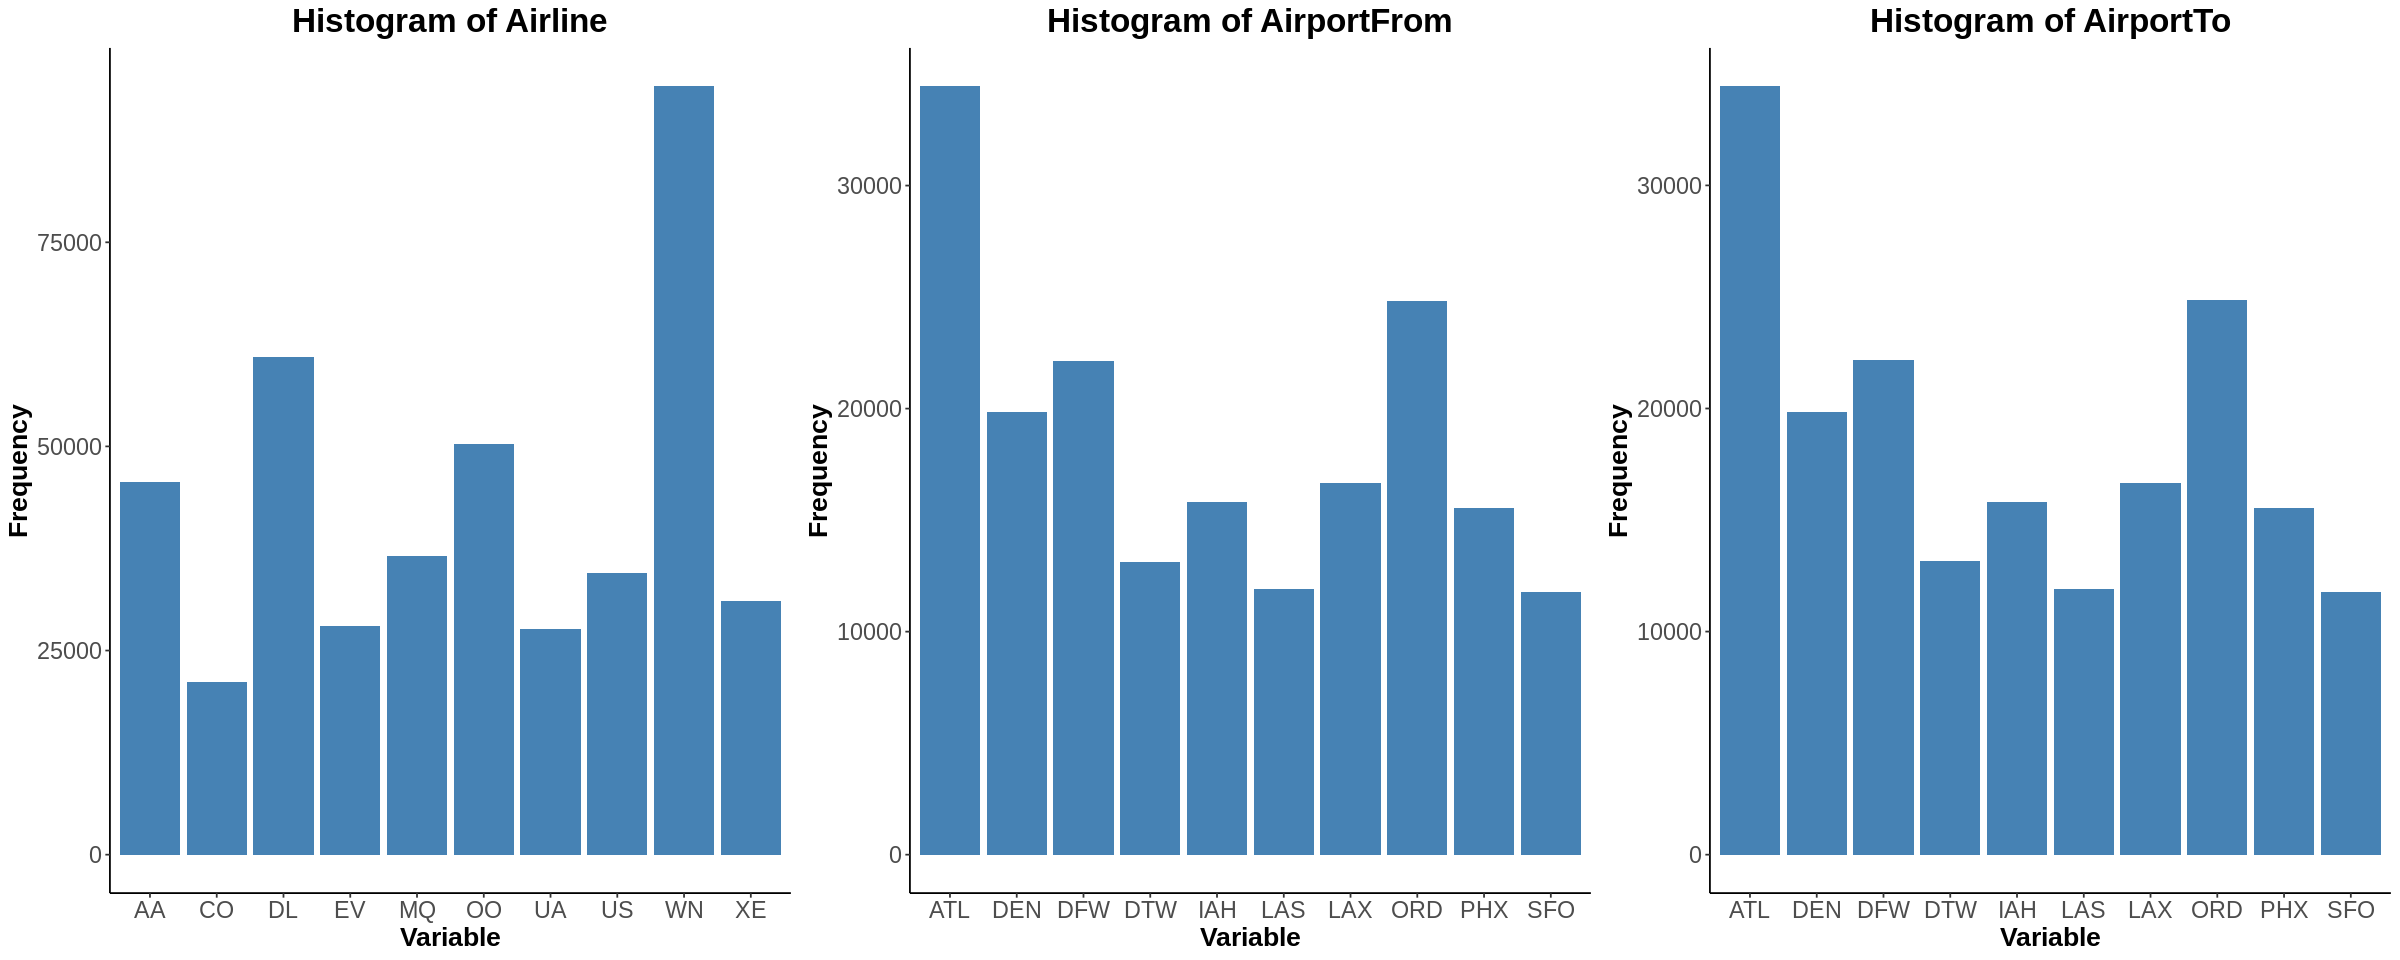

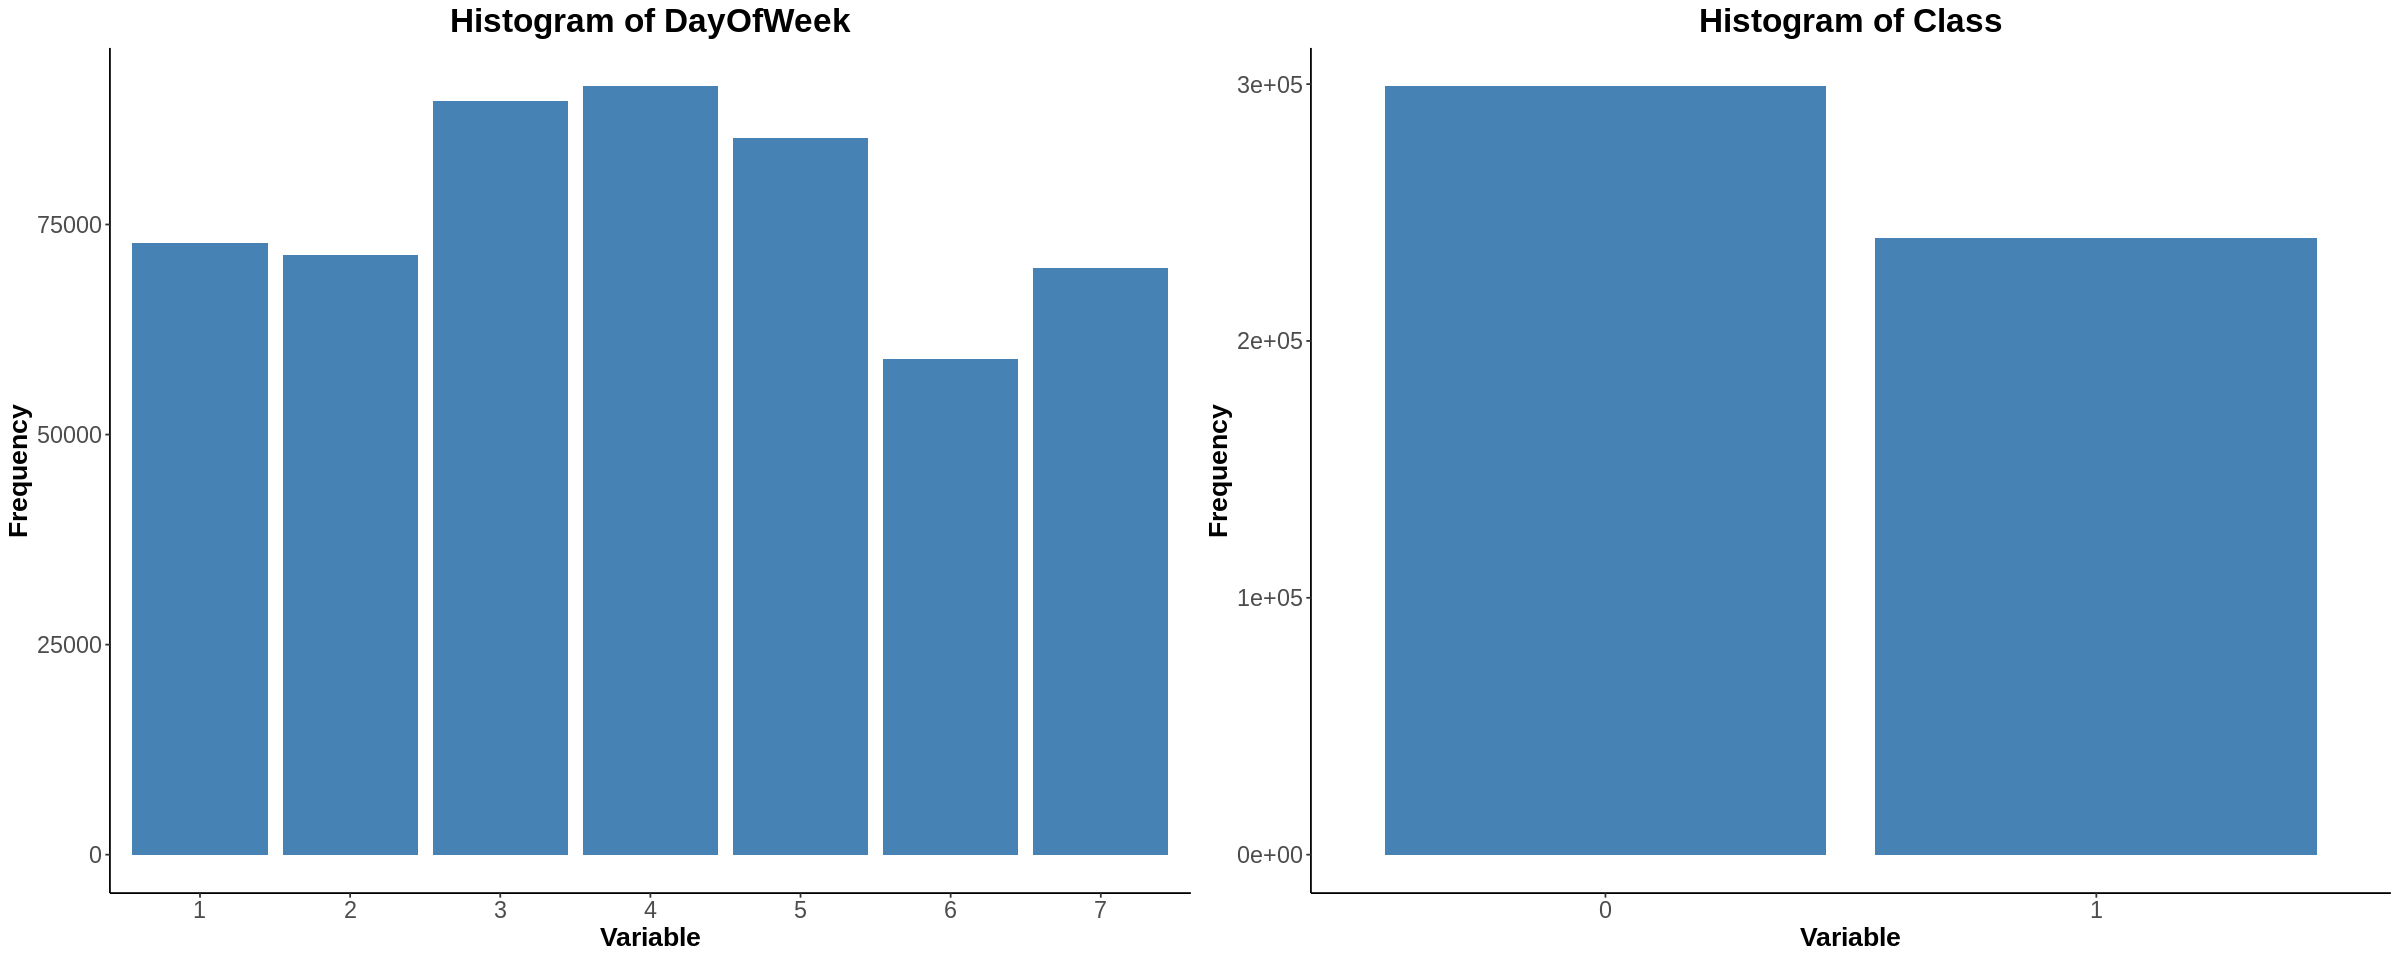

In [ ]:
## Histograms for frequency attributes

options(repr.plot.width = 20, repr.plot.height = 8)

# Categorical values

plots <- list()

for (col in categorical_name_cols) {
  freq <- table(categorical_data[[col]])
  top_vals <- head(sort(freq, decreasing = TRUE), 10)
  other_sum <- sum(freq[!(names(freq) %in% names(top_vals))])
  new_tbl <- data.frame(
    Variable = c(names(top_vals), "Other"),
    Frequency = c(as.vector(top_vals), other_sum)
  )

  p <- ggplot(new_tbl[new_tbl$Variable != "Other", ], aes(x=Variable, y=Frequency)) +
    geom_bar(stat="identity", fill="steelblue") +
    ggtitle(sprintf("Histogram of %s", col)) +
    xlab("Variable") +
    ylab("Frequency") +
    theme(plot.title = element_text(hjust = 0.5, size=20, face="bold")) +
    theme(panel.background = element_rect(fill = "white"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.text = element_text(size=14),
        axis.title = element_text(size=16, face="bold"))

  plots[[col]] <- p
}

grid.arrange(grobs = plots, plot_spacer(height = unit(2, "cm")), nrow = 1)

# Numeric values

plots <- list()

for (i in 4:ncol(numeric_data)) {
  col <- colnames(numeric_data)[i]
  freq <- table(numeric_data[[col]])
  top_vals <- head(sort(freq, decreasing = TRUE), 10)
  other_sum <- sum(freq[!(names(freq) %in% names(top_vals))])
  new_tbl <- data.frame(
    Variable = c(names(top_vals), "Other"),
    Frequency = c(as.vector(top_vals), other_sum)
  )

  p <- ggplot(new_tbl[new_tbl$Variable != "Other", ], aes(x=Variable, y=Frequency)) +
    geom_bar(stat="identity", fill="steelblue") +
    ggtitle(sprintf("Histogram of %s", col)) +
    xlab("Variable") +
    ylab("Frequency") +
    theme(plot.title = element_text(hjust = 0.5, size=20, face="bold")) +
    theme(panel.background = element_rect(fill = "white"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.text = element_text(size=14),
        axis.title = element_text(size=16, face="bold"))

  plots[[col]] <- p
}

grid.arrange(grobs = plots, plot_spacer(height = unit(2, "cm")), nrow = 1)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


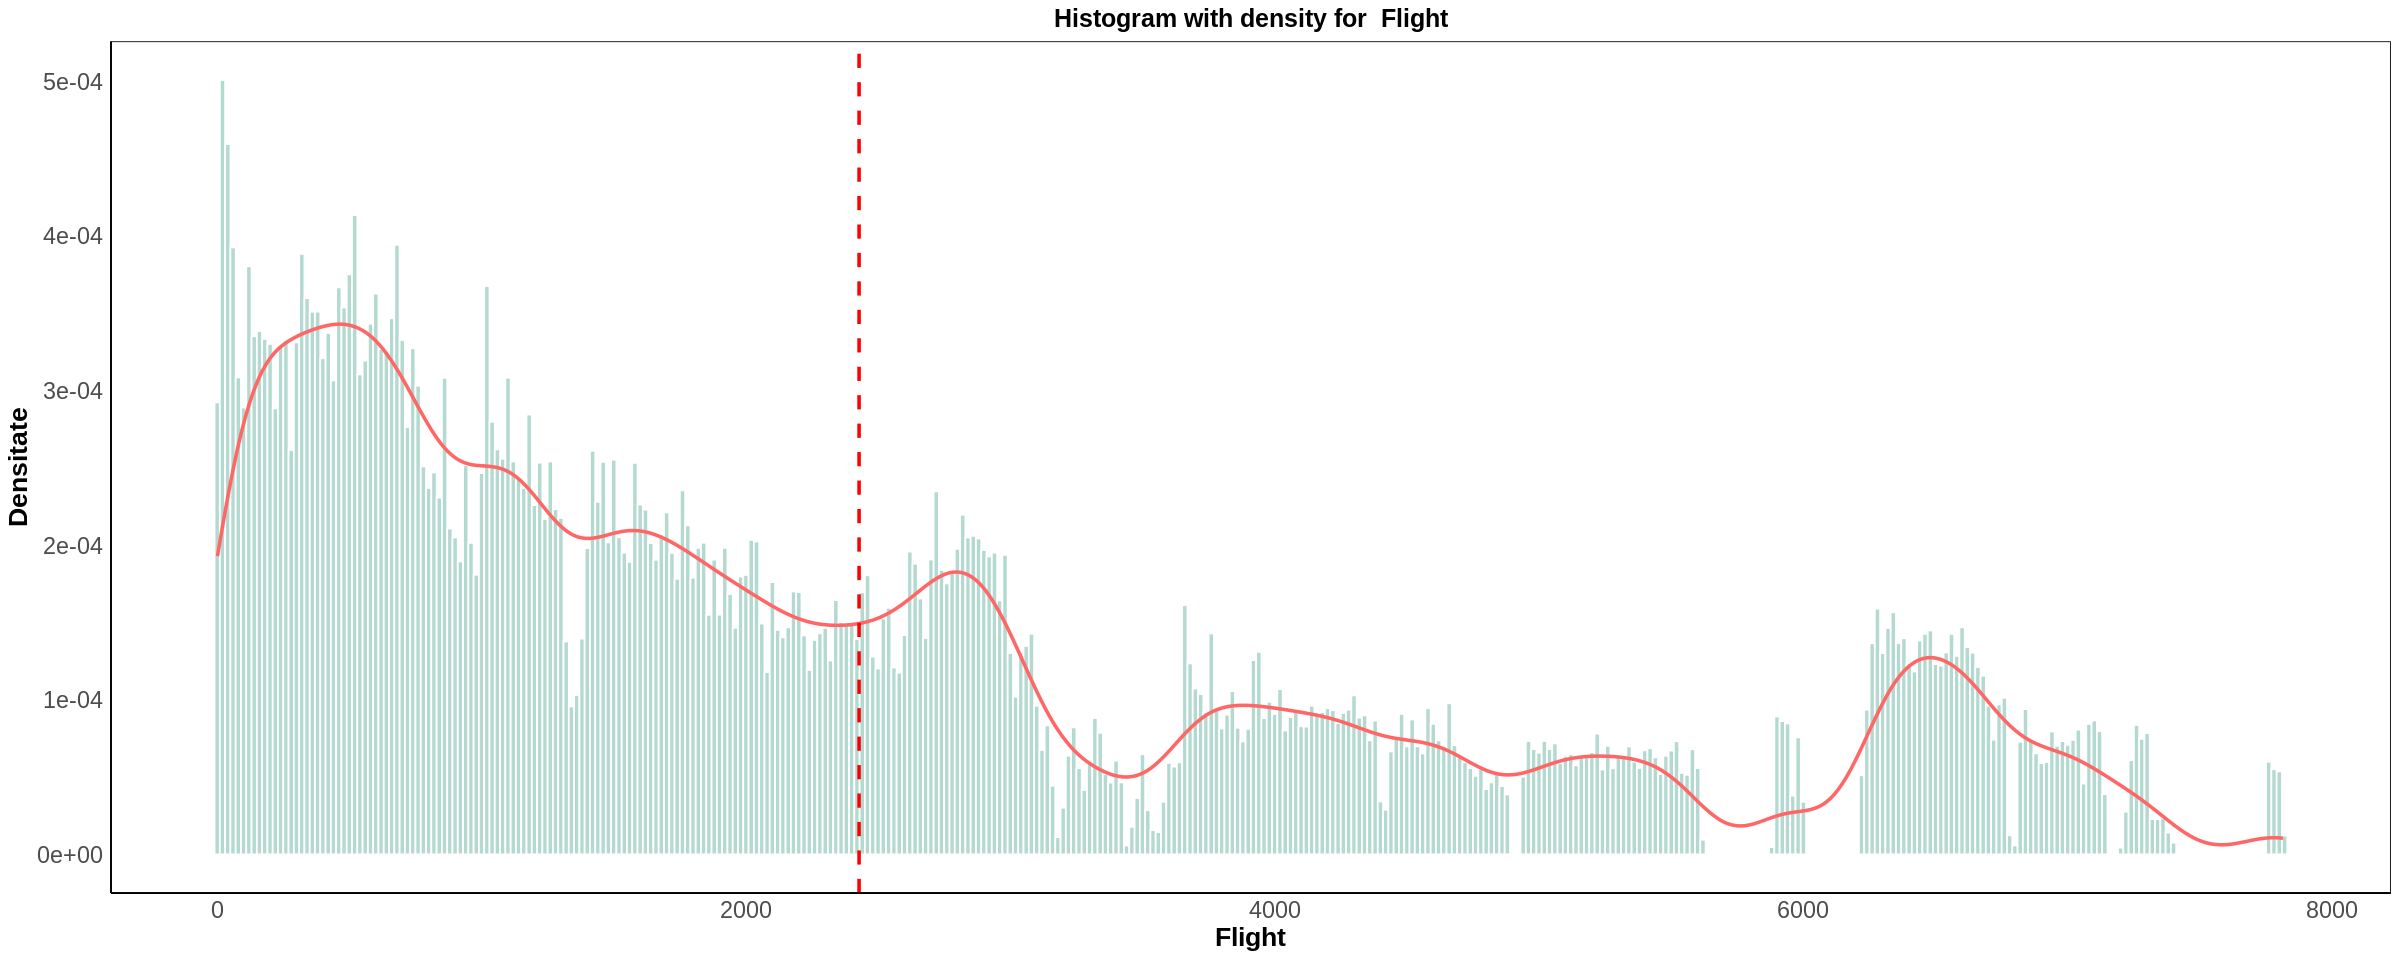

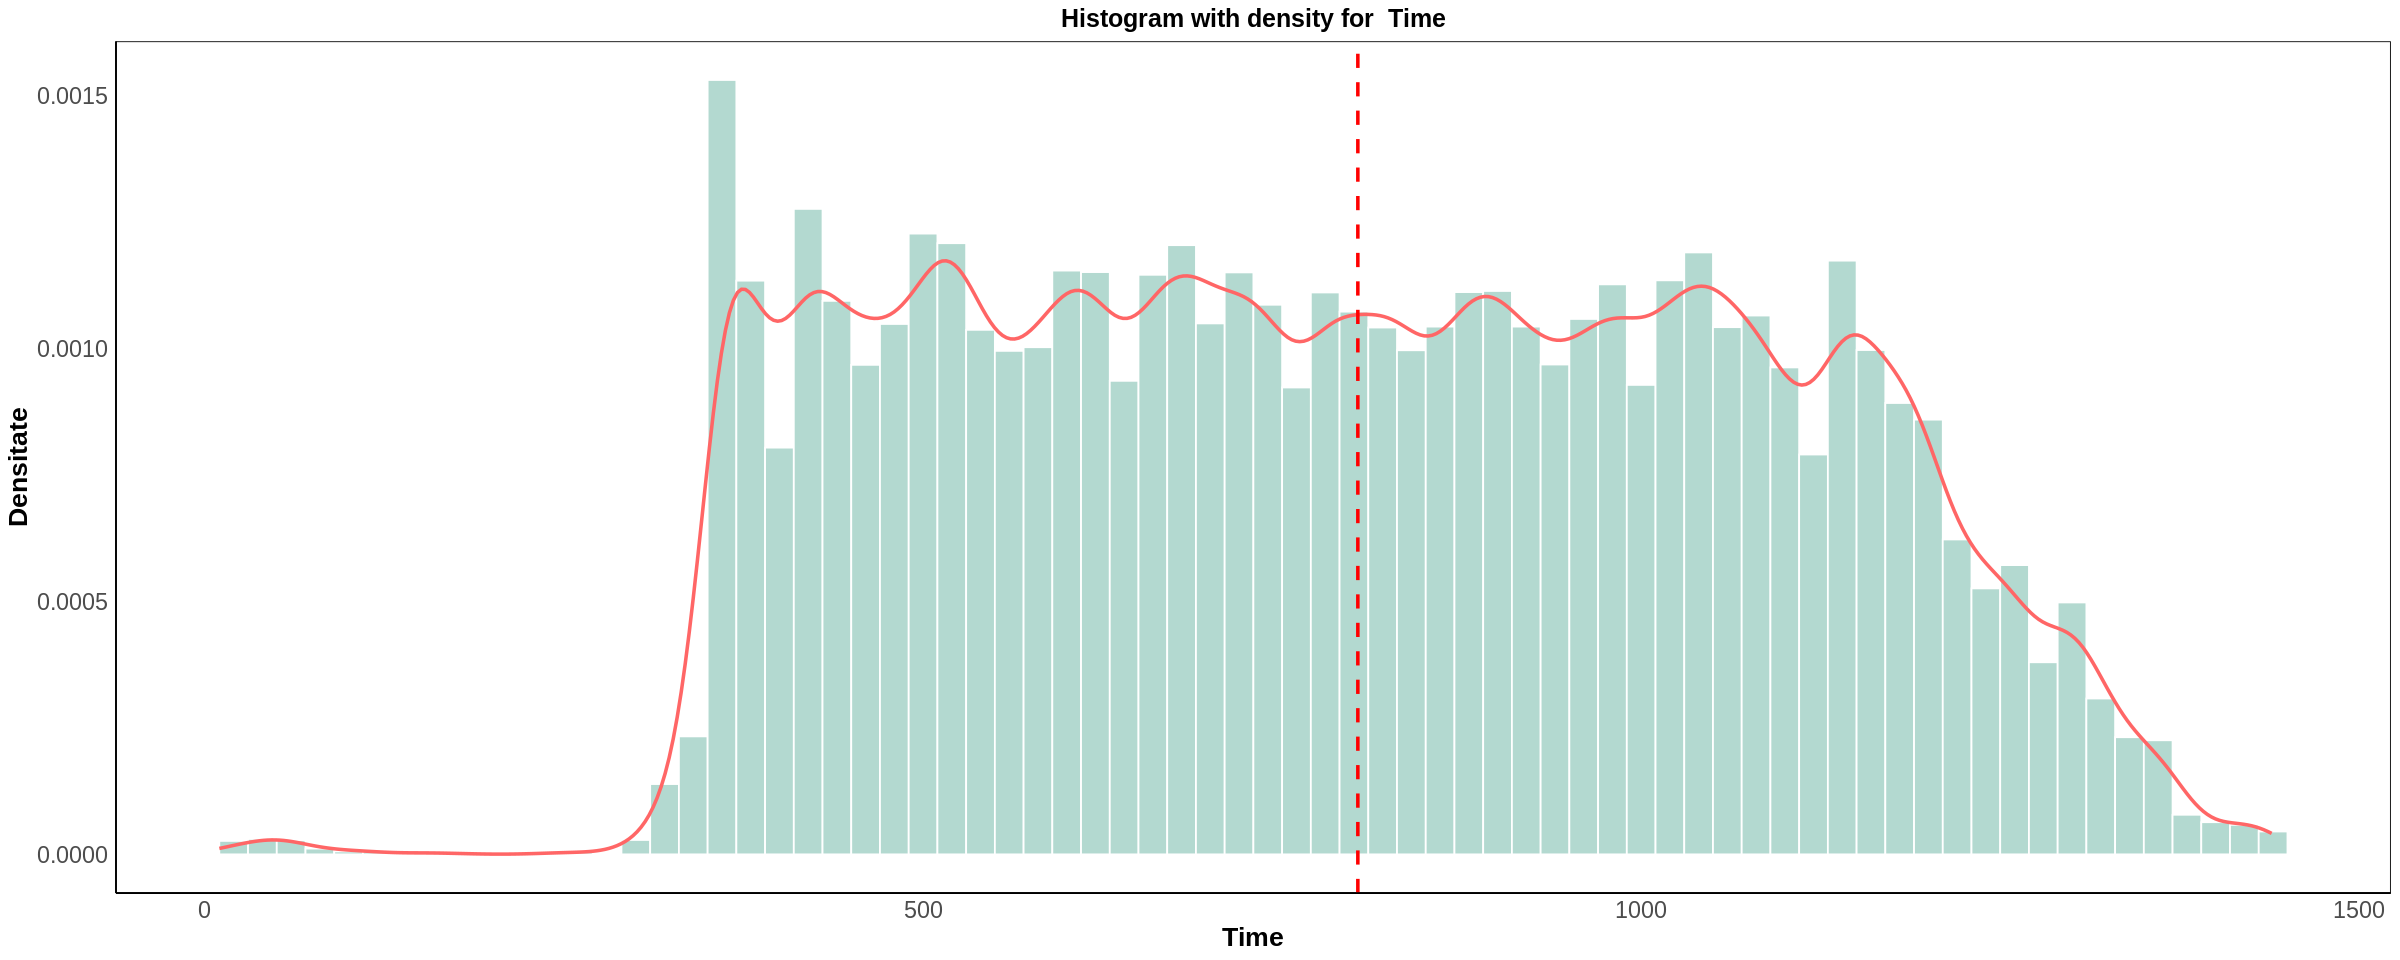

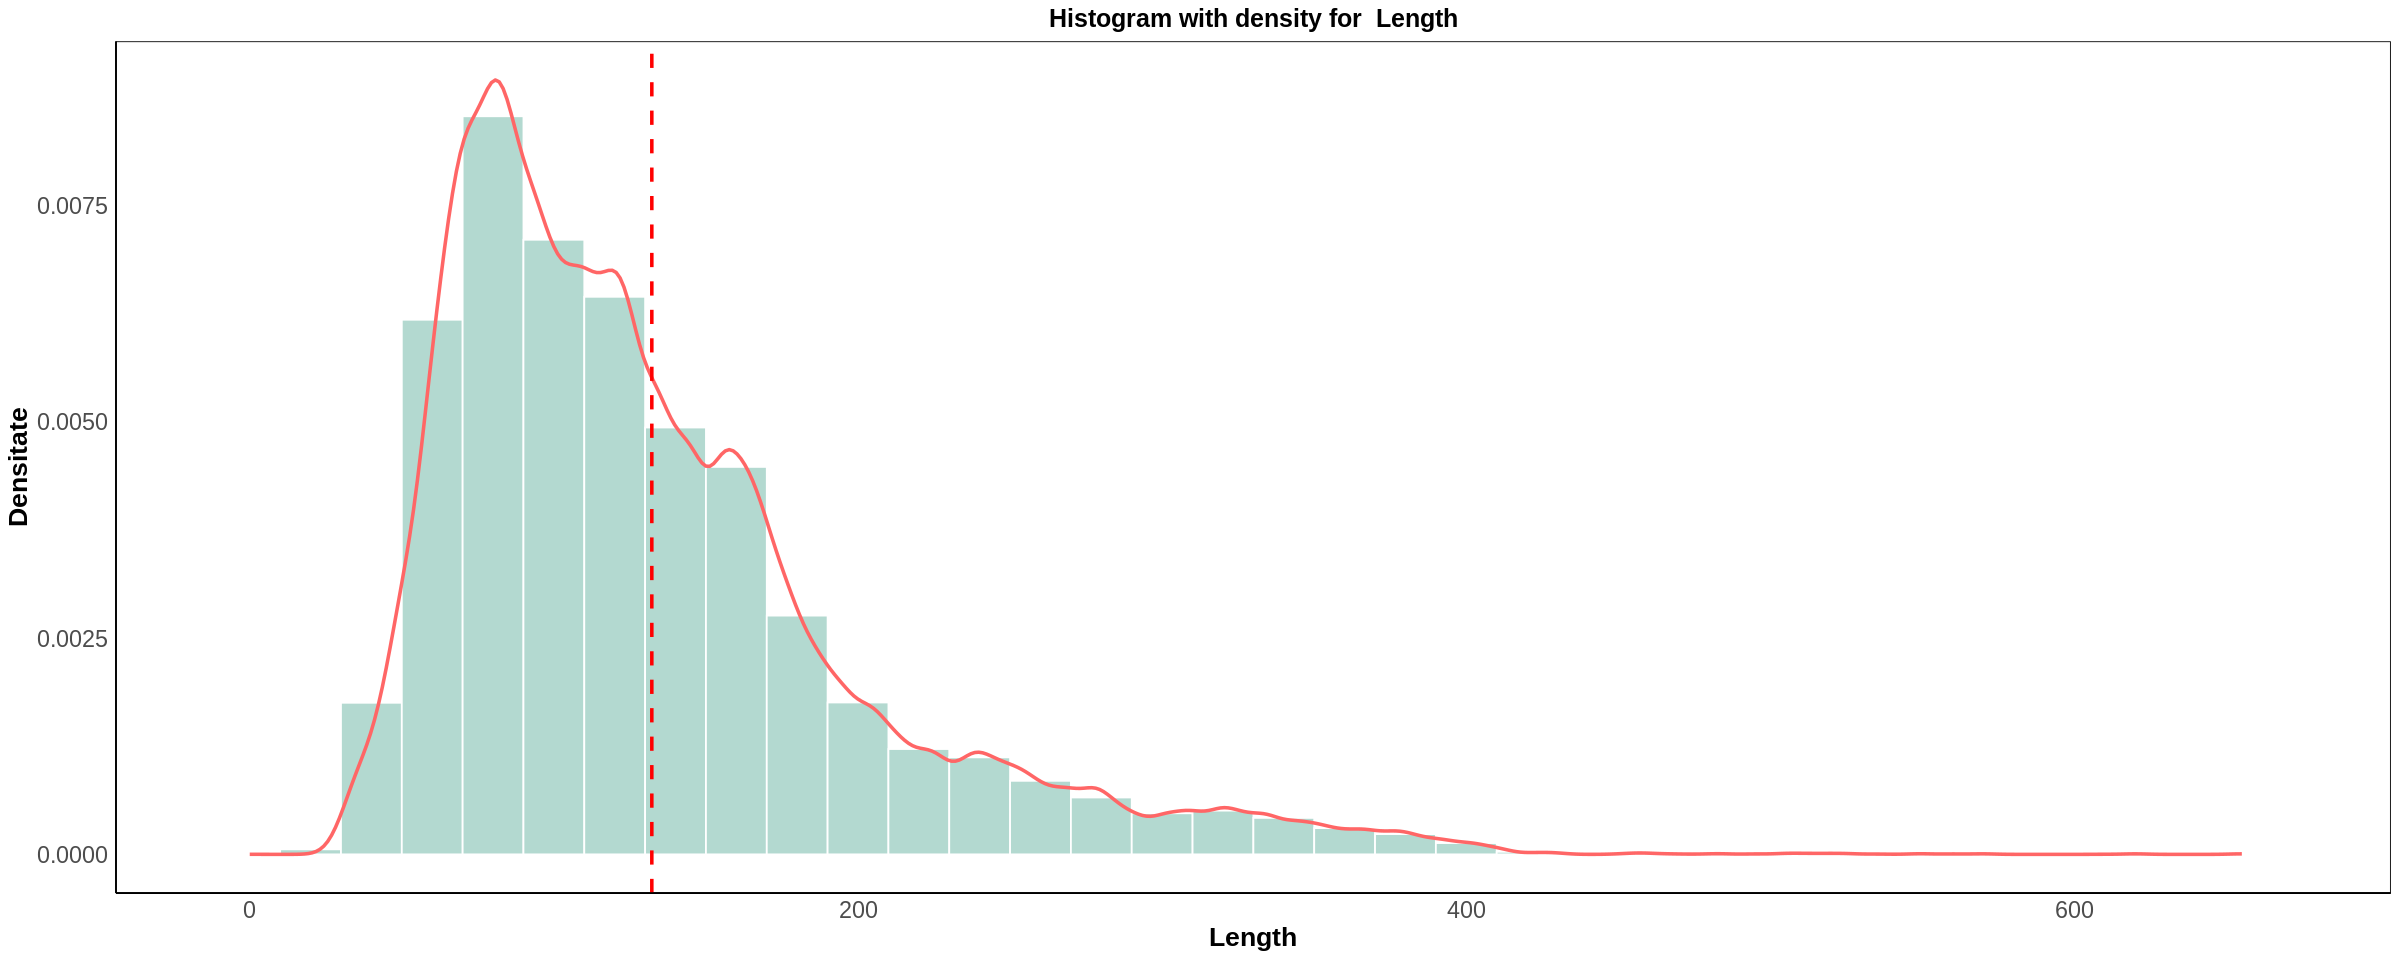

In [ ]:
## Histograms for numerical attributes with density

df <- numeric_data
df <- df %>% select(-Class)
df <- df %>% select(-DayOfWeek)

for (i in 1:ncol(df)) {
  col_name <- colnames(df)[i]
  p <- ggplot(df, aes(x = .data[[col_name]])) +
    geom_histogram(aes(y = after_stat(density)), alpha = 0.5, fill = "#69b3a2", color = "white", binwidth = 20) +
    geom_density(color = "#ff6666", size = 1) +
    geom_vline(aes(xintercept = mean(.data[[col_name]])), color = "red", linetype = "dashed", linewidth = 1) +
    labs(title = paste("Histogram with density for ", col_name),
         x = col_name,
         y = "Densitate") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5, size=15, face="bold")) +
      theme(panel.background = element_rect(fill = "white"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.text = element_text(size=14),
        axis.title = element_text(size=16, face="bold"))
  print(p)
}

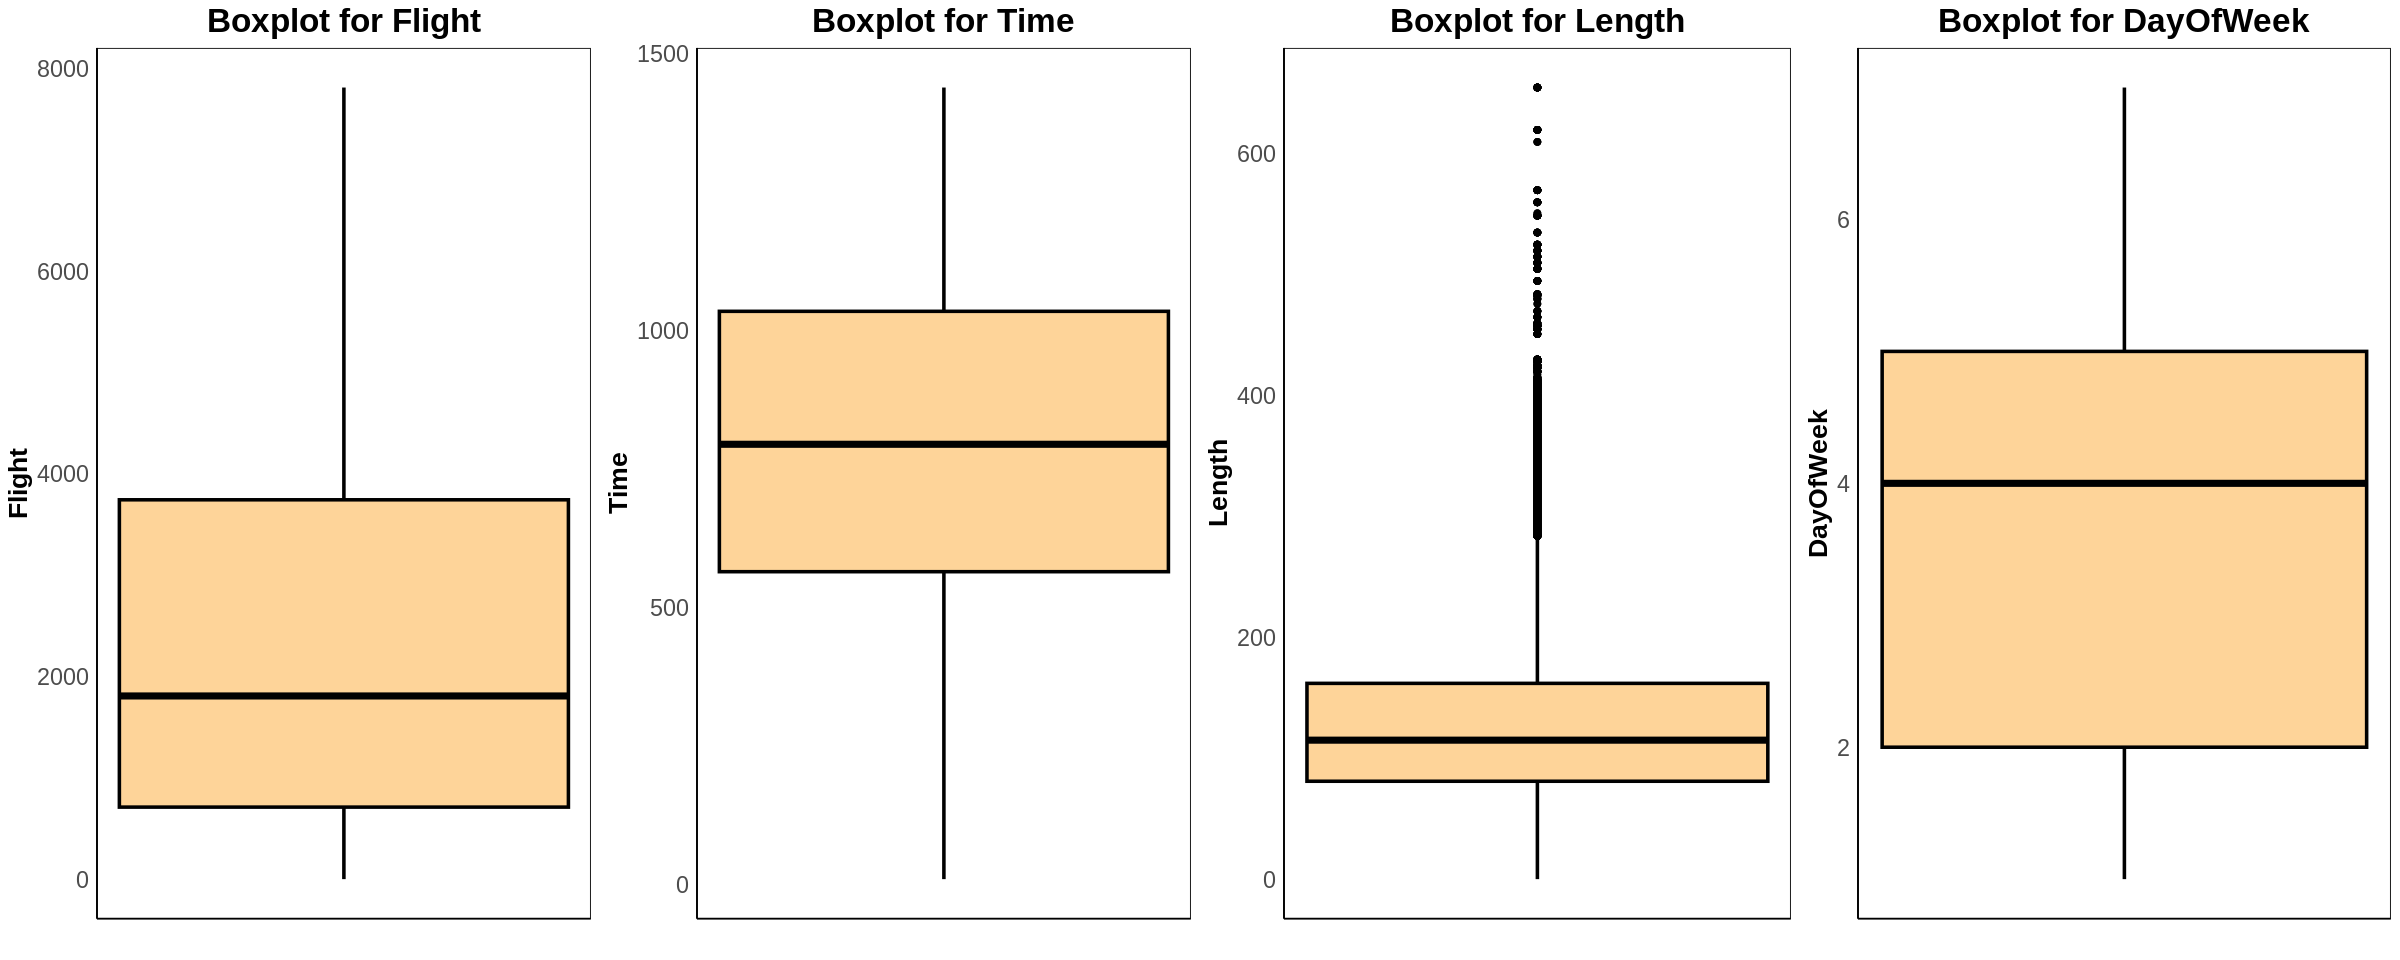

In [ ]:
## Boxplot for numeric attributes

data <- numeric_data
data <- data %>% select(-Class)

plots <- list()
for (i in which(sapply(data, is.numeric))) {
  col_name <- names(data)[i]
  p <- ggplot(data, aes(x = 1, y = .data[[col_name]])) +
    geom_boxplot(fill = "#fdc26d", color = "black", size = 1, alpha = 0.7) +
    labs(title = paste("Boxplot for", col_name),
         x = "",
         y = col_name) +
    theme_minimal() +
    theme(axis.text.x = element_blank()) +
    theme(plot.title = element_text(hjust = 0.5, size=20, face="bold")) +
    theme(panel.background = element_rect(fill = "white"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.text = element_text(size=14),
        axis.title = element_text(size=16, face="bold"))
  plots[[col_name]] <- p
}

grid.arrange(grobs = plots, plot_spacer(height = unit(2, "cm")), nrow = 1)

# A boxplot is a graph used to show the distribution of numerical data, including a measure of central tendency, variance, and the presence of outliers.

# This is composed of the following elements:

# Median - represents the value in the middle of the data set. In the boxplot, the median is represented by the median line inside the square.
# Quartiles - divide the data set into four equal parts. The first and third quartiles are the lower and upper bounds of the middle square of the boxplot.
#             The distance between the first and third quartiles is called the interquartile range (IQR).
# Whiskers - represent the lower and upper bounds of the data set, outside the first and third quartiles.
#             They are represented by a line starting from the square and extending outside it.
# Extreme values (outliers) - are the values that are outside the limits represented by the whiskers. These are represented by dots.


# The interpretation of a boxplot is done as follows:

# The size of the square in the middle of the boxplot shows how spread out the data is around the median.
# If the square is small, then the data is highly concentrated around the median, and if the square is large, the data is more spread out.

# Whiskers represent the variation in the data. If the whiskers are short, then the data are relatively homogeneous, and if they are long, the data are more diverse.

# The extreme values (outliers) are the values that are significantly different from the other data.
# These may be caused by measurement errors or rare events and should be taken into account in data analysis.

# If the square is positioned higher than the median, then the distribution is skewed toward large values,
# and if the square is positioned lower than the median, then the distribution is skewed toward small values.

Multivariate :

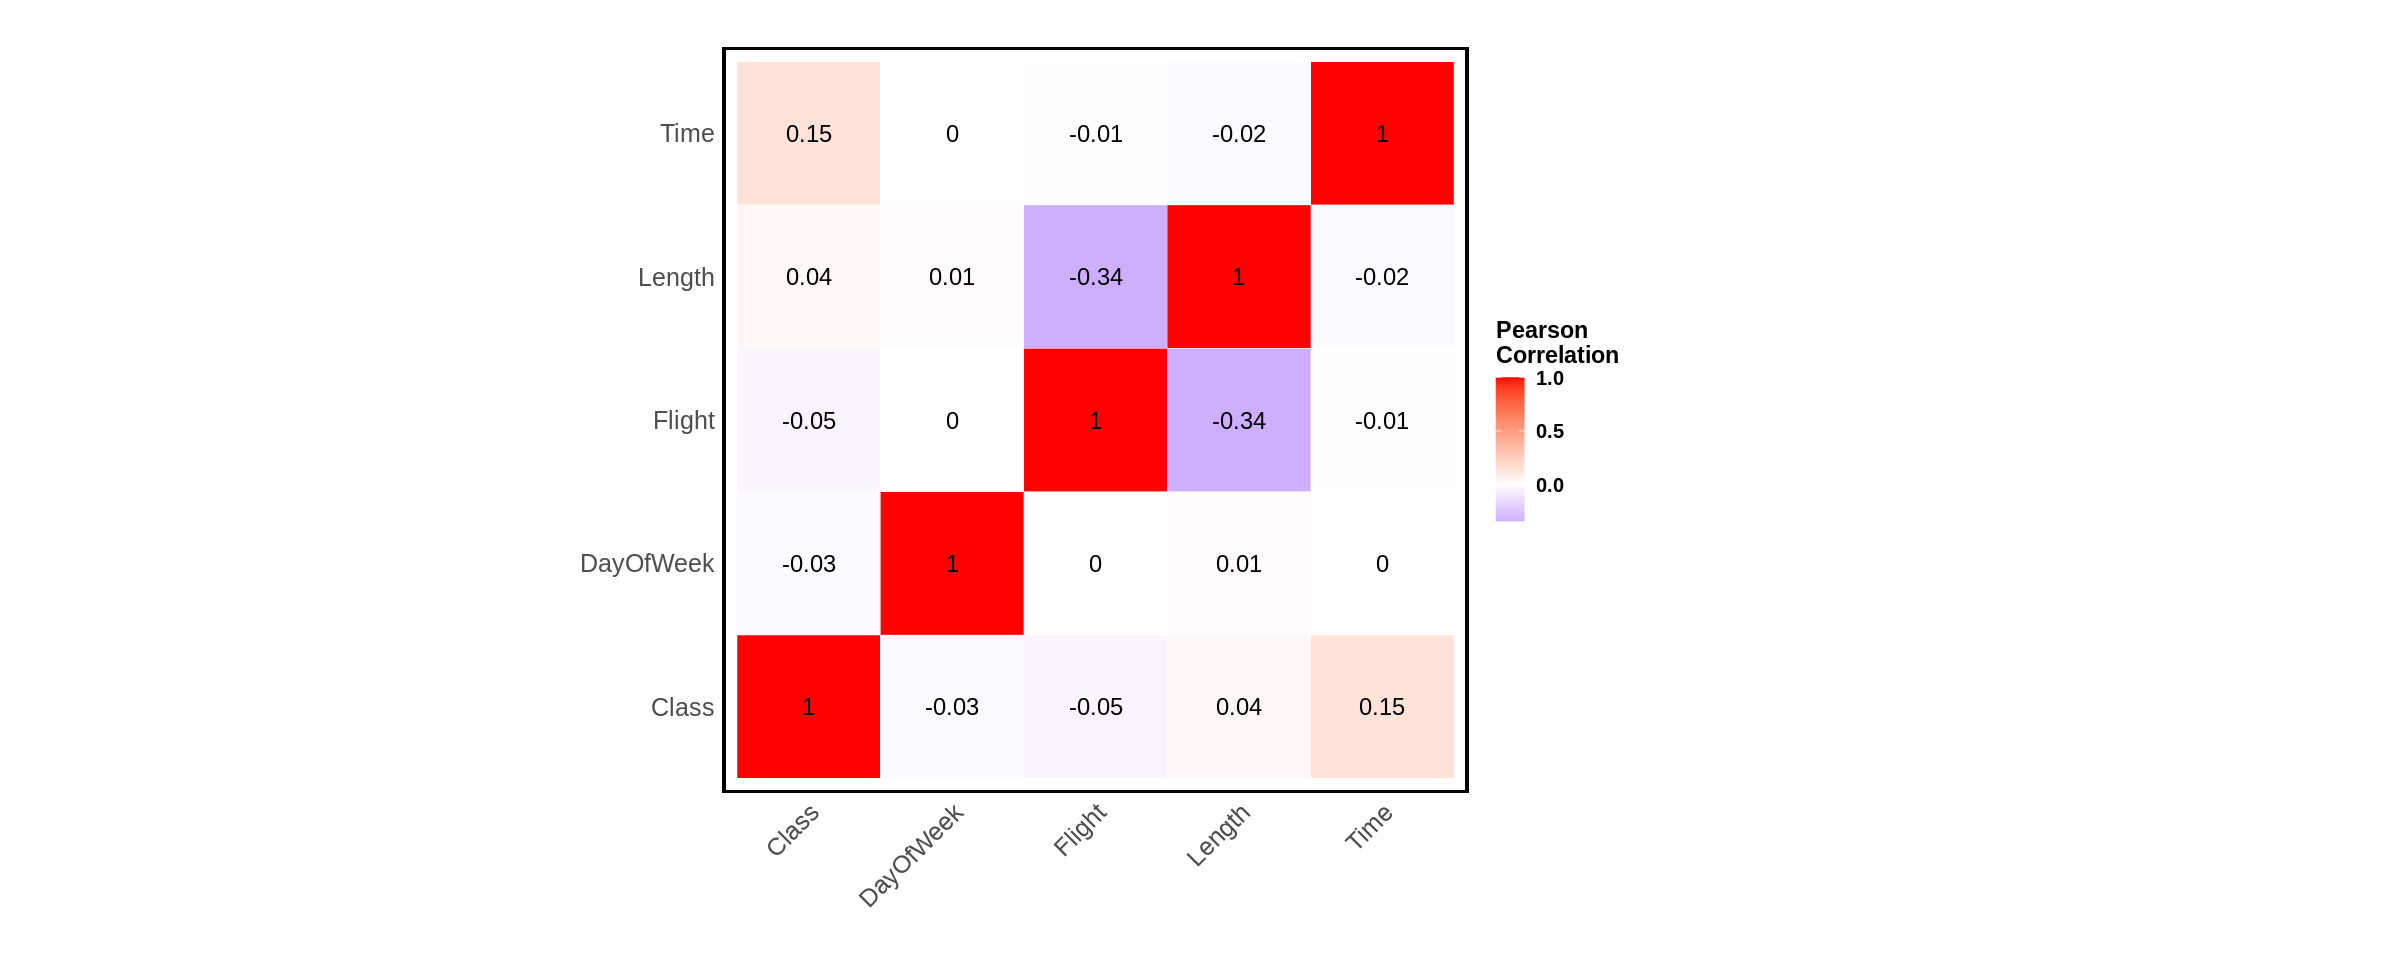

In [ ]:
## Study of the dependence of variables by calculating correlations

## Pearson correlation coefficient:
# This is the best known and used correlation coefficient and measures the degree of linear association between two continuous variables.

corr_matrix <- cor(numeric_data, method = "pearson")

corr_df <- as.data.frame(corr_matrix) %>%
  rownames_to_column(var = "var1") %>%
  gather(var2, value, -var1)

ggplot(data = corr_df, aes(x = var1, y = var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red",
                       midpoint = 0, space = "Lab",
                       name = "Pearson\nCorrelation") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 5) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1,
                                    size = 15, hjust = 1),
        axis.text.y = element_text(size = 15),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        legend.text = element_text(size = 12, face = "bold"),
        legend.title = element_text(size = 14, face = "bold"),
        legend.position = "right",
        plot.margin = unit(c(1, 5, 1, 1), "cm")) +
  geom_rect(color = "black", fill = NA, size = 1.5, aes(xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf)) +
  coord_fixed()

# A value of 1 indicates a perfect positive relationship between the two variables, which means that when one variable increases, the other variable increases proportional to it.
# A value of -1 indicates a perfect negative relationship, which means that when one variable increases, the other variable decreases in proportion to it.
# A value of 0 indicates that there is no linear relationship between the two variables.

# The more the correlation coefficient is closer to 1 or -1, the stronger linear relationship between the two variables.
# The more than 0 the correlation coefficient, the weaker or null linear relationship between the two variables.

## Conclusion: The most suggestive Pearson correlation is the one between (Length, Flight),
## the coefficient approaching -1, which means that, the more one will increase, the other will decrease proportionally.


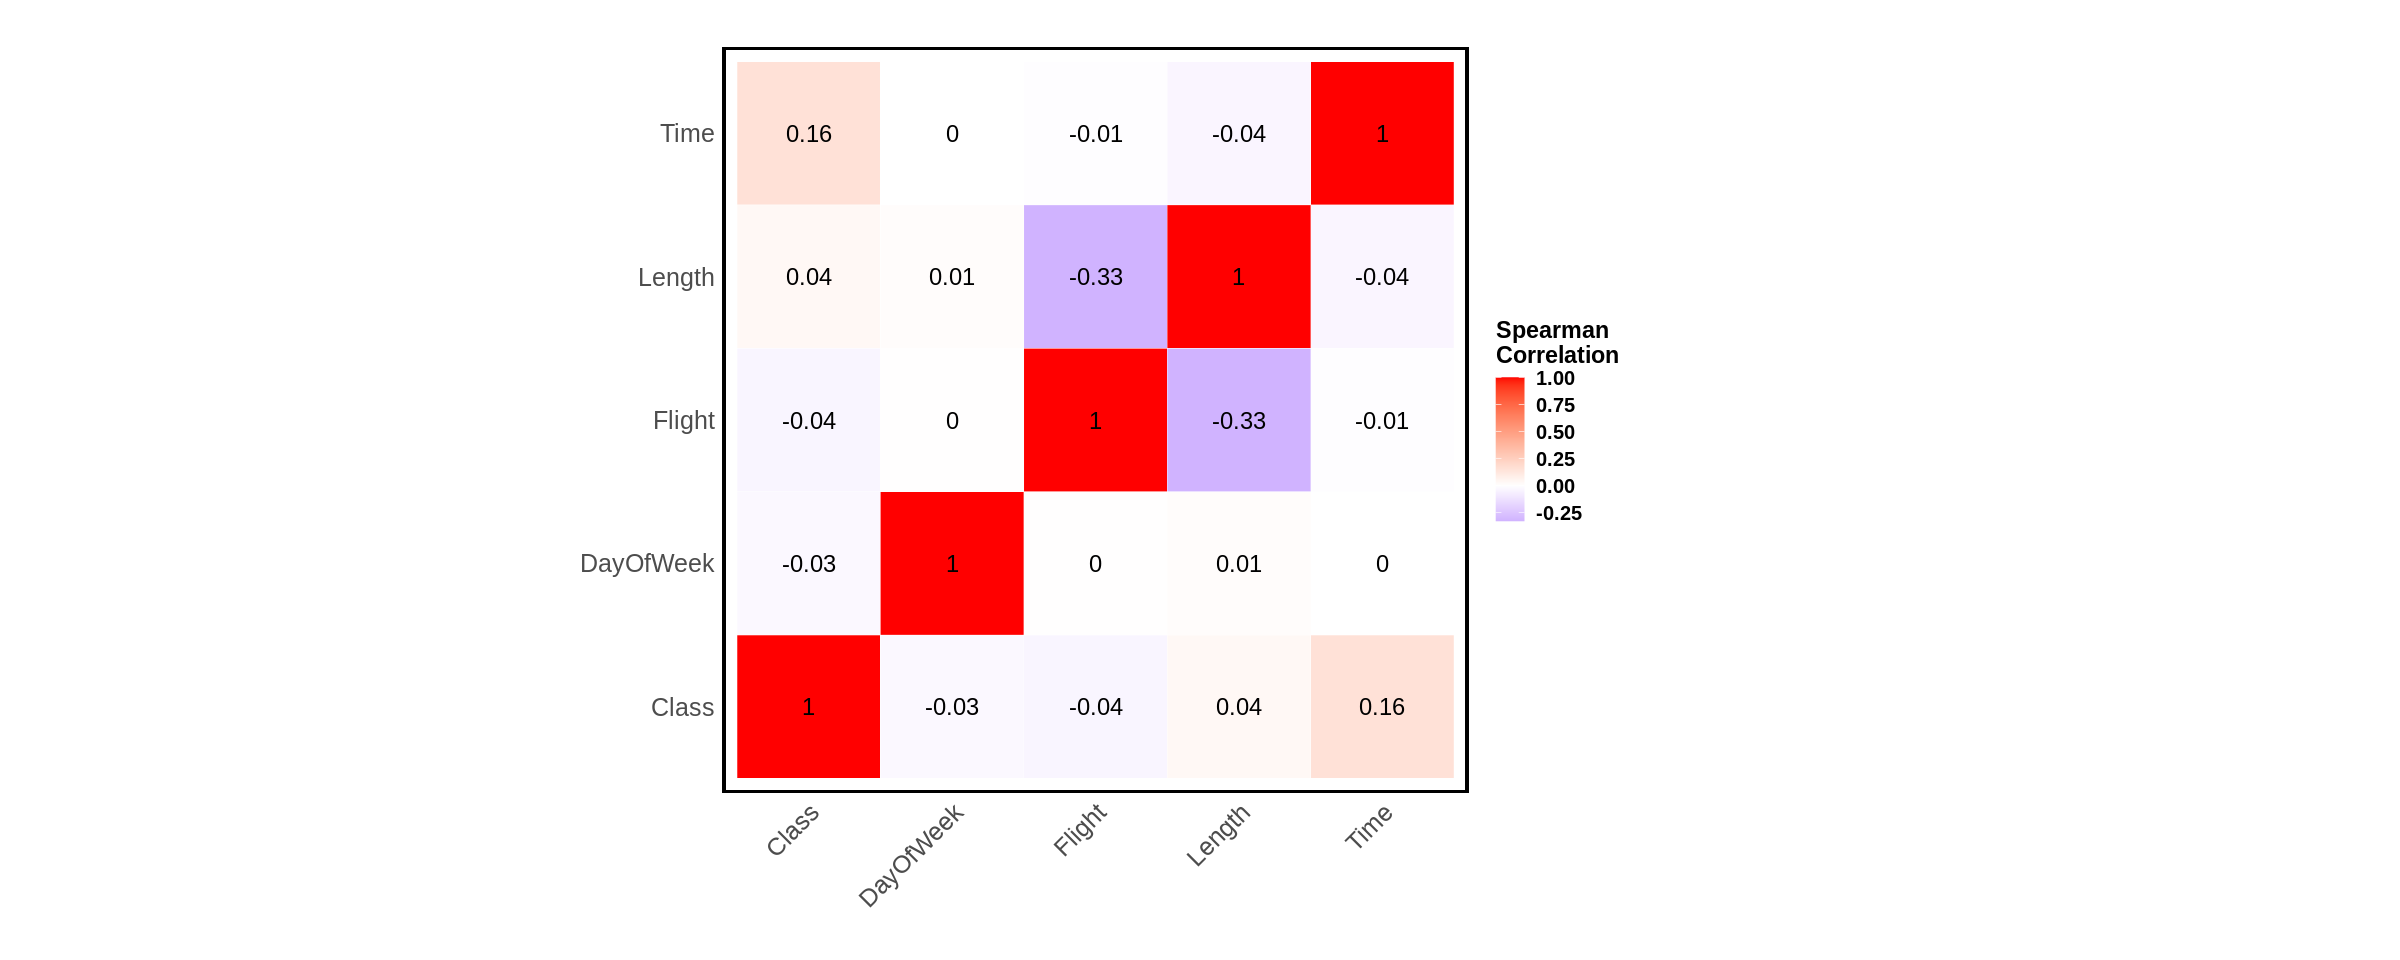

In [ ]:
## Spearman correlation coefficient:

# This correlation coefficient is used to measure the degree of association between two ordinary or numerical variables.
# In contrast to Pearson, this coefficient is based on the ranks of observations and not on the actual values.

corr_matrix <- cor(numeric_data, method = "spearman")

corr_df <- as.data.frame(corr_matrix) %>%
  rownames_to_column(var = "var1") %>%
  gather(var2, value, -var1)

ggplot(data = corr_df, aes(x = var1, y = var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red",
                       midpoint = 0, space = "Lab",
                       name = "Spearman\nCorrelation") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 5) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1,
                                    size = 15, hjust = 1),
        axis.text.y = element_text(size = 15),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        legend.text = element_text(size = 12, face = "bold"),
        legend.title = element_text(size = 14, face = "bold"),
        legend.position = "right",
        plot.margin = unit(c(1, 5, 1, 1), "cm")) +
  geom_rect(color = "black", fill = NA, size = 1.5, aes(xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf)) +
  coord_fixed()

## Conclusion: If Spearman's correlation is very similar to Pearson, this may mean that variables are in a linear relationship.
## This may also indicate that there are no extreme values in the data, and the distribution is relatively symmetrical.
## Although Spearman's correlation does not measure exactly the same thing as the Pearson correlation (for example, Spearman measures a monotonic relationship, not necessarily linear),
## if the values of the two correlations are very close, we can interpret that the variables are closely linked.

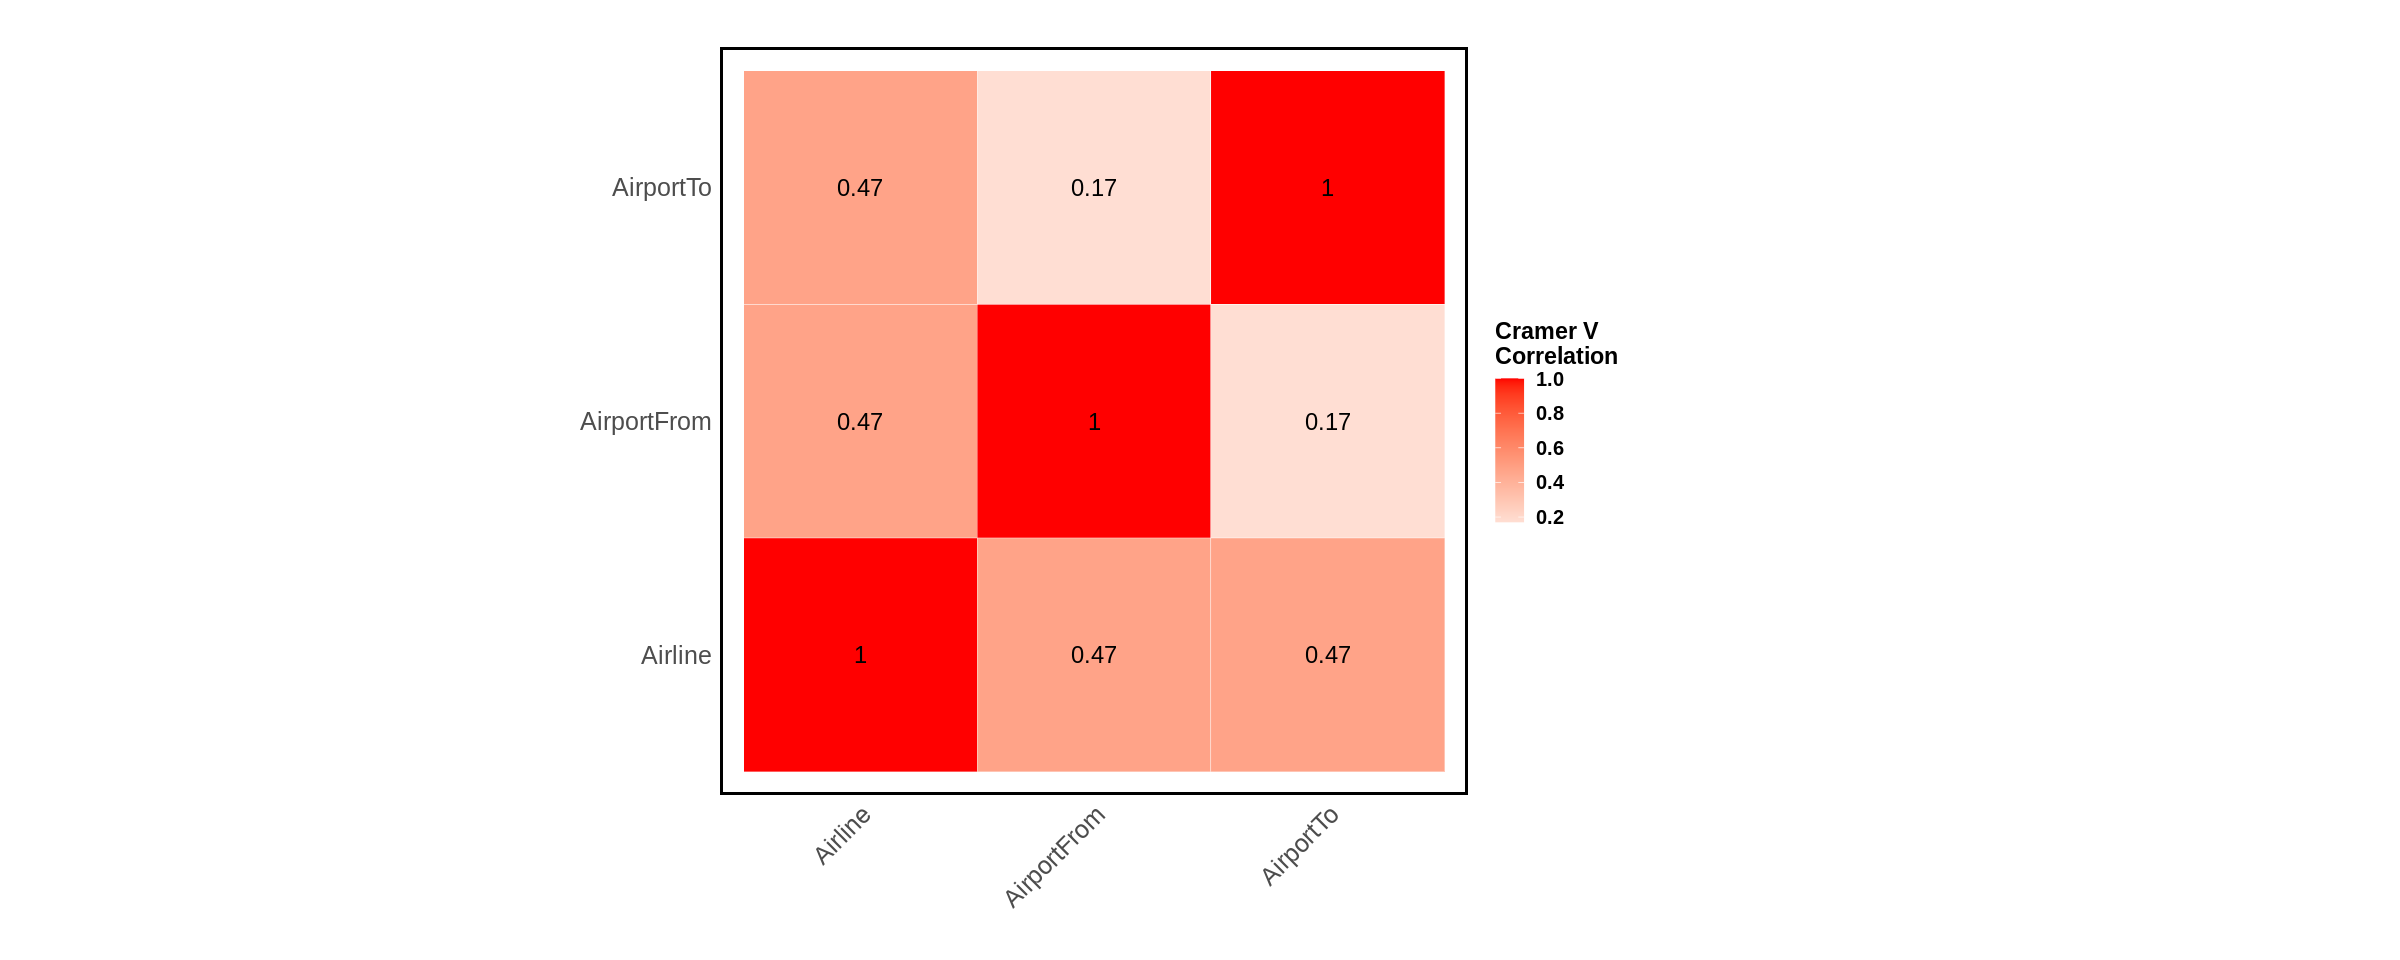

In [ ]:
## Cramer's V correlation coefficient:

# Cramer's V is a measure of association between two categorical variables, used to assess the relationship between them.
# Cramer's V takes values between 0 and 1, where 0 means no association between variables and 1 means perfect association.
# The closer Cramer's V value is to 0, the less associated the two variables are, and the closer it is to 1, the more closely related the two variables are.

corr_matrix <- matrix(ncol = ncol(categorical_data), nrow = ncol(categorical_data), dimnames = list(categorical_name_cols, categorical_name_cols))
for (i in 1:ncol(categorical_data)) {
  for (j in 1:ncol(categorical_data)) {
    corr_matrix[i,j] <- assocstats(table(categorical_data[, i], categorical_data[, j]))$cramer
  }
}

corr_df <- as.data.frame(corr_matrix) %>%
  rownames_to_column(var = "var1") %>%
  gather(var2, value, -var1)

ggplot(data = corr_df, aes(x = var1, y = var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red",
                       midpoint = 0, space = "Lab",
                       name = "Cramer V\nCorrelation") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 5) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1,
                                    size = 15, hjust = 1),
        axis.text.y = element_text(size = 15),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        legend.text = element_text(size = 12, face = "bold"),
        legend.title = element_text(size = 14, face = "bold"),
        legend.position = "right",
        plot.margin = unit(c(1, 5, 1, 1), "cm")) +
  geom_rect(color = "black", fill = NA, size = 1.5, aes(xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf)) +
  coord_fixed()

## Conclusion: We can see that the pairs of values (AirportTo, Airline) and (AirportFrom, Airline) have a relevant association.

In [ ]:
## The Chi-square independence test:

# The chi-square test is a statistical test used to assess whether there is an association between two nominal or categorical variables.
# This test is based on an analysis of the observed frequencies of the values in the two variables and comparing them to the expected frequencies,
# the frequencies that would have been observed if there was no association between the two variables.

cat_cols <- sapply(categorical_data, is.factor)

chisq_results <- list()
for(i in 1:(ncol(categorical_data)-1)){
  for(j in (i+1):ncol(categorical_data)){
    if(cat_cols[i] & cat_cols[j]){
      my_table <- table(categorical_data[,i], categorical_data[,j])
      chisq_results[[paste(names(categorical_data)[i], names(categorical_data)[j], sep = "_vs_")]] <- chisq.test(my_table)
    }
  }
}

print(chisq_results)


## Conclusion: If the Cramer's V test achieves a value close to 0.5, but the p-value of the chi-square test is very close to 0,
## this may mean that there is a significant association between the two variables, but the possibility cannot be completely ruled out that the association is caused by pure chance.


Warning message in chisq.test(my_table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(my_table):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(my_table):
“Chi-squared approximation may be incorrect”


$Airline_vs_AirportFrom

	Pearson's Chi-squared test

data:  my_table
X-squared = 2052048, df = 4964, p-value < 2.2e-16


$Airline_vs_AirportTo

	Pearson's Chi-squared test

data:  my_table
X-squared = 2048405, df = 4964, p-value < 2.2e-16


$AirportFrom_vs_AirportTo

	Pearson's Chi-squared test

data:  my_table
X-squared = 4586288, df = 85264, p-value < 2.2e-16




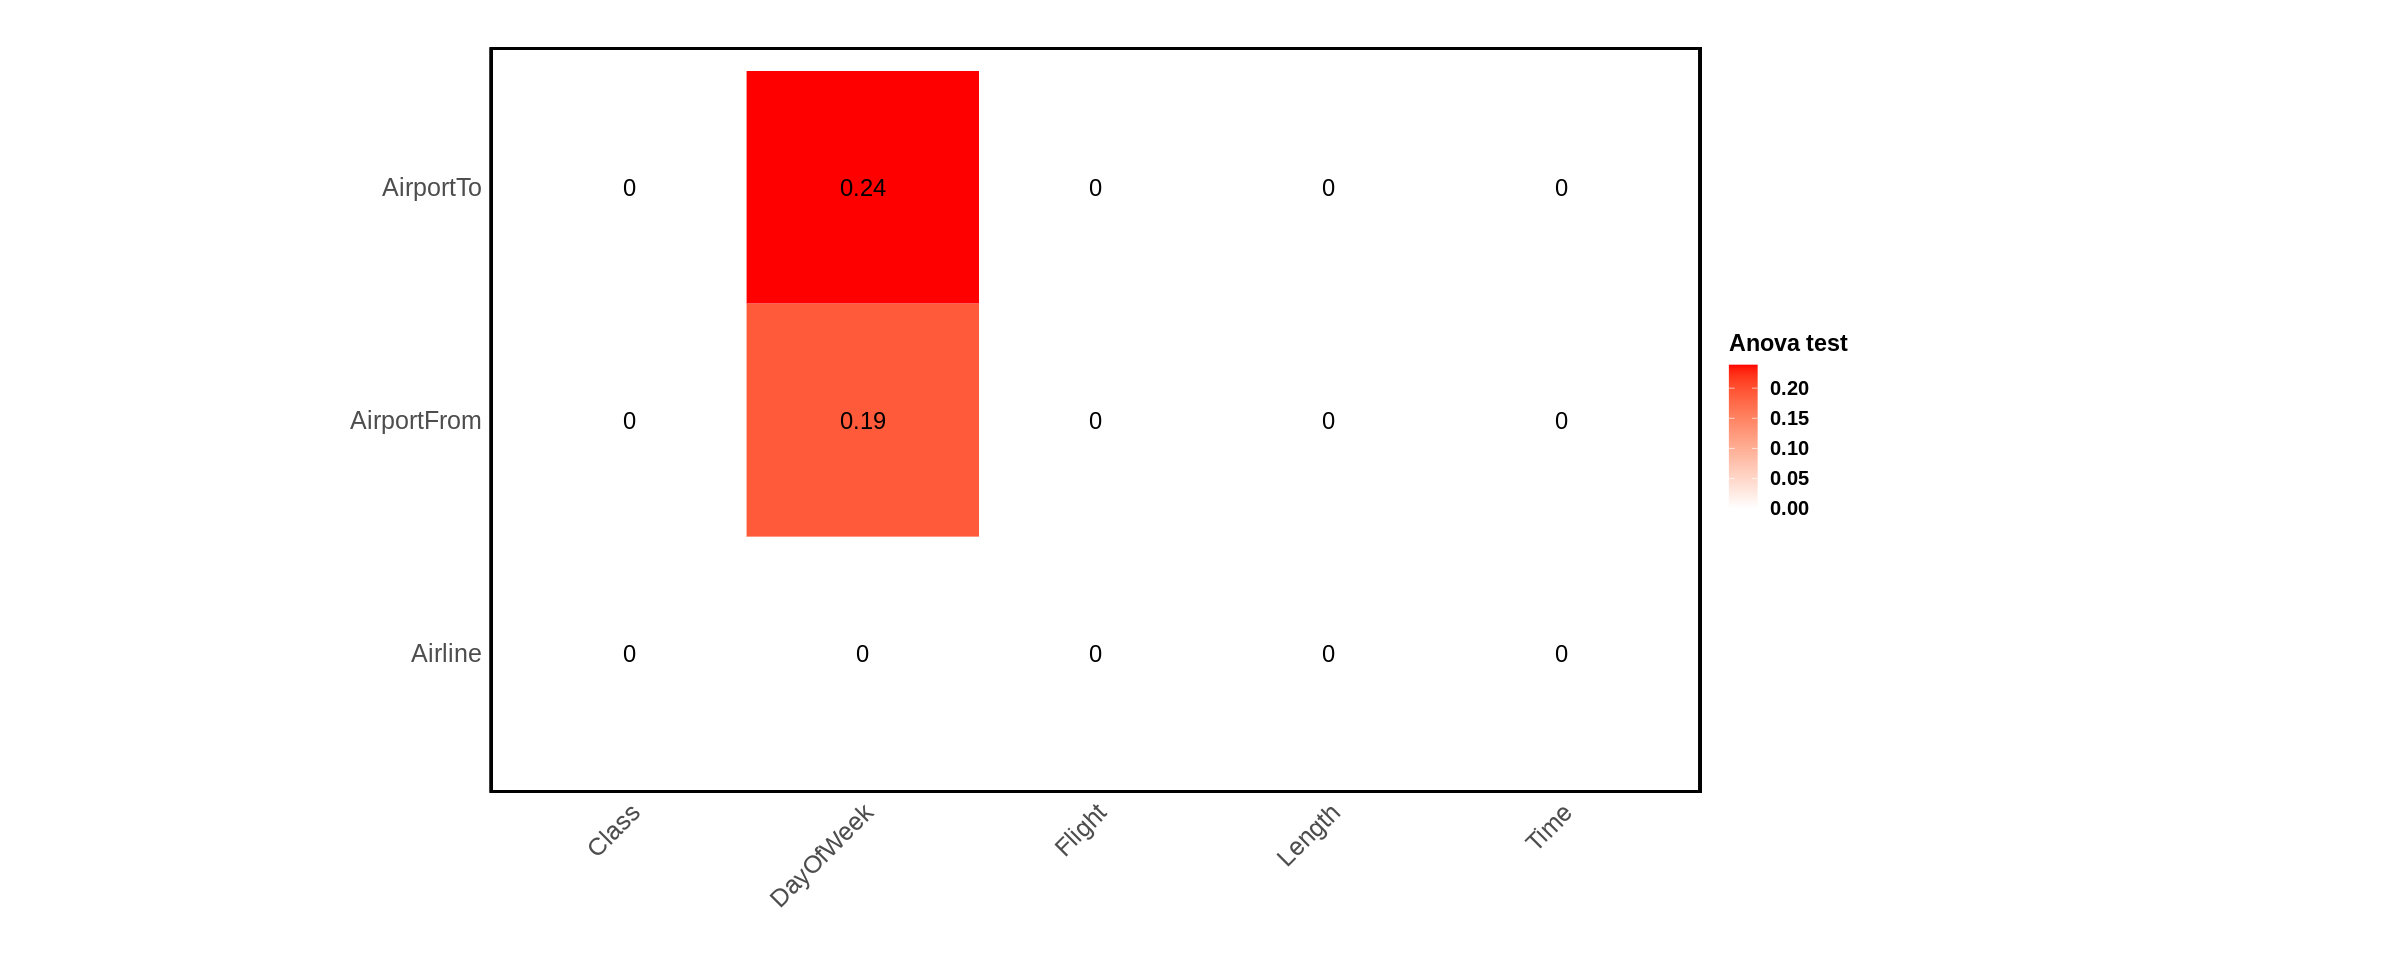

In [ ]:
## The Anova independence test:

# The ANOVA (Analysis of Variance) test is a statistical method used to determine whether there are significant differences between two or more groups of data.
# The ANOVA test is based on the idea that the variation in data is composed of two main components: variation between groups and variation within groups.
# Variation between groups is measured by mean differences between groups, while variation within groups is measured by individual differences within each group.
# The ANOVA test determines whether the variation between groups is significantly greater than the variation within groups, indicating that there are significant differences between groups.

pval_matrix <- matrix(ncol = ncol(categorical_data), nrow = ncol(numeric_data), dimnames = list(colnames(numeric_data), colnames(categorical_data)))

for (i in 1:length(numeric_name_cols)) {
  for (j in 1:length(categorical_name_cols)) {
    pval_matrix[i,j] <- summary(aov(numeric_data[,i] ~ categorical_data[,j]))[[1]][["Pr(>F)"]][1]
  }
}

corr_df <- as.data.frame(pval_matrix) %>%
  rownames_to_column(var = "var1") %>%
  gather(var2, value, -var1)

ggplot(data = corr_df, aes(x = var1, y = var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red",
                       midpoint = 0, space = "Lab",
                       name = "Anova test") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 5) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1,
                                    size = 15, hjust = 1),
        axis.text.y = element_text(size = 15),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        legend.text = element_text(size = 12, face = "bold"),
        legend.title = element_text(size = 14, face = "bold"),
        legend.position = "right",
        plot.margin = unit(c(1, 5, 1, 1), "cm")) +
  geom_rect(color = "black", fill = NA, size = 1.5, aes(xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf)) +
  coord_fixed()

## Conclusion: there are significant differences between AirportTo with DayOfWeek and AirportFrom with DayOfWeek


In [ ]:
## T-test (means test) :

# The t-test is a statistical method used to test whether two groups are different from each other in terms of the mean value of a continuous variable.
# It is based on the Student's t-distribution, which is a distribution of t-values generated from a random selection from a normal population.

significant_pairs <- c()

for (i in 1:(length(numeric_name_cols) - 1)) {
  for (j in (i + 1):length(numeric_name_cols)) {
    t_test <- t.test(numeric_data[, i], numeric_data[, j])
    if (t_test$p.value < 0.05) {
      significant_pairs <- c(significant_pairs, paste0(colnames(numeric_data)[i], " - ", colnames(numeric_data)[j]))
    }
  }
}

# Afișarea perechilor semnificative
if (length(significant_pairs) > 0) {
  cat("The significant pairs are:\n")
  for (pair in significant_pairs) {
    cat(pair, "\n")
  }
}

kable(means, format="simple", align = "c")

## Conclusion: All variables have differences between them.

The significant pairs are:
Flight - Time 
Flight - Length 
Flight - DayOfWeek 
Flight - Class 
Time - Length 
Time - DayOfWeek 
Time - Class 
Length - DayOfWeek 
Length - Class 
DayOfWeek - Class 




                  x       
----------  --------------
Flight       2427.9279880 
Time         802.7281611  
Length       132.2021035  
DayOfWeek     3.9296658   
Class         0.4454431   

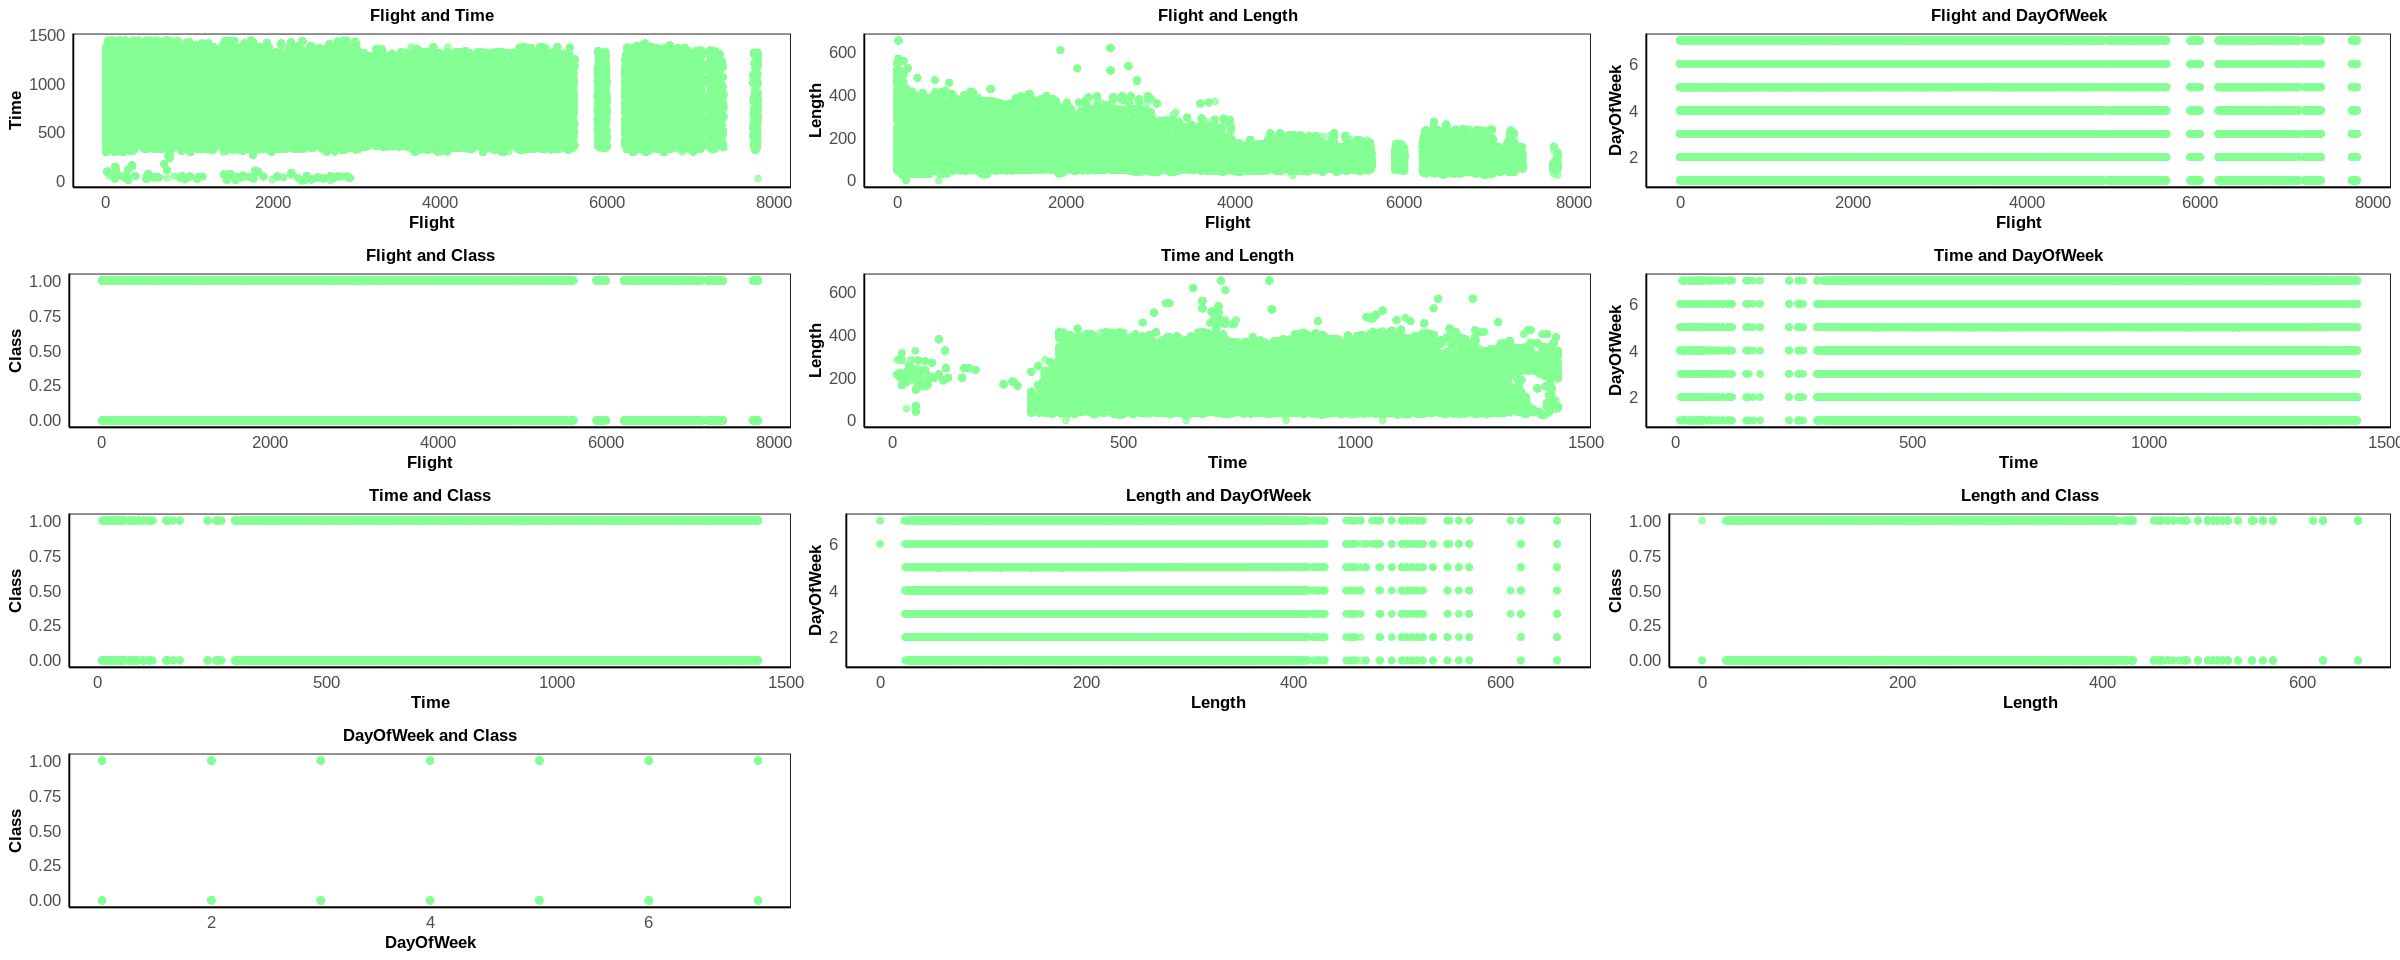

In [ ]:
## Scatter-plots for numerical variables combinations

data <- numeric_data
plots <- list()

for (i in 1:(ncol(data)-1)) {
  col_name_i <- names(data)[i]
  for (j in (i+1):(ncol(data))) {
    col_name_j <- names(data)[j]
    p <- ggplot(data, aes(x = .data[[col_name_i]], y = .data[[col_name_j]])) +
      geom_point(alpha = 0.7, color="#84ff93") +
      labs(title = paste(col_name_i, "and", col_name_j),
           x = col_name_i,
           y = col_name_j) +
      theme_minimal() +
      theme(plot.title = element_text(hjust = 0.5, size=10, face="bold")) +
      theme(panel.background = element_rect(fill = "white"),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            axis.line = element_line(colour = "black"),
            axis.text = element_text(size=10),
            axis.title = element_text(size=10, face="bold"))
    plots[[paste(col_name_i, col_name_j)]] <- p
  }
}
grid.arrange(grobs = plots, plot_spacer(height = unit(2, "cm")), nrow = 4)

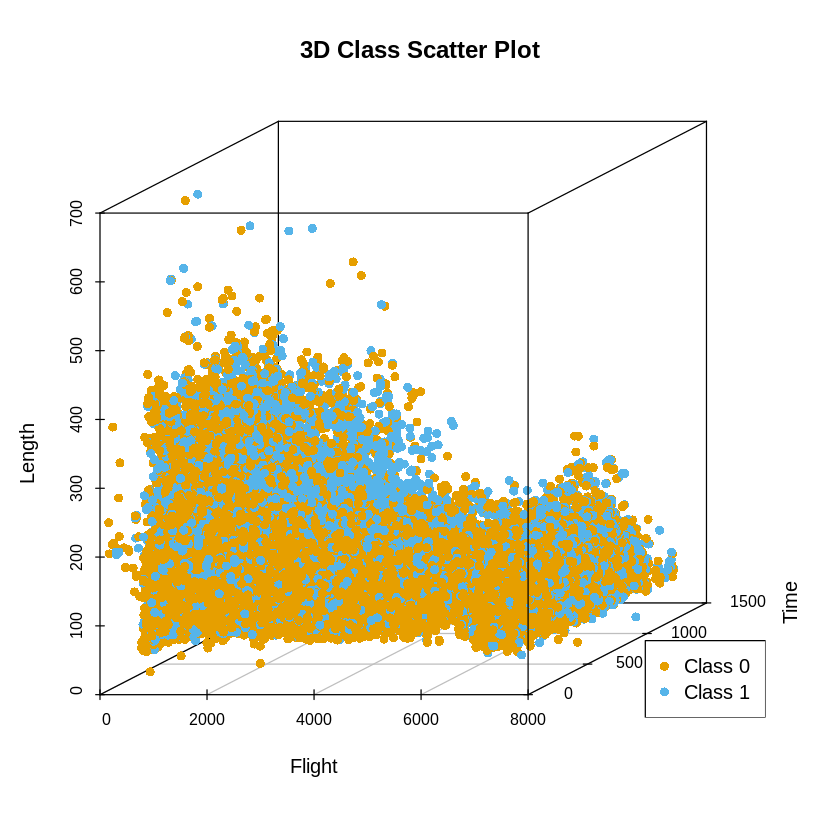

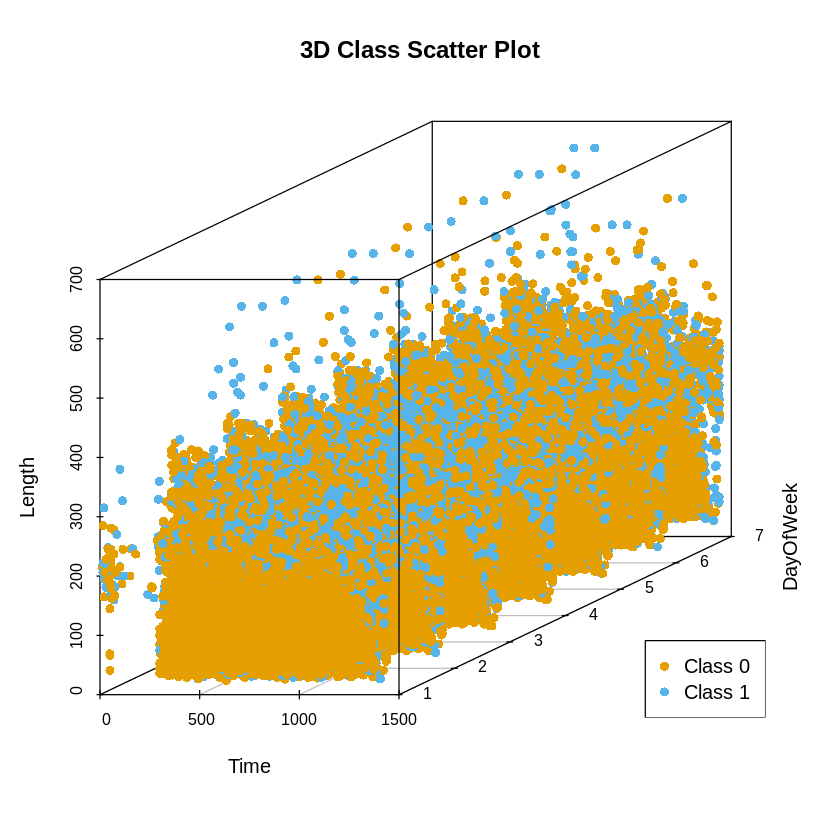

In [ ]:
## 3D Graphic

# 3D Graphs made on the target variable, using the two variables with the highest predictive power (Time and Length) for the target variable
# and the rest as the 3rd variable, in one graph Flight ID and in another Day of Week

#install.packages("rgl")
#library(rgl)
#rgl.useNULL()

#rgl::setupKnitr()
#options(rgl.useNULL = TRUE)

colors <- c("#E69F00", "#56B4E9")

point_colors <- vector("character", nrow(numeric_data))

for (i in 1:nrow(numeric_data)) {
  if (numeric_data$Class[i] == 0) {
    point_colors[i] <- colors[1]
  } else {
    point_colors[i] <- colors[2]
  }
}

scatterplot3d(numeric_data$Flight, numeric_data$Time, numeric_data$Length,
              pch = 16,
              color = point_colors,
              main="3D Class Scatter Plot",
              xlab = "Flight",
              ylab = "Time",
              zlab = "Length")
legend("bottomright", legend=c("Class 0", "Class 1"), col=colors, pch=16)

scatterplot3d(numeric_data$Time, numeric_data$DayOfWeek, numeric_data$Length,
              pch = 16,
              color = point_colors,
              main="3D Class Scatter Plot",
              xlab = "Time",
              ylab = "DayOfWeek",
              zlab = "Length")
legend("bottomright", legend=c("Class 0", "Class 1"), col=colors, pch=16)
#rglwidget()

# Unfortunately, although the 3d graphs are displayed, they cannot be rotated because Google Colab does not allow this for R
# and at the same time the data set is too large to be able to rotate the graph in optimal conditions

Matrix covariance:

               Flight        Time      Length   DayOfWeek       Class
Flight     0.98858853  0.01846084 -0.34151779  0.00872482 -0.07648170
Time       0.01846084  1.04197339 -0.03780646 -0.01189383  0.12626578
Length    -0.34151779 -0.03780646  0.99066300  0.01437747  0.06943764
DayOfWeek  0.00872482 -0.01189383  0.01437747  1.00164389 -0.05716508
Class     -0.07648170  0.12626578  0.06943764 -0.05716508  1.00041073


Eigen values:

[1] 1.3611187 1.1567438 0.9990530 0.8594579 0.6469062


Eigen vectors:

             [,1]        [,2]        [,3]       [,4]         [,5]
[1,] -0.679832747  0.09693605 -0.01035368  0.1783948  0.704626801
[2,] -0.008909253  0.73868272  0.38347834 -0.5531325  0.035457920
[3,]  0.678242575 -0.14642340  0.05060931 -0.1260467  0.707176170
[4,] -0.033102473 -0.28109396  0.92171267  0.2612150 -0.045857309
[5,]  0.276838036  0.58693919 -0.02686296  0.7603280 -0.006540646


Percentage of variability:

[1] 0.2709622 0.2302766 0.1988846 0.1710950 0

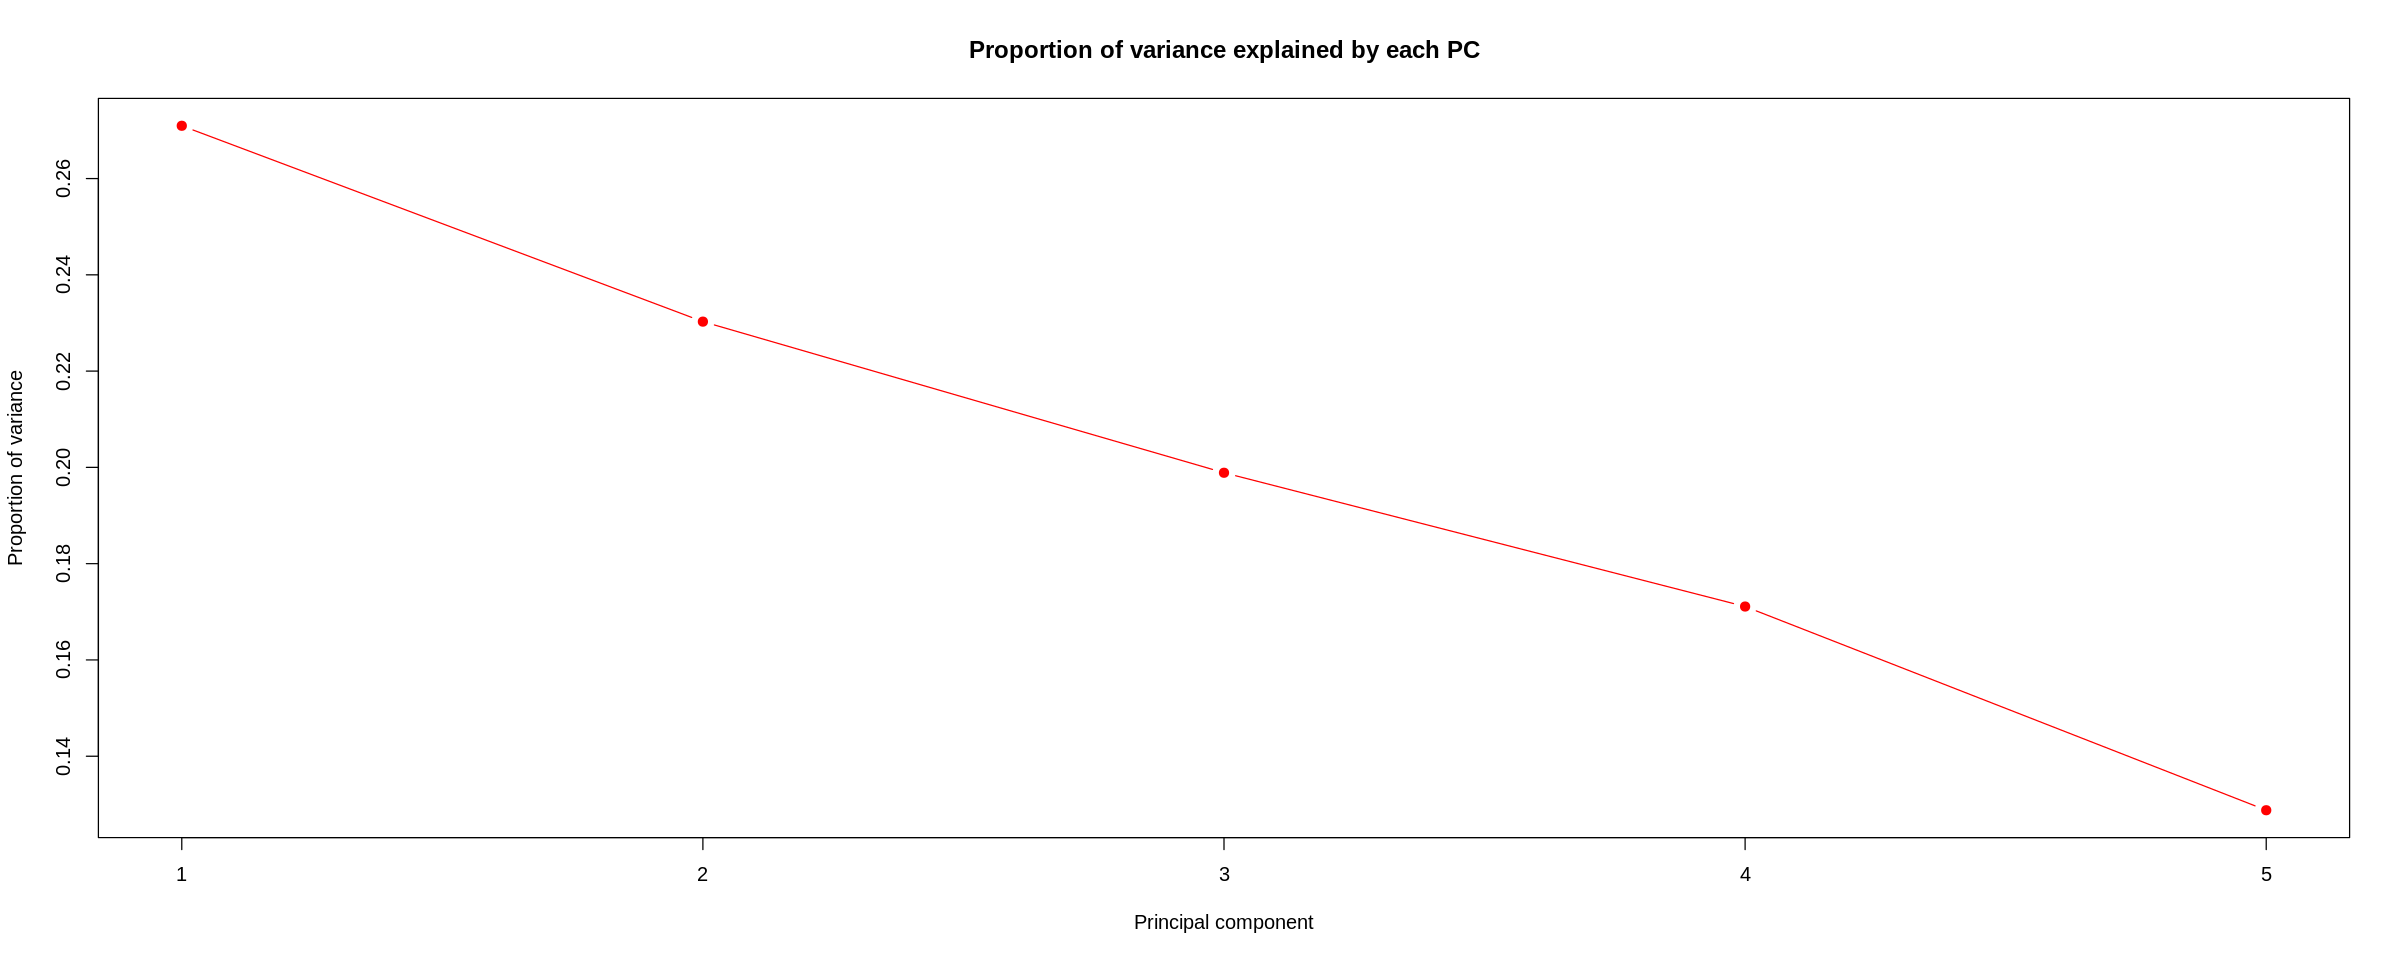

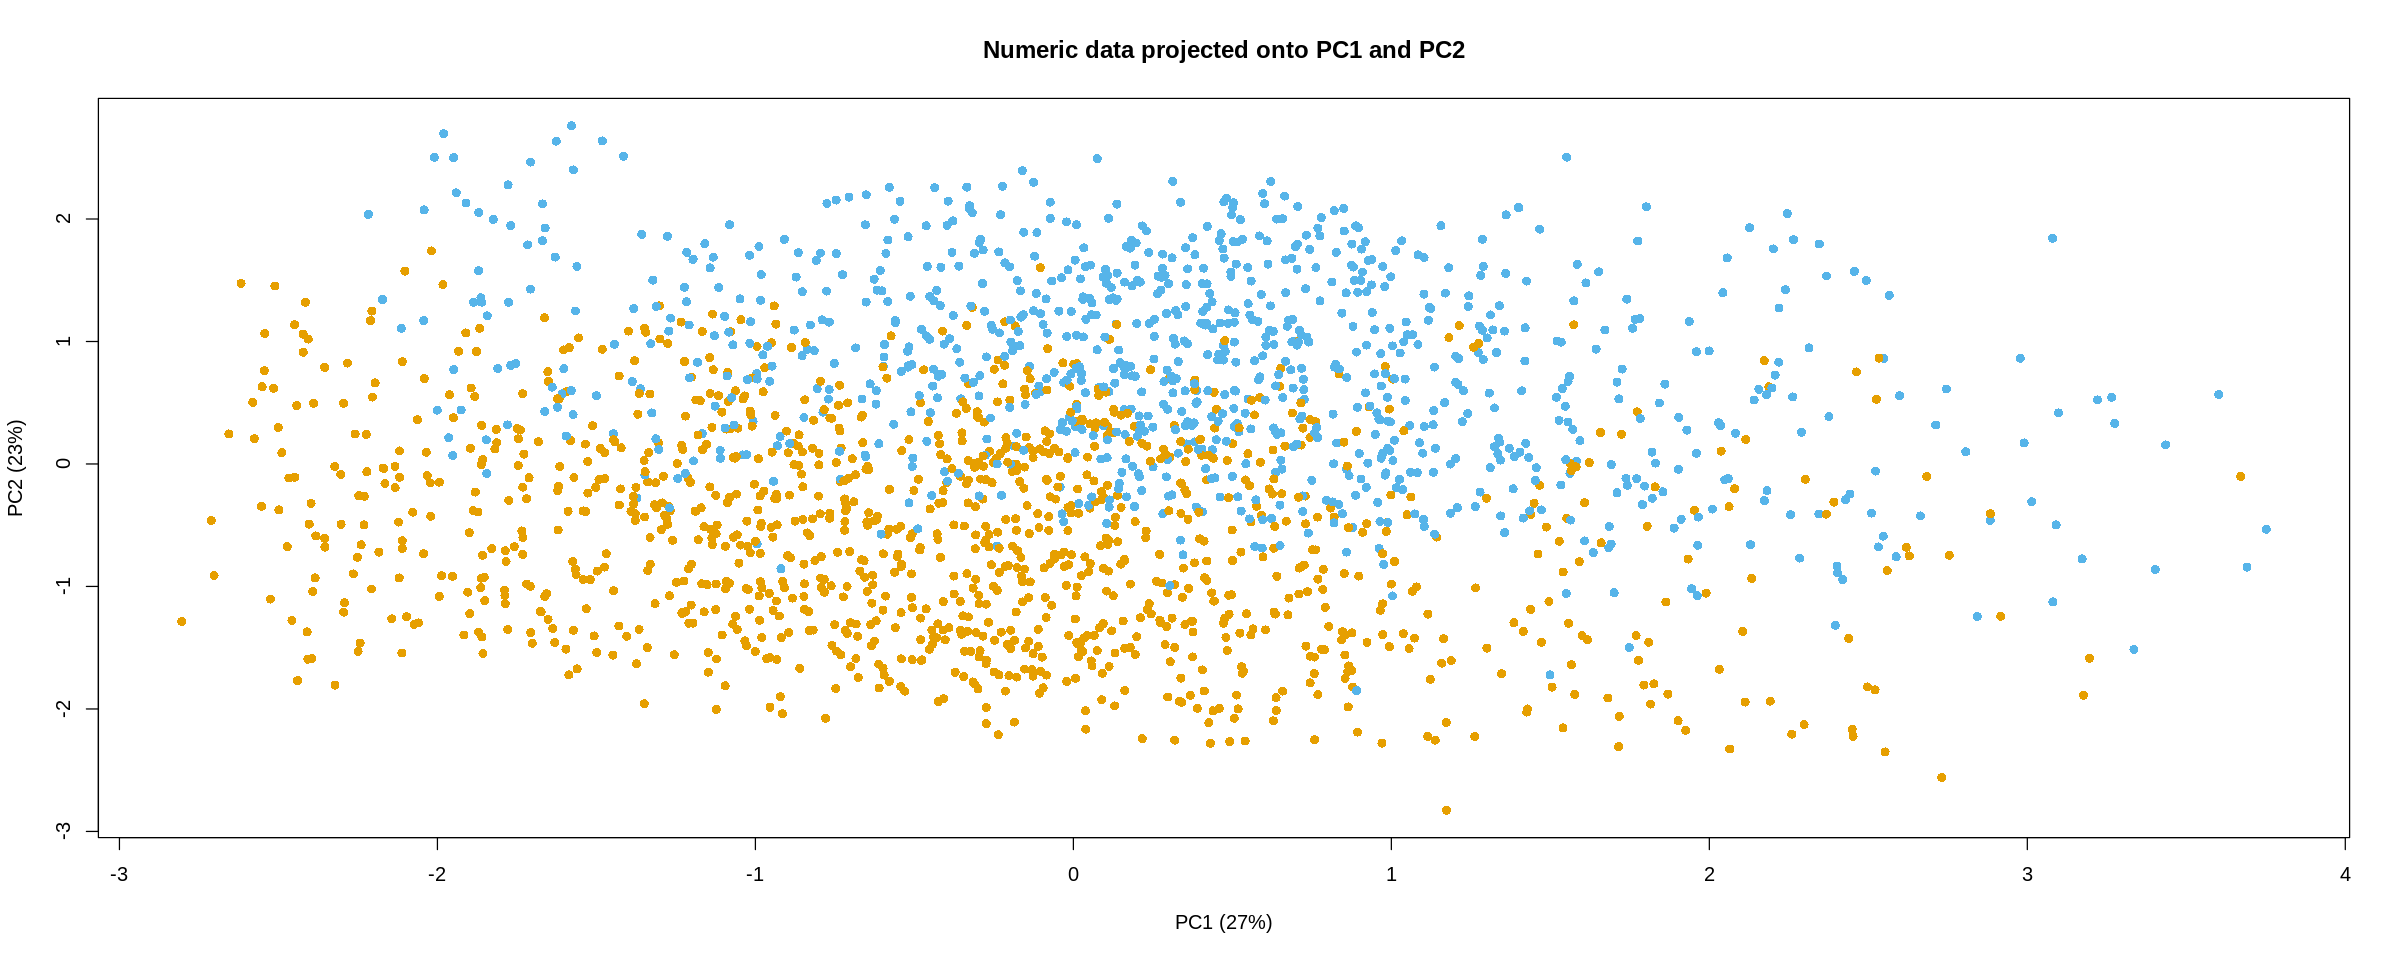

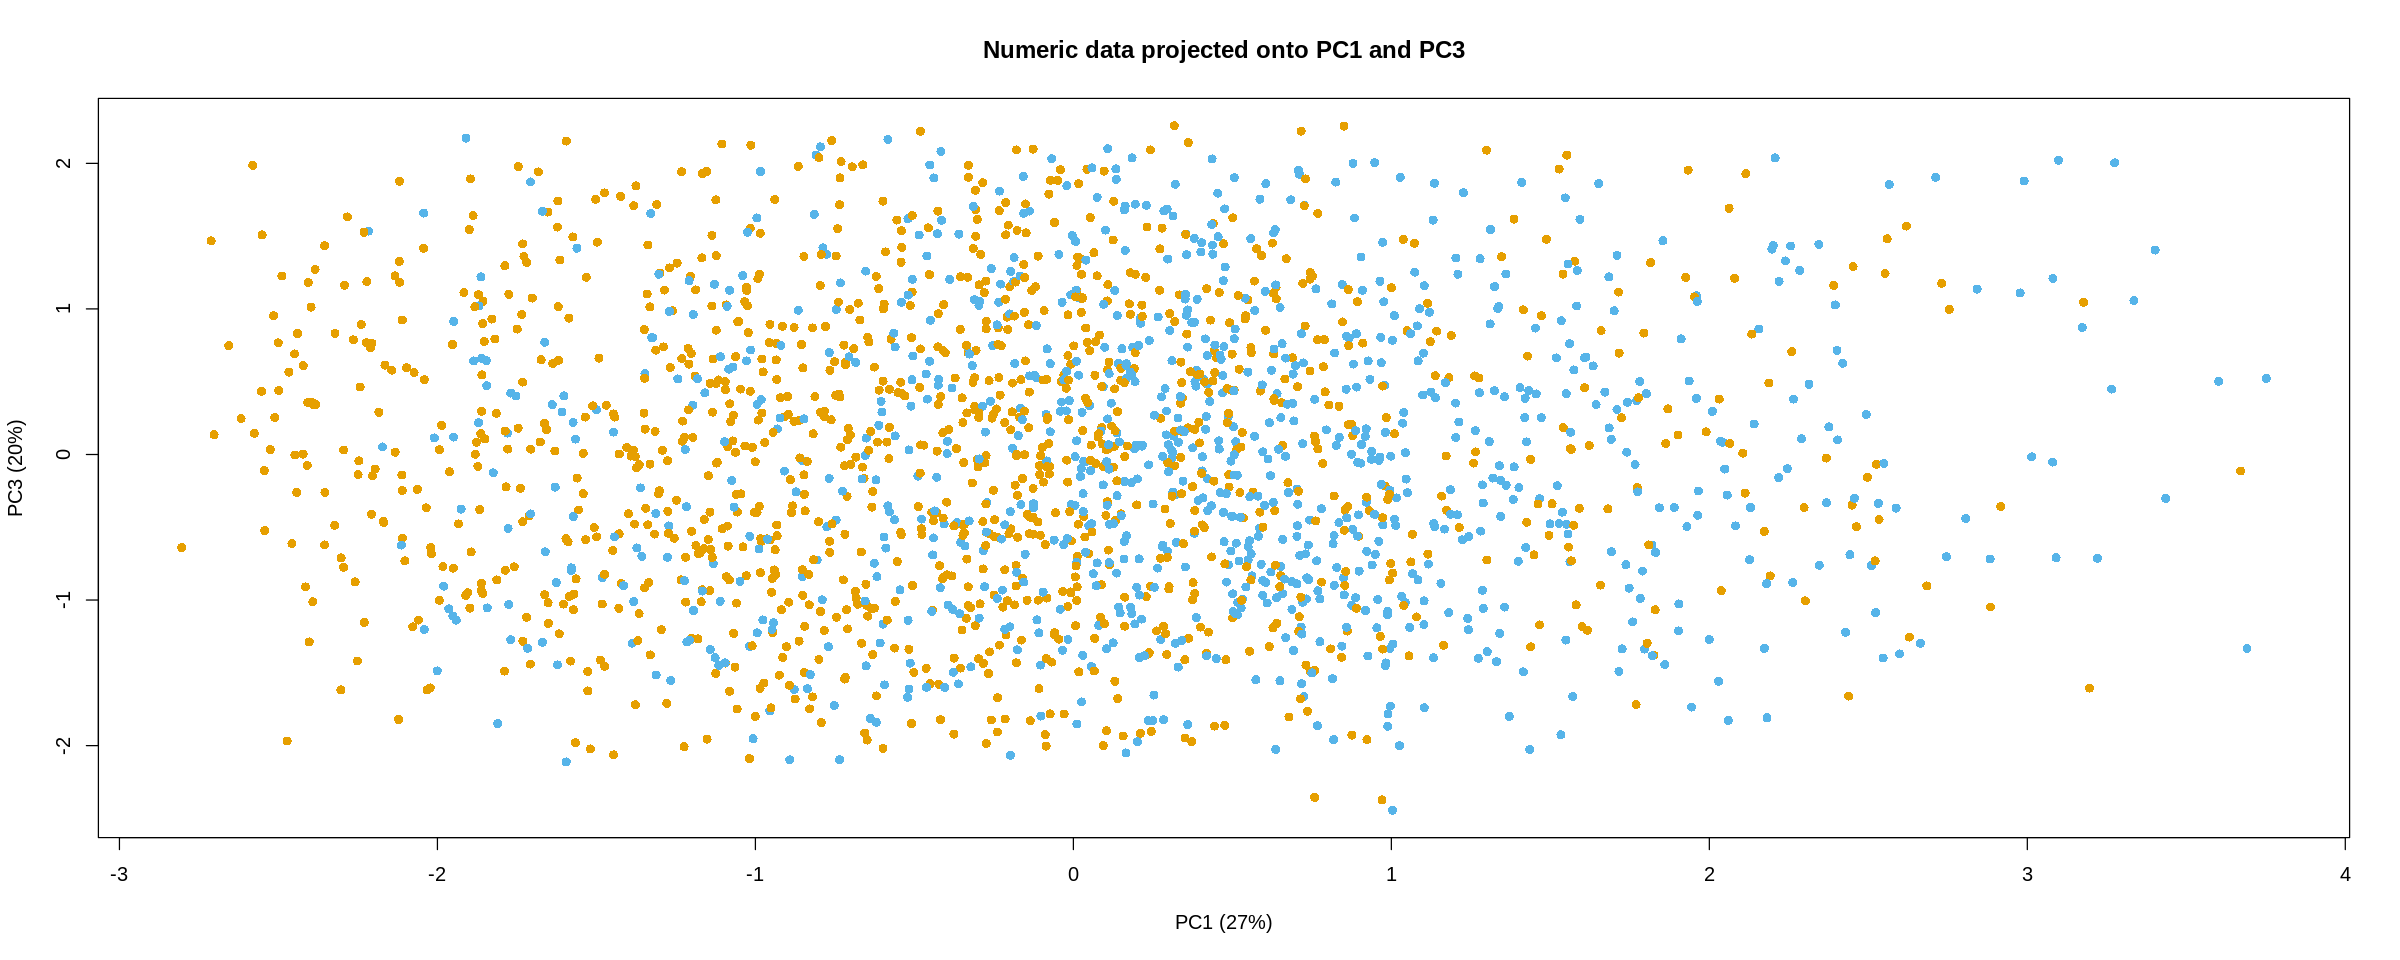

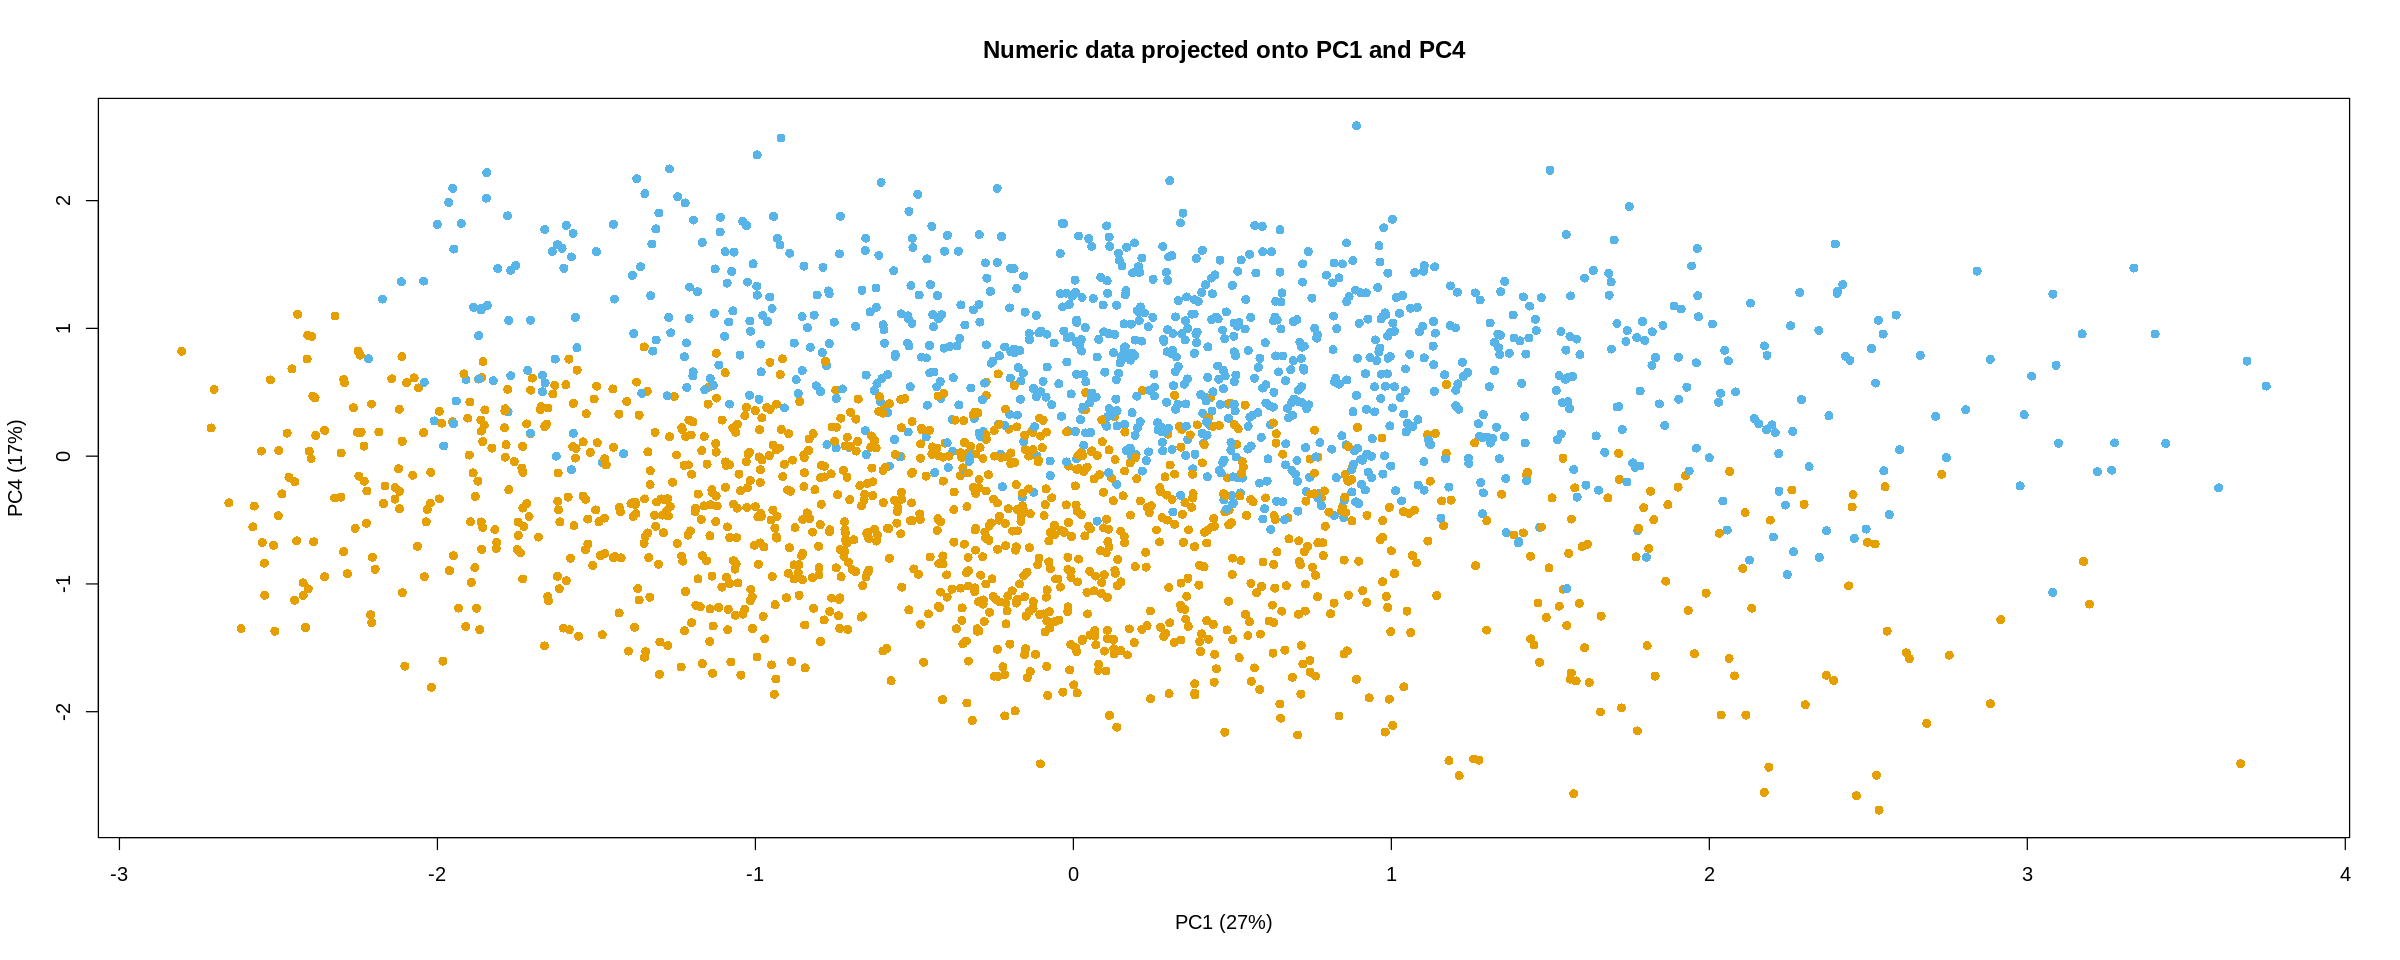

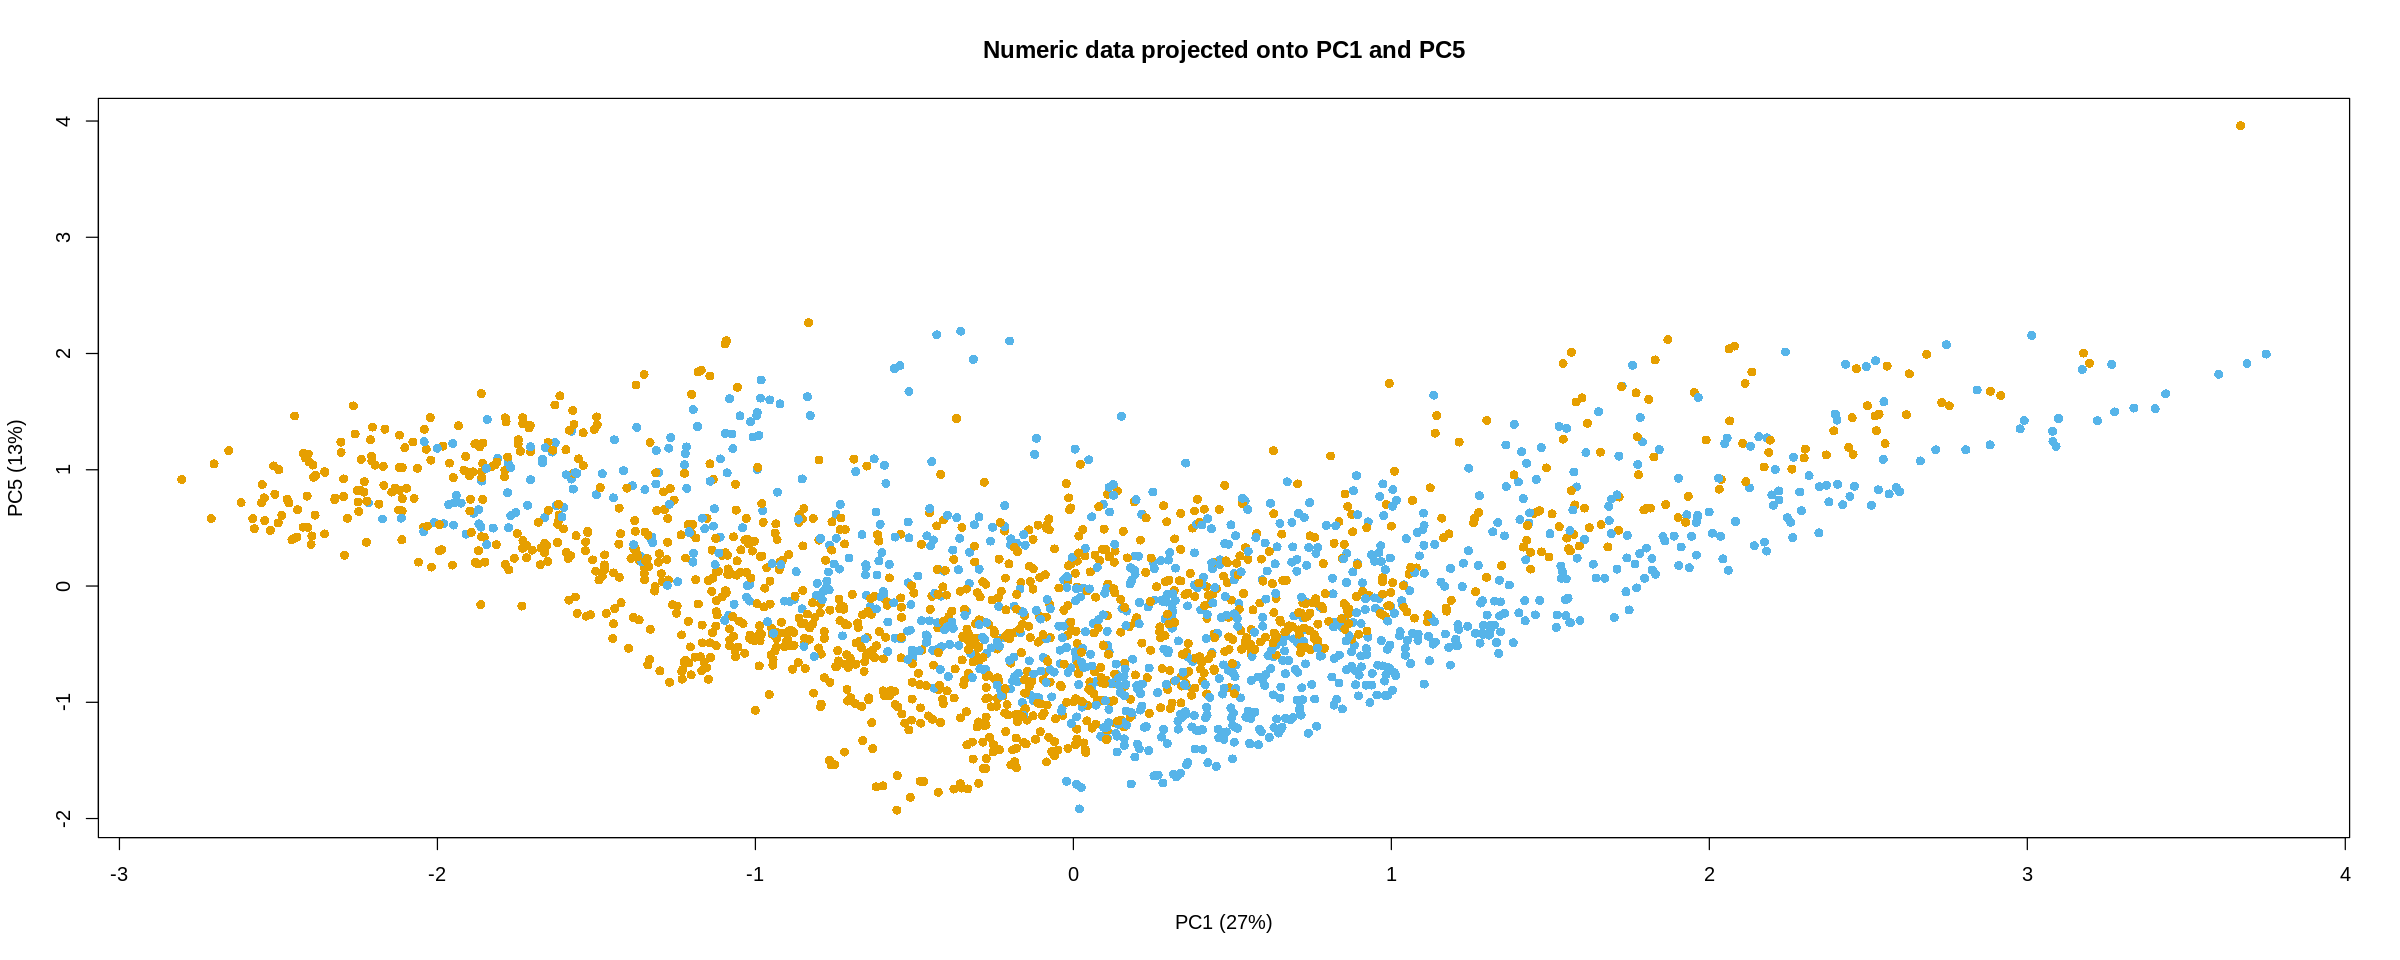

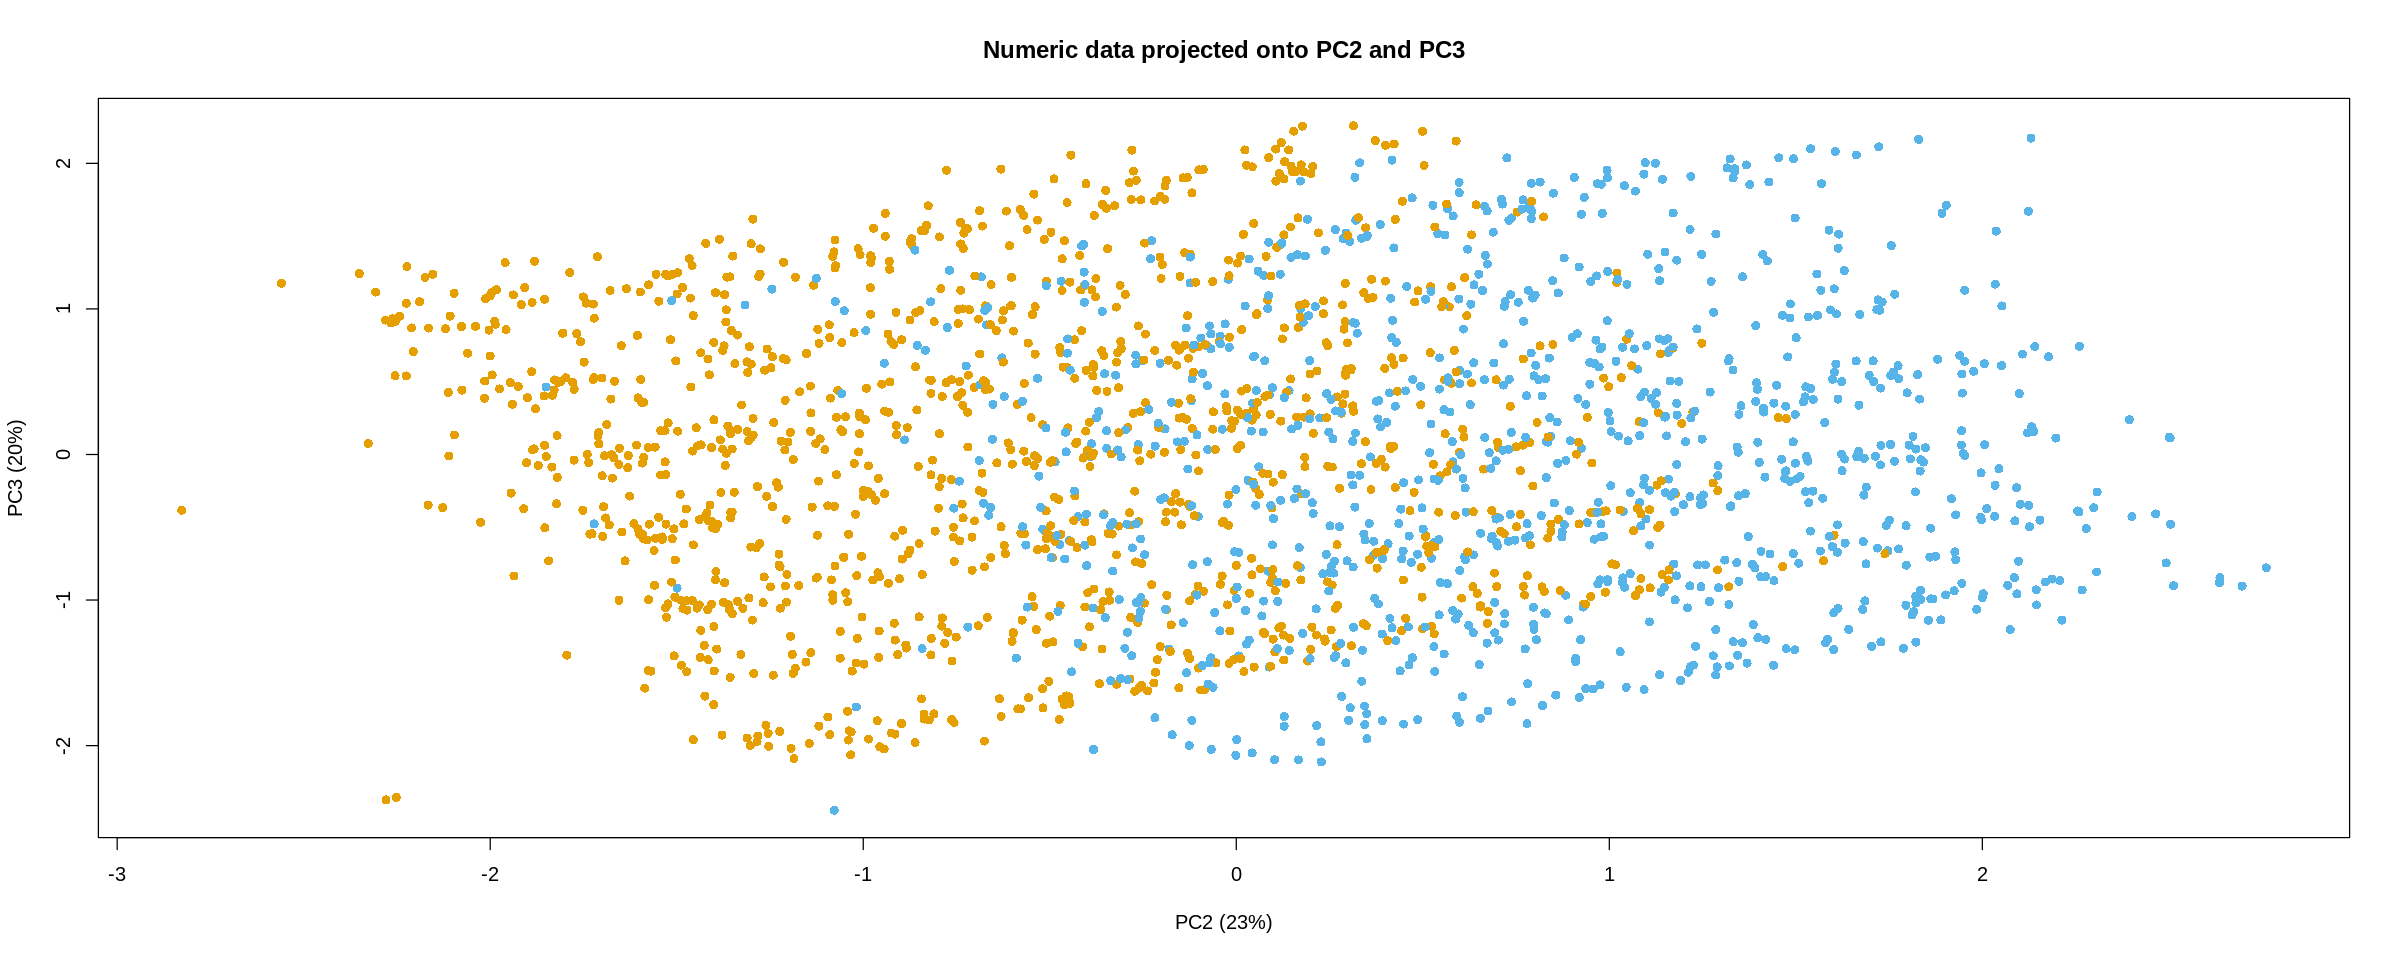

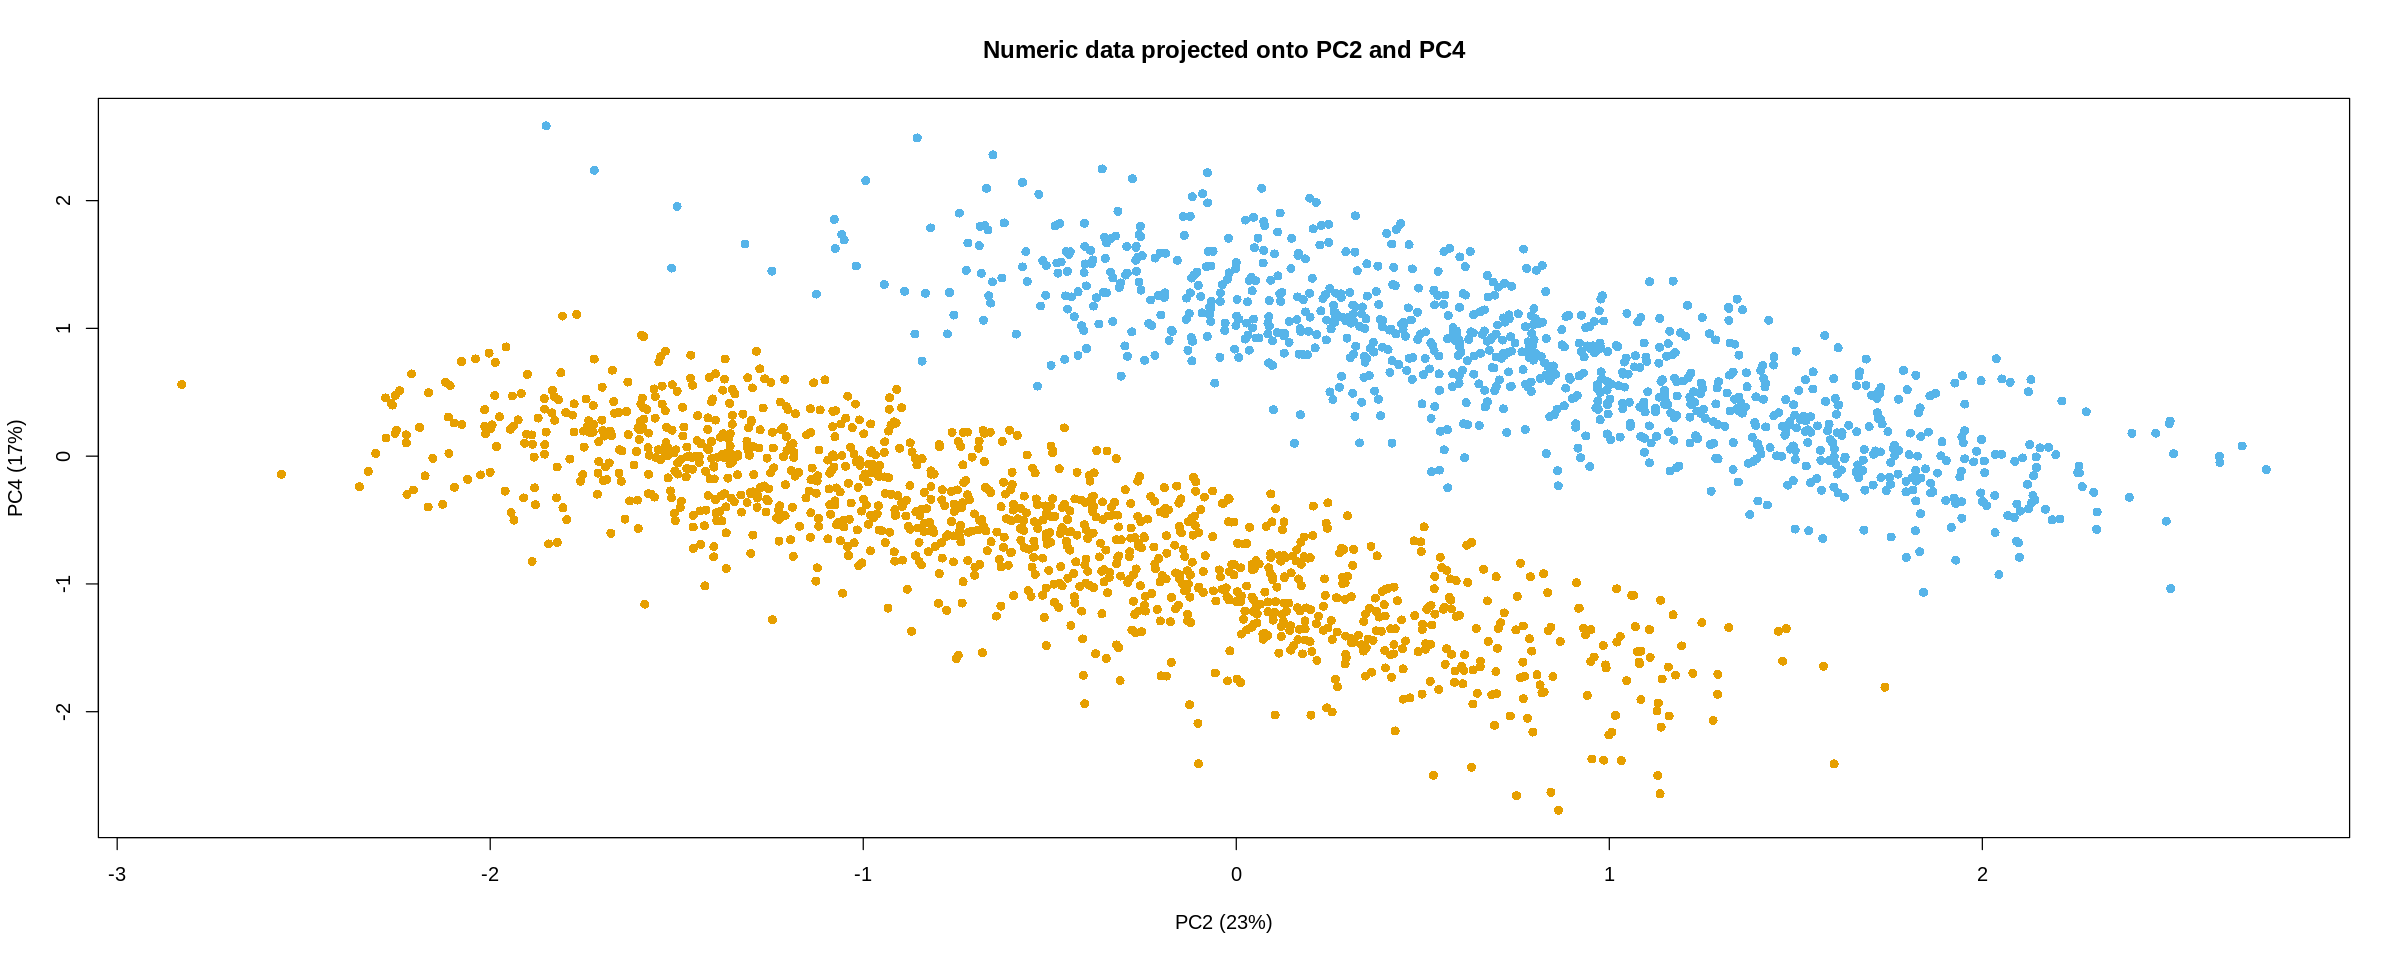

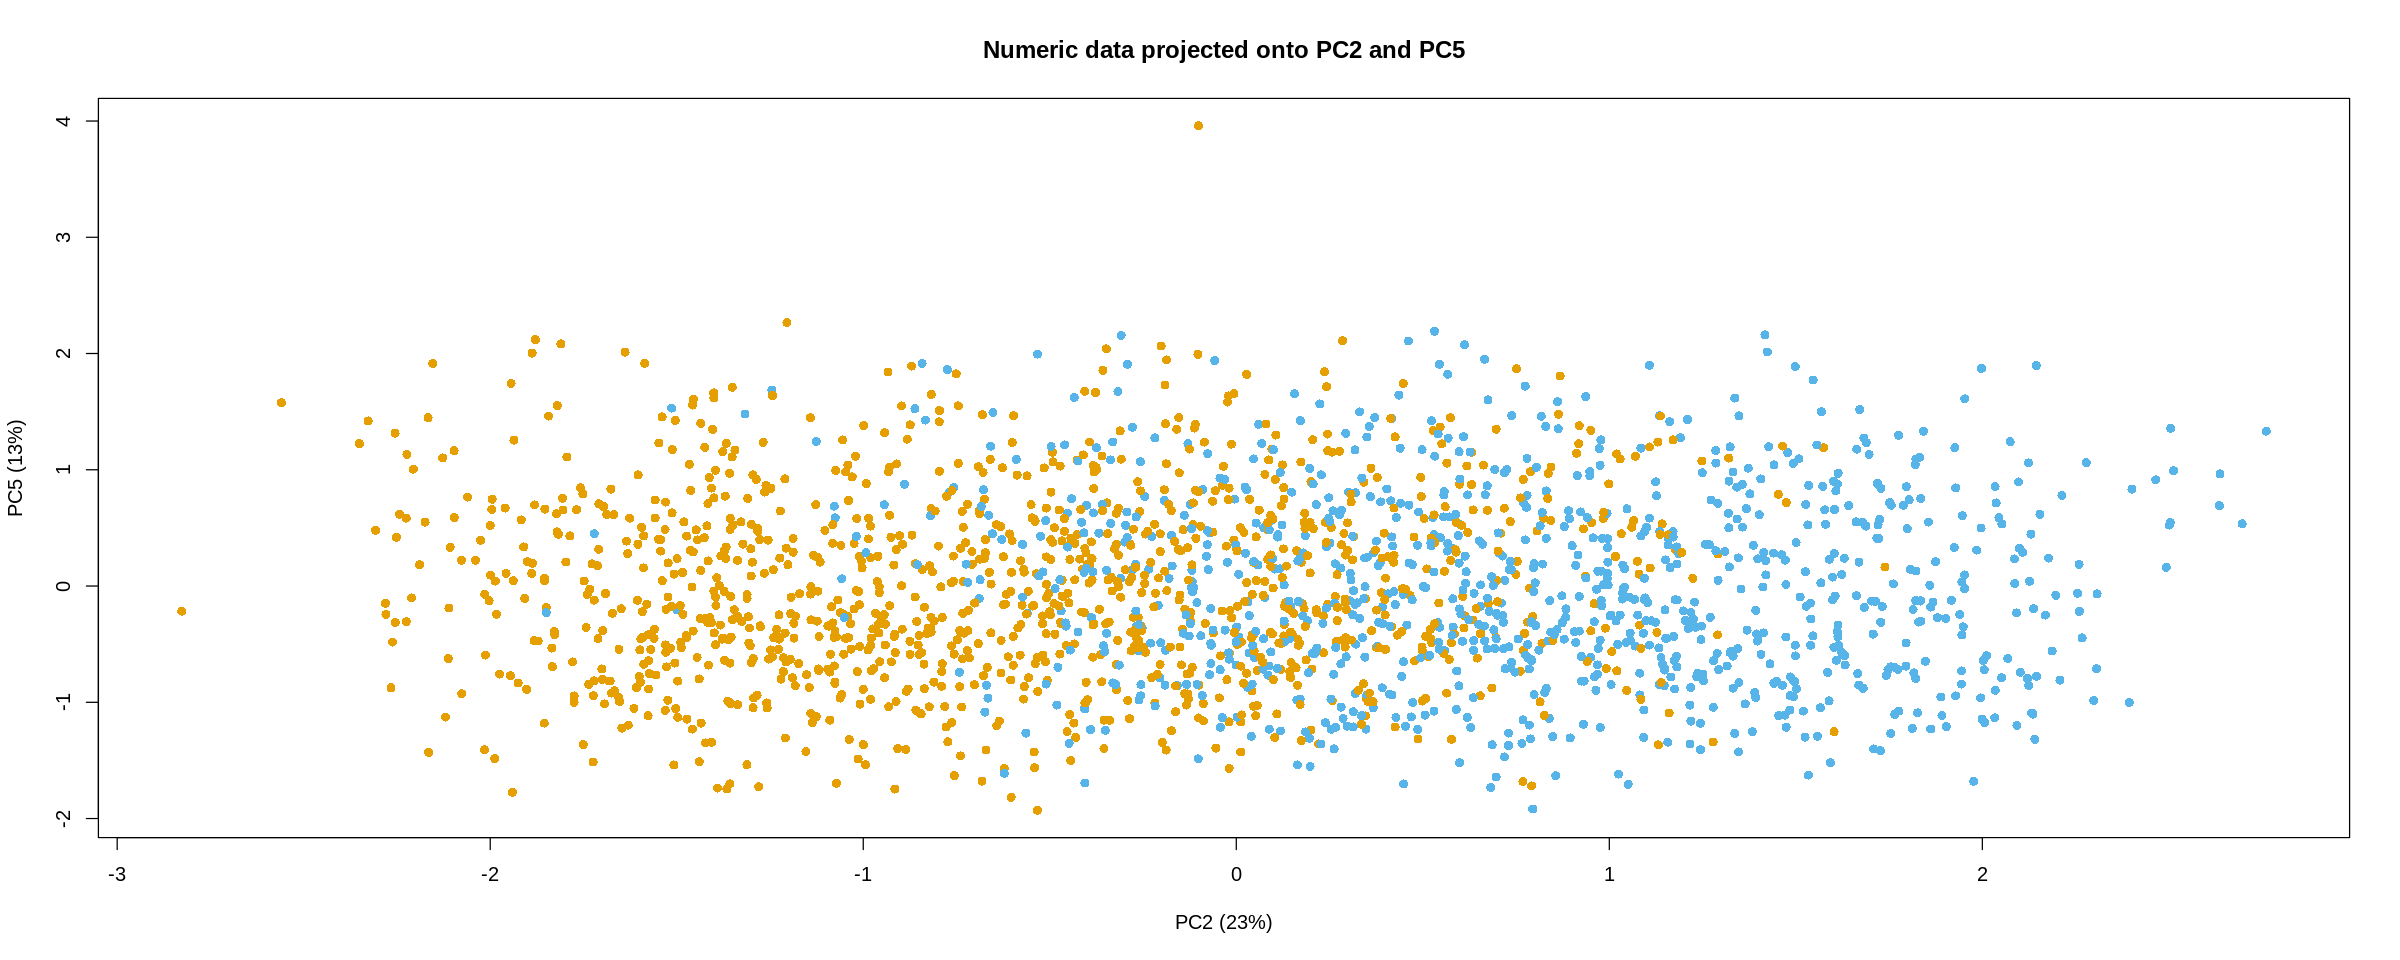

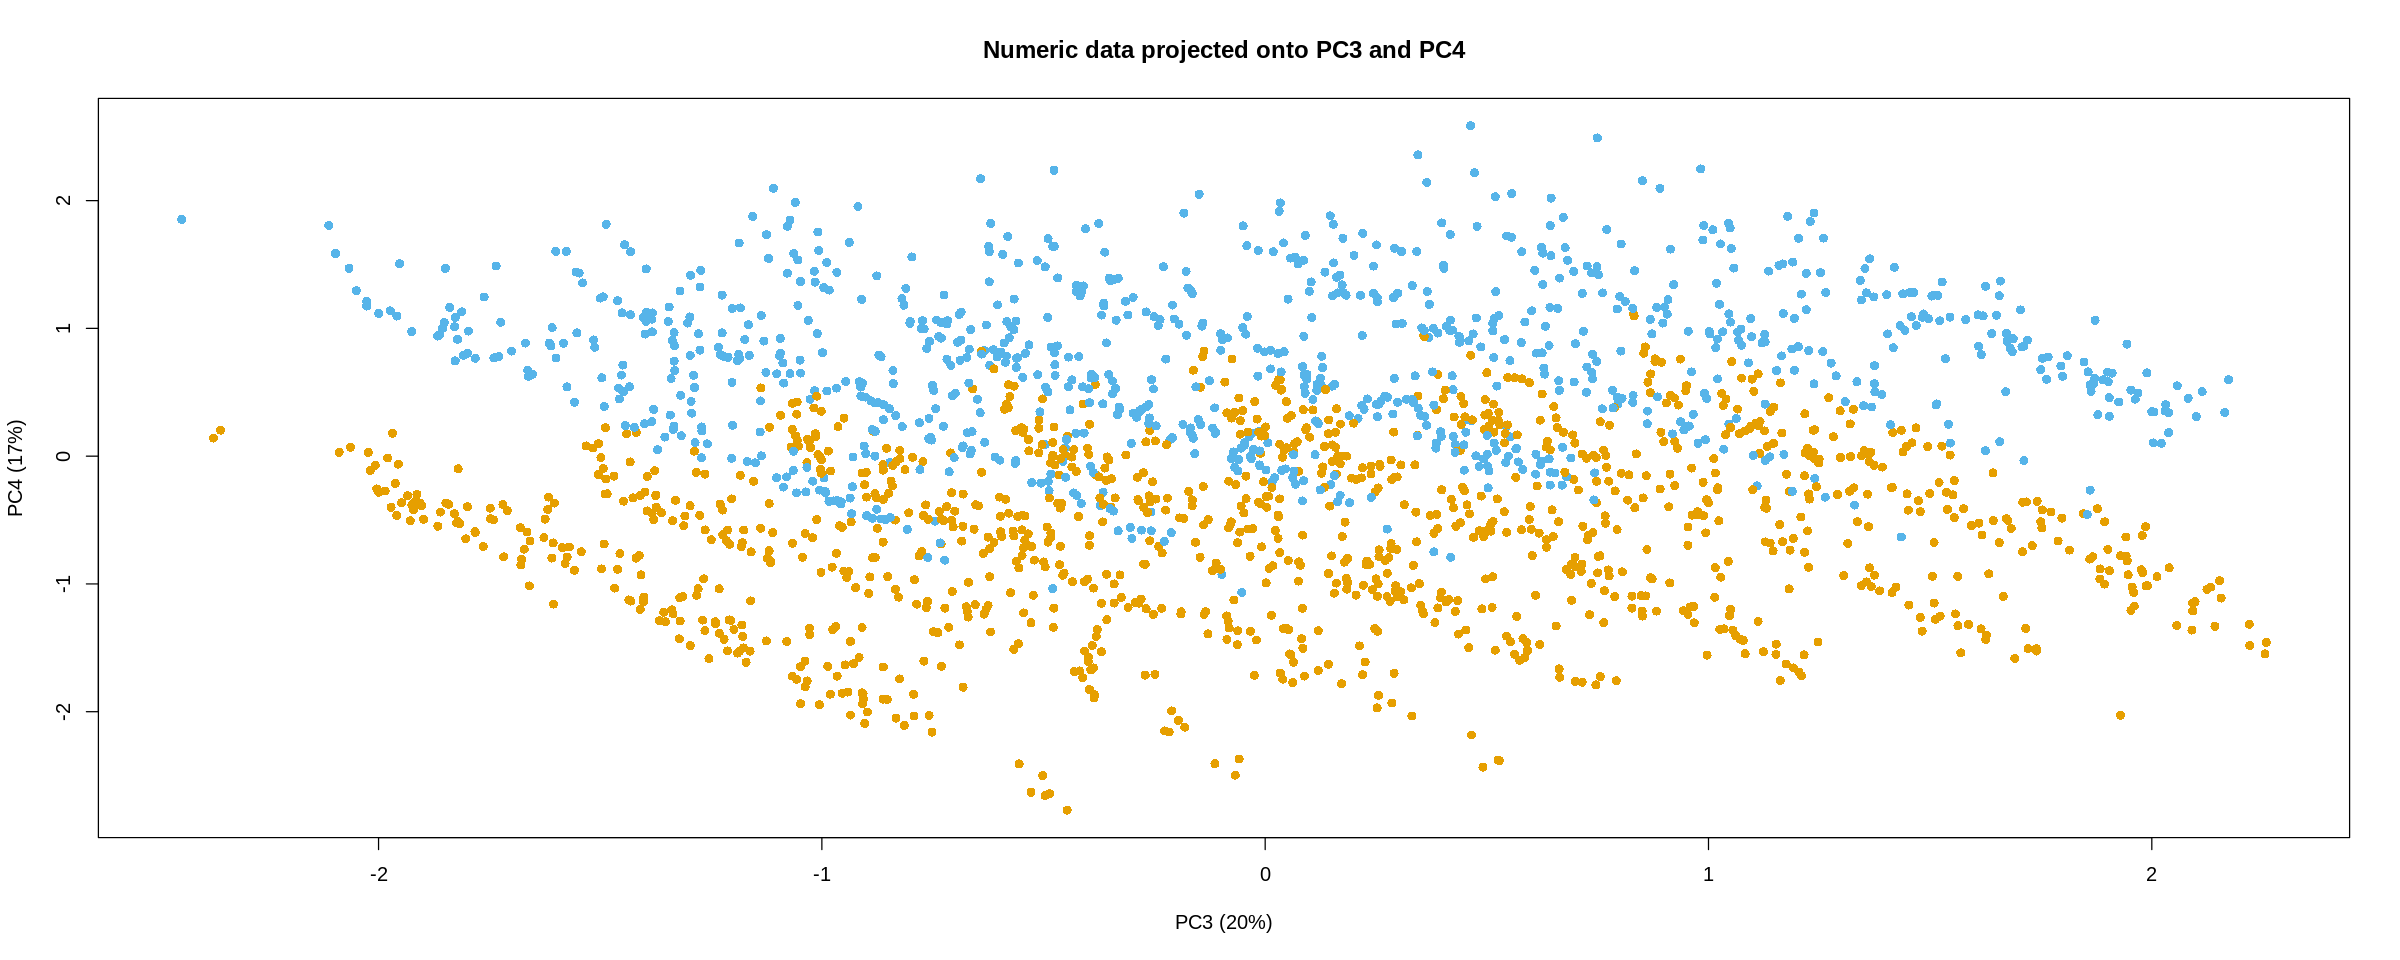

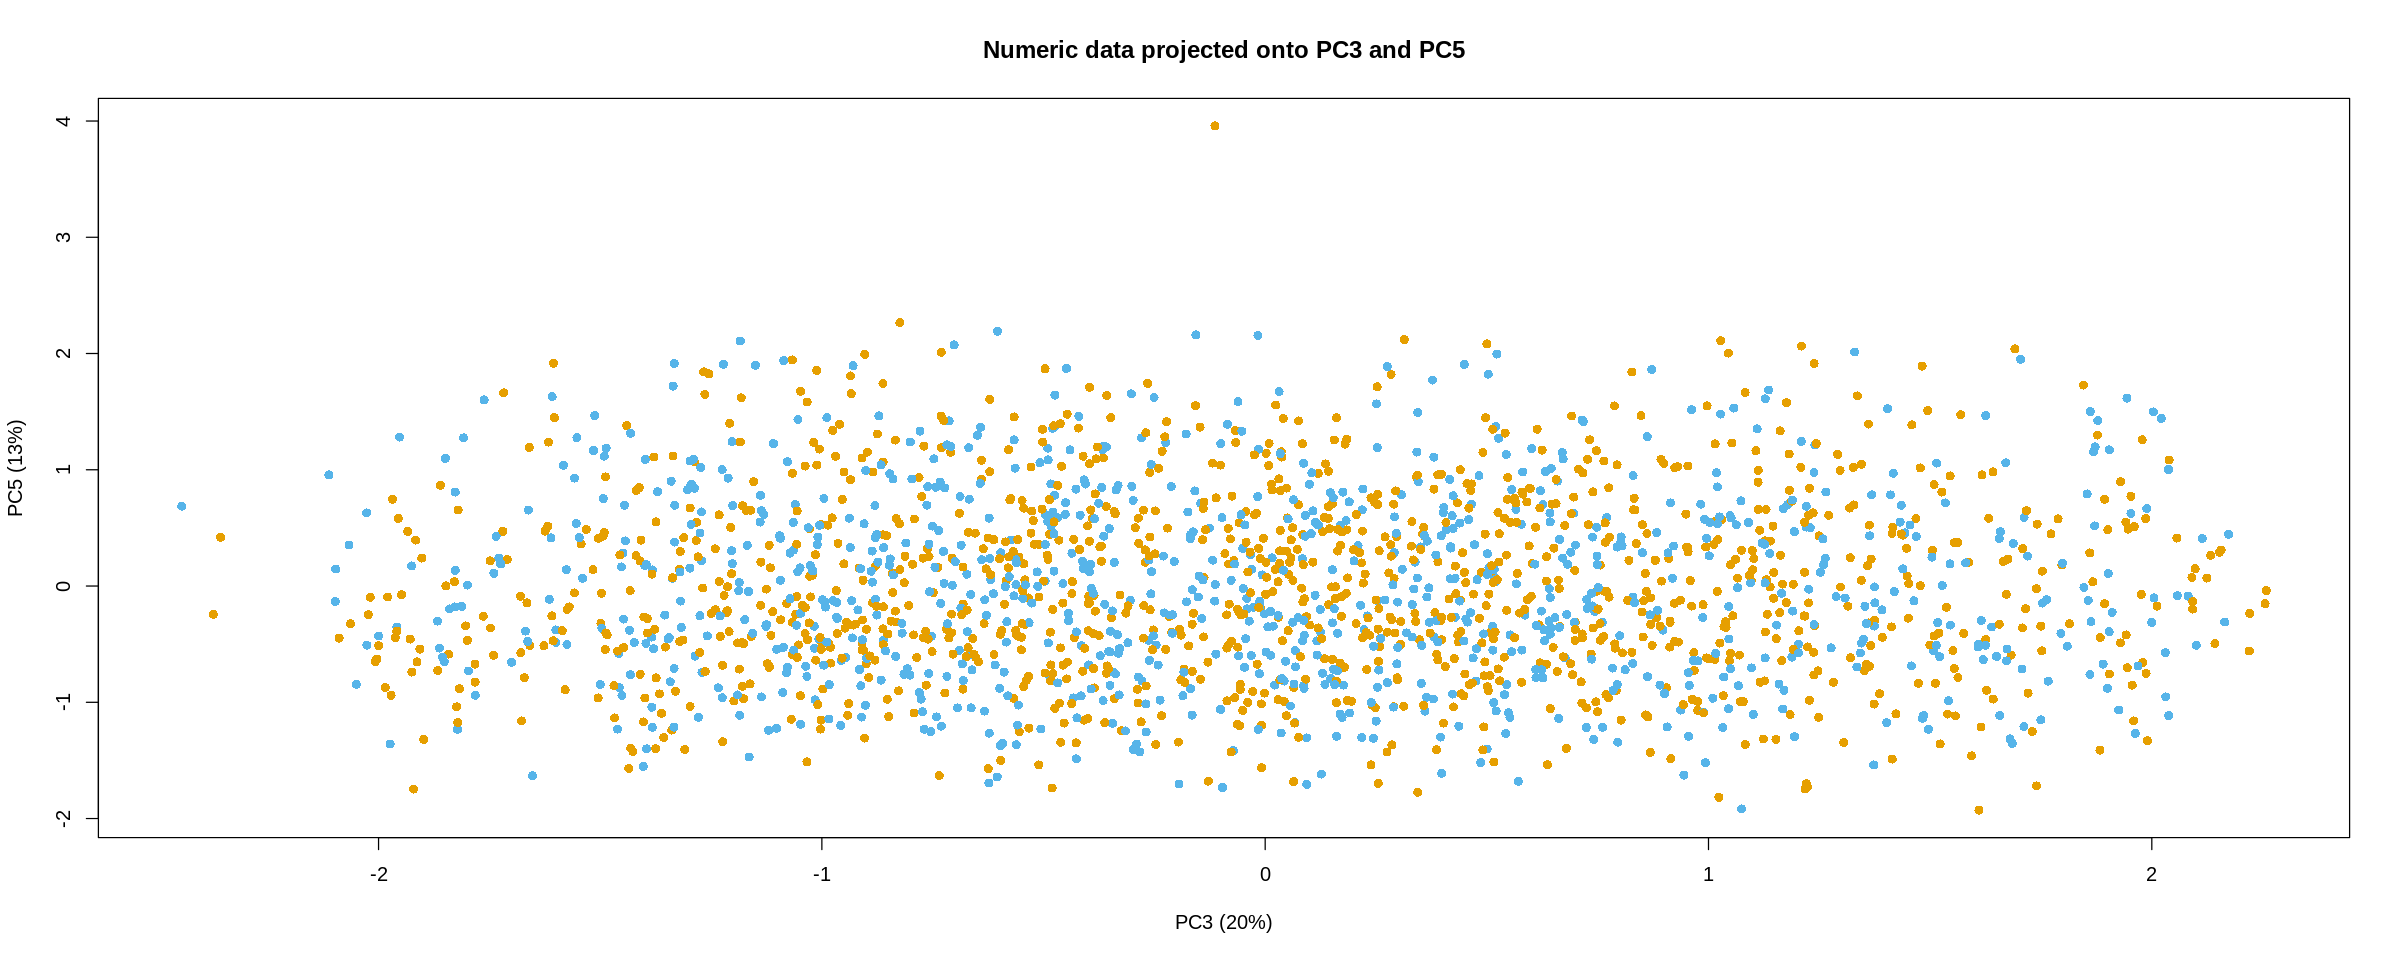

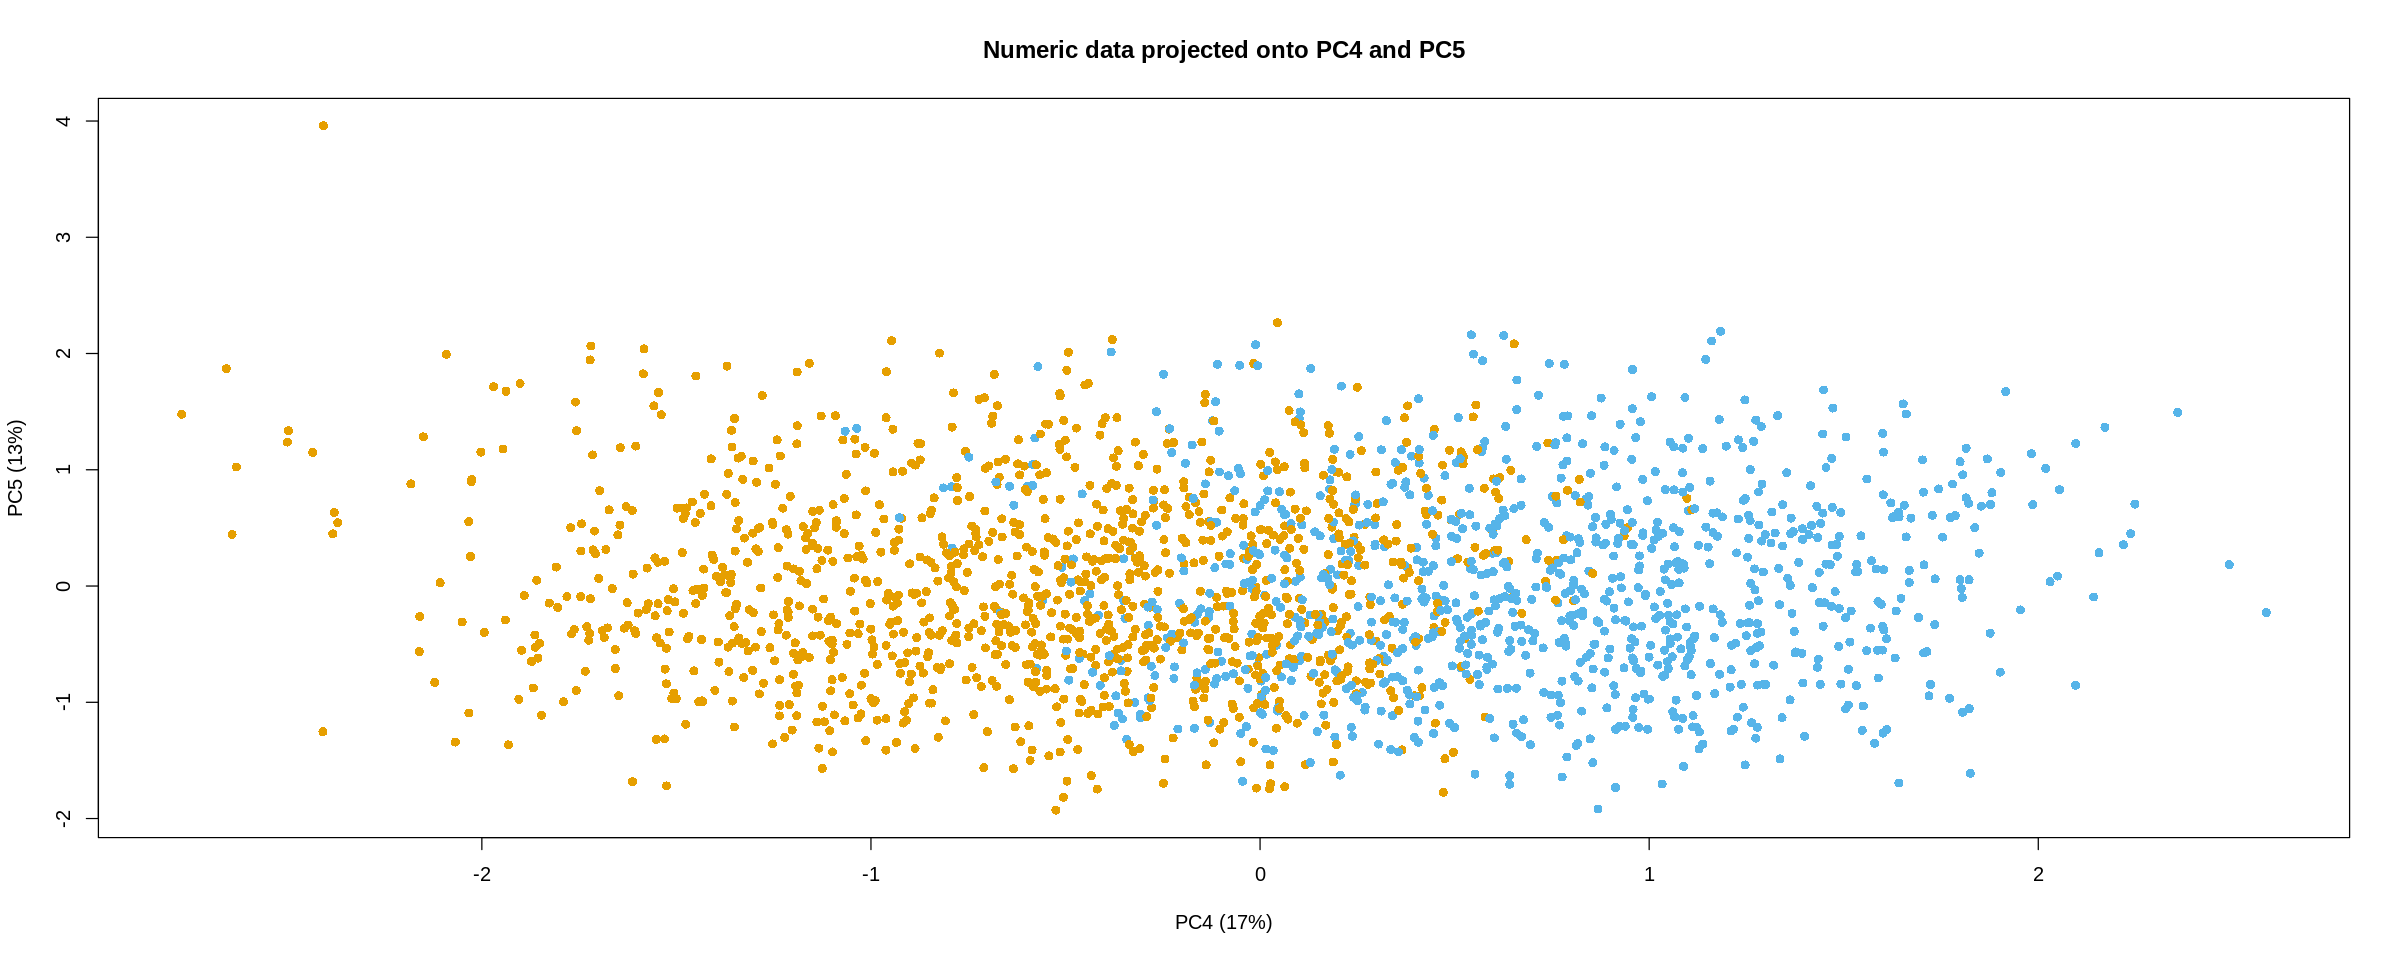

In [ ]:
## PCA

# PCA (Principal Component Analysis) is a data analysis method used to reduce the size of the data
# set by transforming a large number of variables into a smaller number of variables, called principal components.
# These components are linear combinations of the original variables and are calculated to maximize the variation in the data.
# The goal is to reduce data complexity and highlight underlying patterns.

## Finding the PCA is done as follows:

# The data is normalized by subtracting the mean and dividing by the standard deviation
normalized_data <- scale(numeric_data, center = means, scale = sd)

# The covariance matrix of the data is calculated
cov_matrix <- cov(normalized_data)
cat("Matrix covariance:\n\n")
print(cov_matrix)
cat("\n\n")

# The values and eigenvectors of the covariance matrix are calculated
eigen_values <- eigen(cov_matrix)$values
eigen_vectors <- eigen(cov_matrix)$vectors

cat("Eigen values:\n\n")
print(eigen_values)
cat("\n\n")
cat("Eigen vectors:\n\n")
print(eigen_vectors)
cat("\n\n")

# The percentage of variability explained by each main component is calculated
prop_var <- eigen_values / sum(eigen_values)

cat("Percentage of variability:\n\n")
print(prop_var)
cat("\n\n")

# The graph with the percentage of explained variability is displayed
plot(prop_var, type="b", col = "red", pch = 19, main="Proportion of variance explained by each PC",
     xlab="Principal component", ylab="Proportion of variance")

colors <- c("#E69F00", "#56B4E9")

# Defining a vector in which the colors for each point will be stored
point_colors <- vector("character", nrow(numeric_data))

for (i in 1:nrow(numeric_data)) {
  if (numeric_data$Class[i] == 0) {
    point_colors[i] <- colors[1]
  } else {
    point_colors[i] <- colors[2]
  }
}

# The graph with the data projected on the two main components is displayed
for (i in 1:(ncol(eigen_vectors) - 1)) {
  for (j in (i+1):ncol(eigen_vectors)) {
    # We extract the pair of corresponding principal components
    pcs <- eigen_vectors[, c(i,j)]

    # We project the data onto these principal components
    proj_data <- as.matrix(normalized_data) %*% pcs

    plot(proj_data, col = point_colors, pch = 16,
         xlab = paste0("PC", i, " (", round(prop_var[i] * 100), "%)"),
         ylab = paste0("PC", j, " (", round(prop_var[j] * 100), "%)"),
         main = paste0("Numeric data projected onto PC", i, " and PC", j))
  }
}



     0      1 
297926 239307 


sigma summary: Min. : 0.201655086081726 |1st Qu. : 0.242835728222266 |Median : 0.265831486330032 |Mean : 0.283933265487426 |3rd Qu. : 0.307793703375471 |Max. : 0.544967101814013 |

Epoch: Iteration #100 error is: 12.5084472344457

Epoch: Iteration #200 error is: 0.551130576155933

Epoch: Iteration #300 error is: 0.429777187012153

Epoch: Iteration #400 error is: 0.404021257252309

Epoch: Iteration #500 error is: 0.397786337715497

Epoch: Iteration #600 error is: 0.394943904488396

Epoch: Iteration #700 error is: 0.392867928982367

Epoch: Iteration #800 error is: 0.391729124719406

Epoch: Iteration #900 error is: 0.390937291314852

Epoch: Iteration #1000 error is: 0.3903565451571



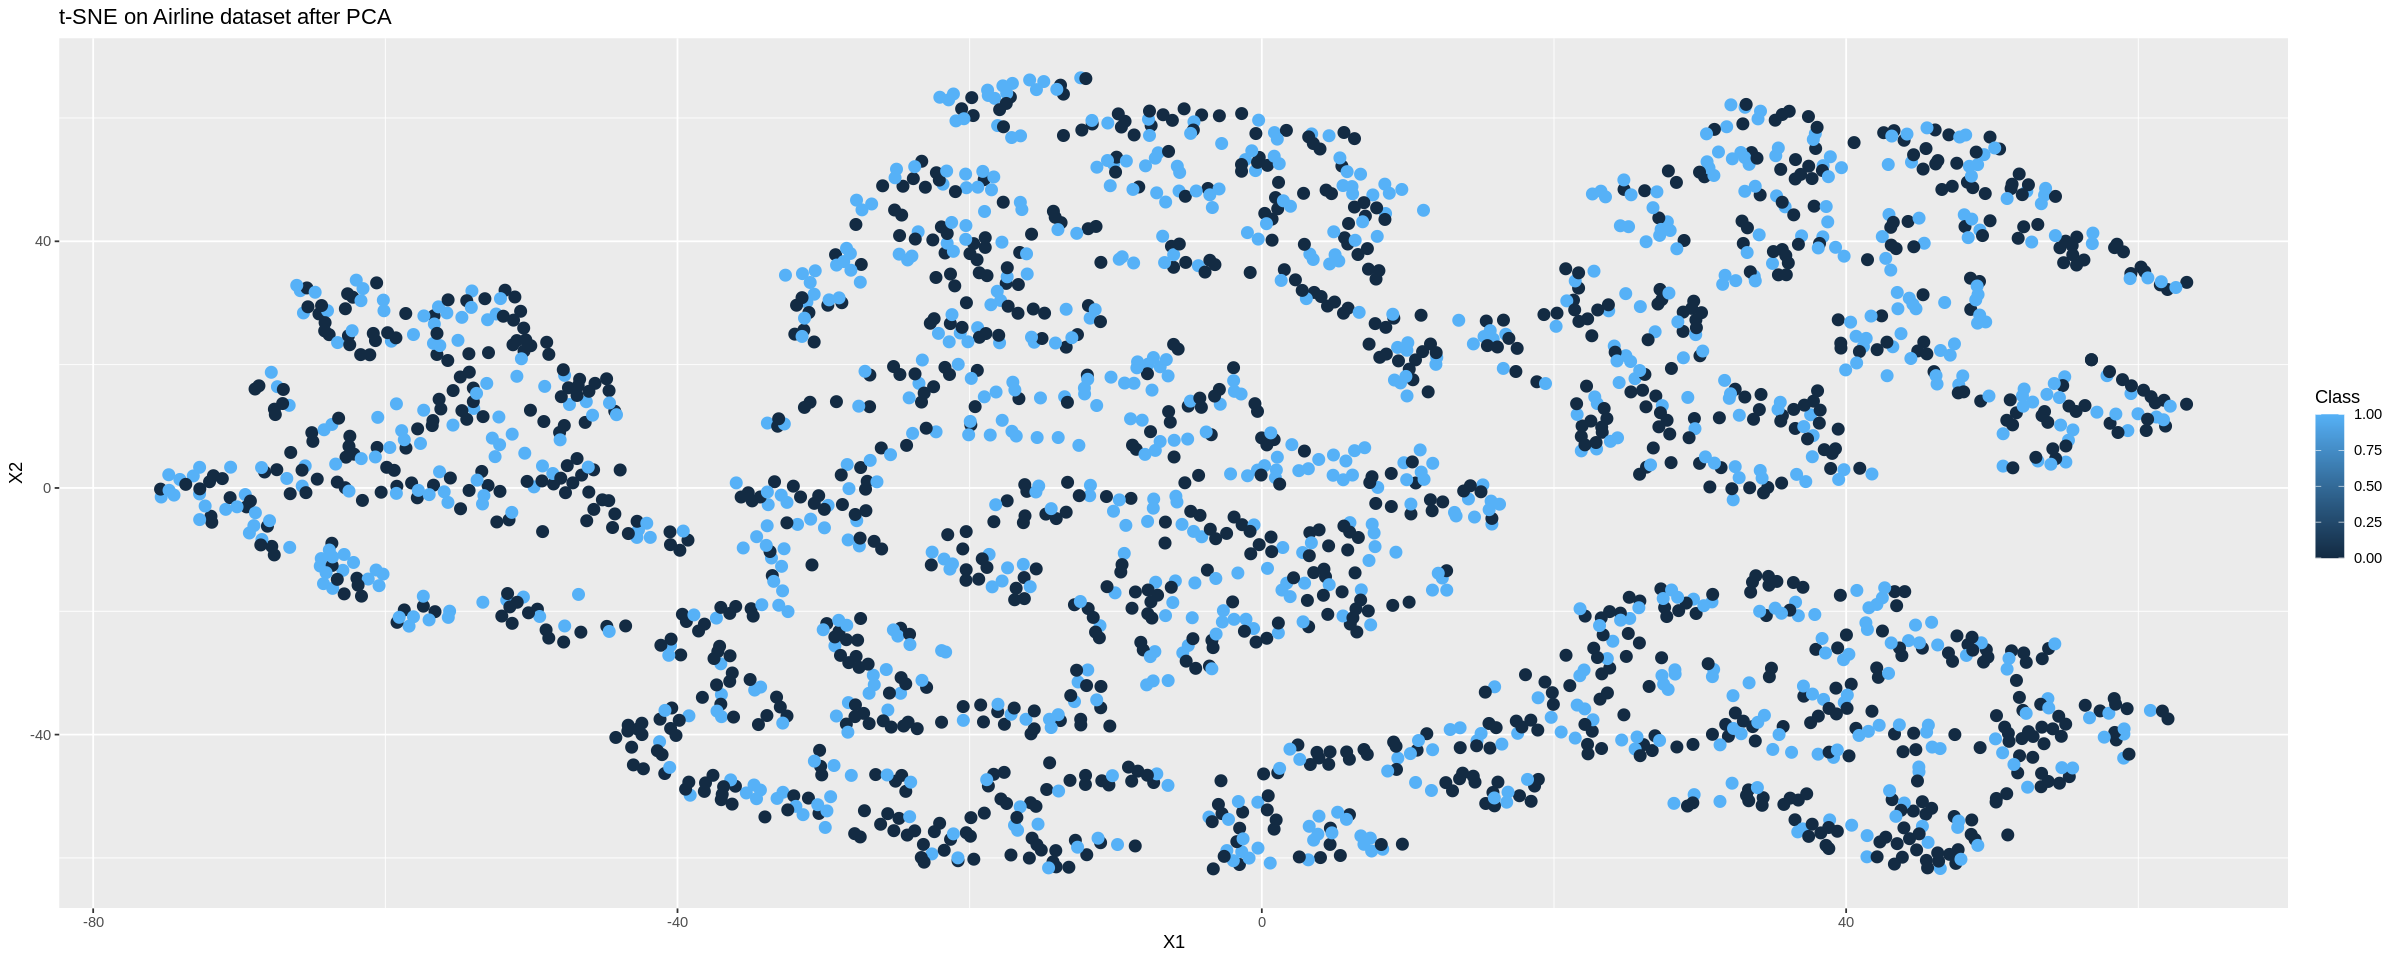

In [ ]:
## Nonlinear maps in two-dimensional space:
## TSNE

# Calculating the number of lines for each class value
class_counts <- table(numeric_data$Class)

# Calculating the number of lines to remove for each class
num_to_remove <- round(class_counts * 250 / 251)
print(num_to_remove)

# Selecting the appropriate lines for deletion and eliminate them from the dataset
to_remove <- c(sample(which(numeric_data$Class == 0), num_to_remove[1]),
               sample(which(numeric_data$Class == 1), num_to_remove[2]))
numeric_data <- numeric_data[-to_remove,]

# PCA
pca_data <- prcomp(numeric_data[, -5], center = TRUE, scale. = TRUE)
pca_scores <- data.frame(pca_data$x[, 1:2], Class = numeric_data$Class)

# t-SNE
set.seed(123)
tsne_data <- tsne(pca_scores[, -3], perplexity = 40, max_iter = 1000)
tsne_scores <- data.frame(tsne_data, Class = numeric_data$Class)

ggplot(tsne_scores, aes(x = X1, y = X2, color = Class)) +
  geom_point(size = 3) +
  ggtitle("t-SNE on Airline dataset after PCA")



     0      1 
297926 239307 


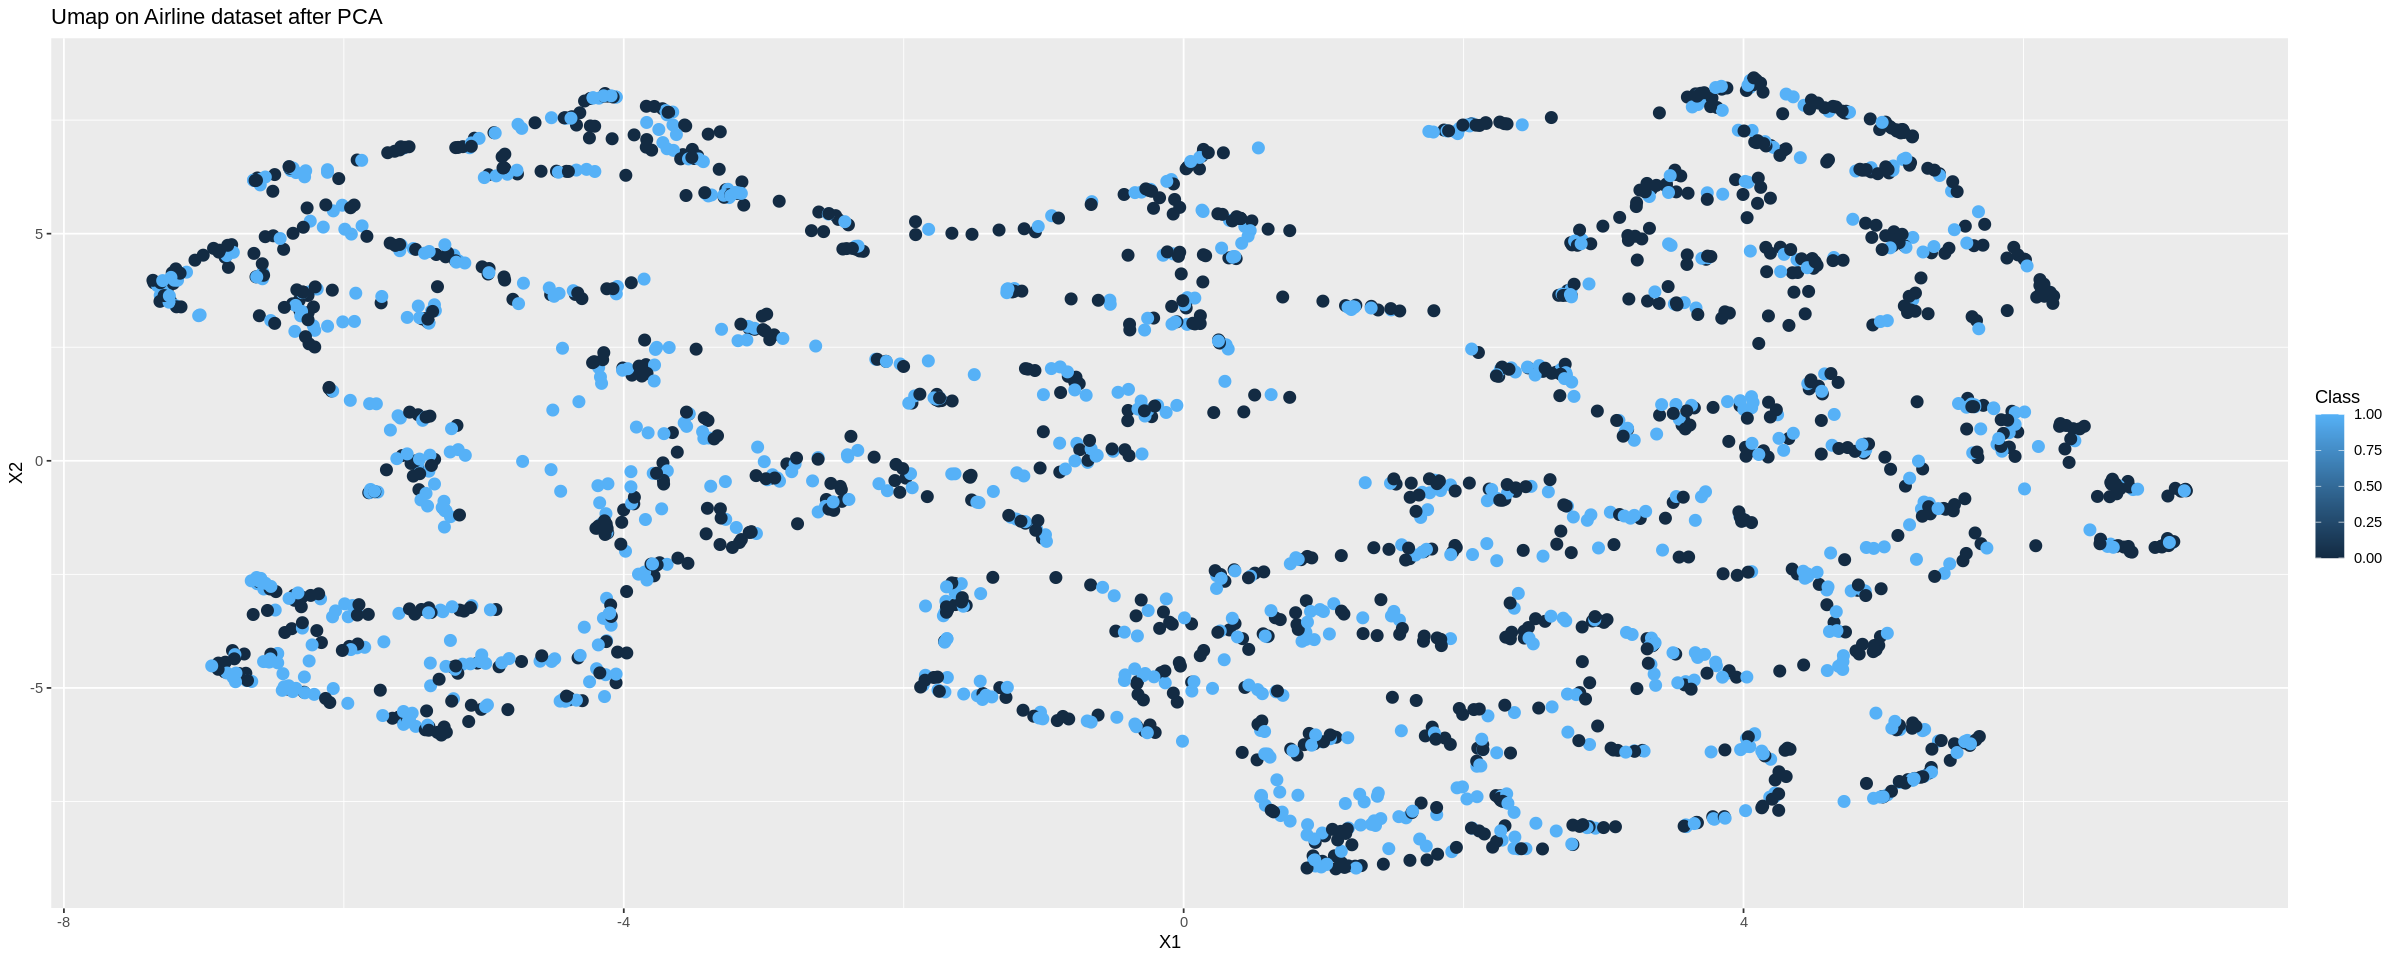

In [ ]:
## UMAP

# Calculating the number of lines for each class value
class_counts <- table(numeric_data$Class)

# Calculating the number of lines to remove for each class
num_to_remove <- round(class_counts * 250 / 251)
print(num_to_remove)

# Selecting the appropriate lines for deletion and eliminate them from the dataset
to_remove <- c(sample(which(numeric_data$Class == 0), num_to_remove[1]),
               sample(which(numeric_data$Class == 1), num_to_remove[2]))
numeric_data <- numeric_data[-to_remove,]

# PCA
pca_data <- prcomp(numeric_data[, -5], center = TRUE, scale. = TRUE)
pca_scores <- data.frame(pca_data$x[, 1:2], Class = numeric_data$Class)

# UMAP
set.seed(123)
umap_data <- umap(pca_scores[, -3], n_neighbors = 15, min_dist = 0.1, metric = "euclidean")
umap_scores <- data.frame(umap_data$layout, Class = numeric_data$Class)

ggplot(umap_scores, aes(x = X1, y = X2, color = Class)) +
  geom_point(size = 3) +
  ggtitle("Umap on Airline dataset after PCA")

## Conclusion: due to the very large data set, Google Colab did not allow me to use enough memory to implement the embedding methods, which led to a failed experiment in this direction.
## The results shown above are only the presentation of the method on a very small piece of data, in which we eliminated many elements from their representation,
## therefore we cannot refer to these methods for our conclusions regarding the dataset in question.


Converting input data to the required matrix format.

Using half_range 1



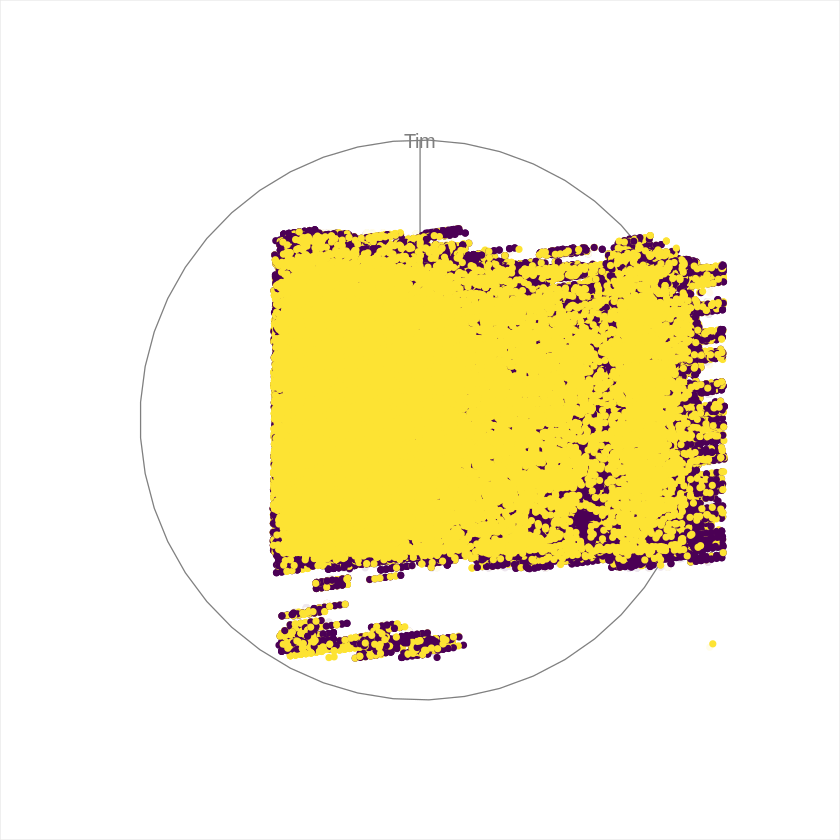

In [ ]:
## Projections extracted by projection pursuit methodologies - the TOUR package
animate_xy(numeric_data[1:4], col=numeric_data$Class)

## Conclusion: unfortunately, also here due to the large amount of data, the graph does not look very good, and the animation is not performed due to this large volume of data,
## Google Colab again making this process impossible. More for this animation, not even your own PC can render the animation in optimal times due to the large volume of data... .
## But according to the documentation, the projection is done correctly with valid parameters.


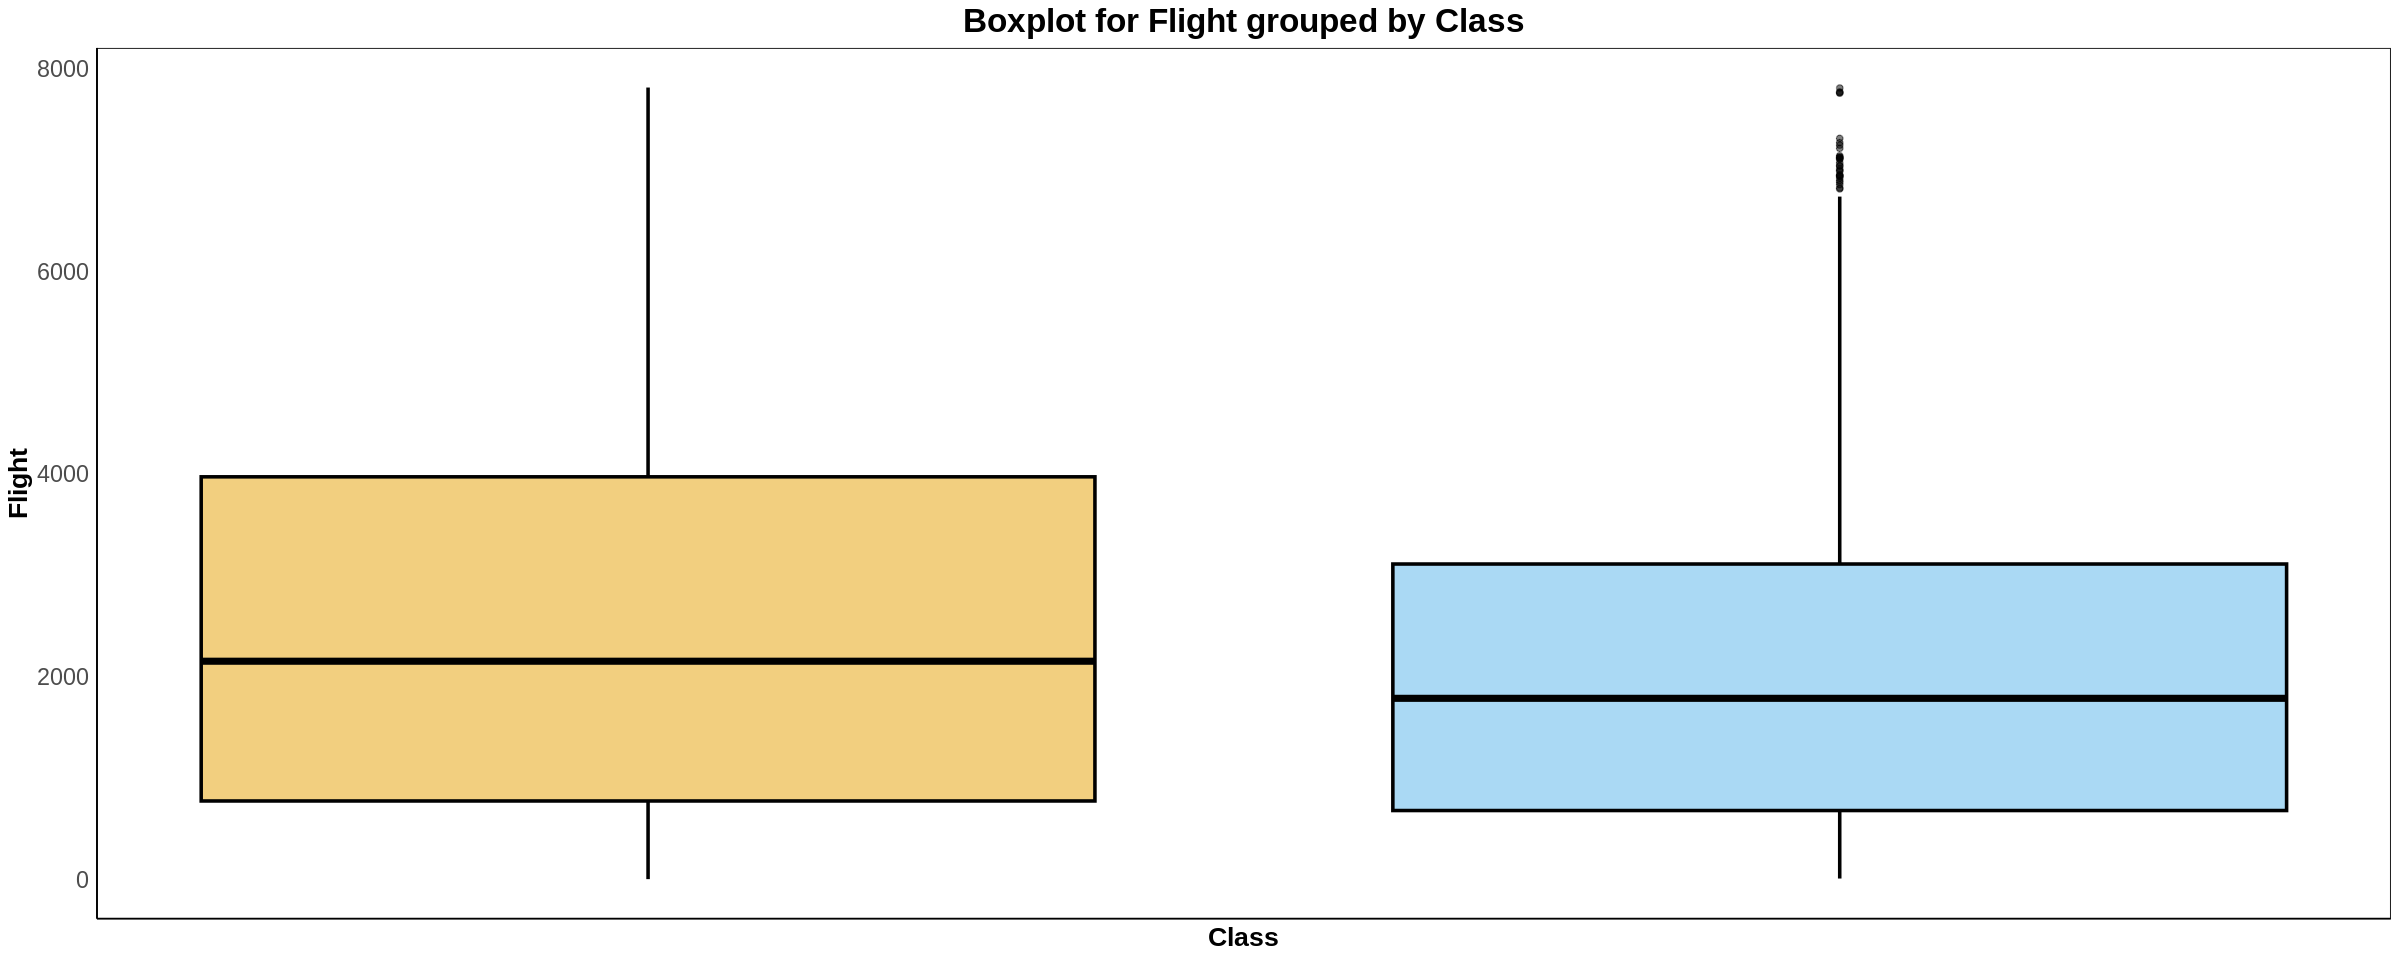

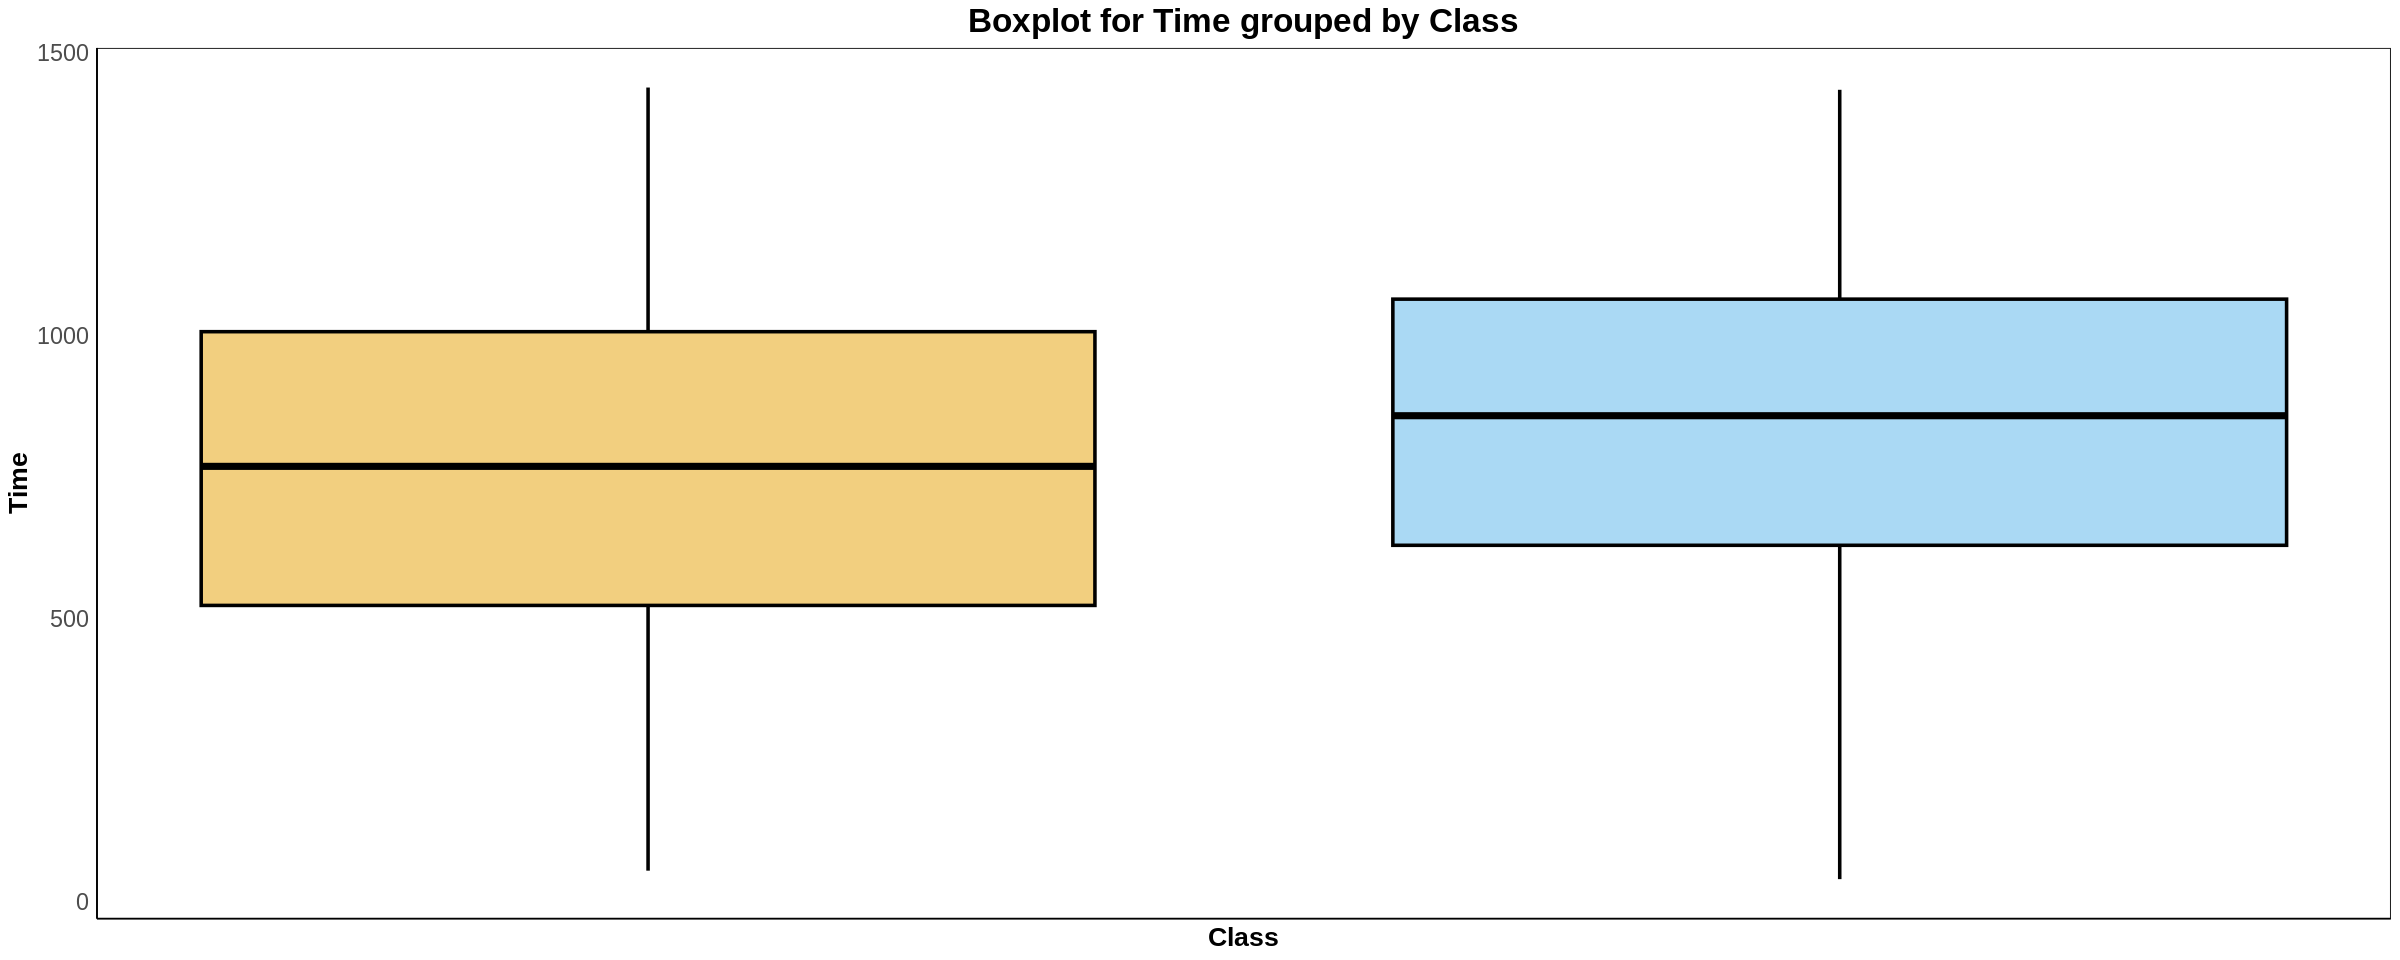

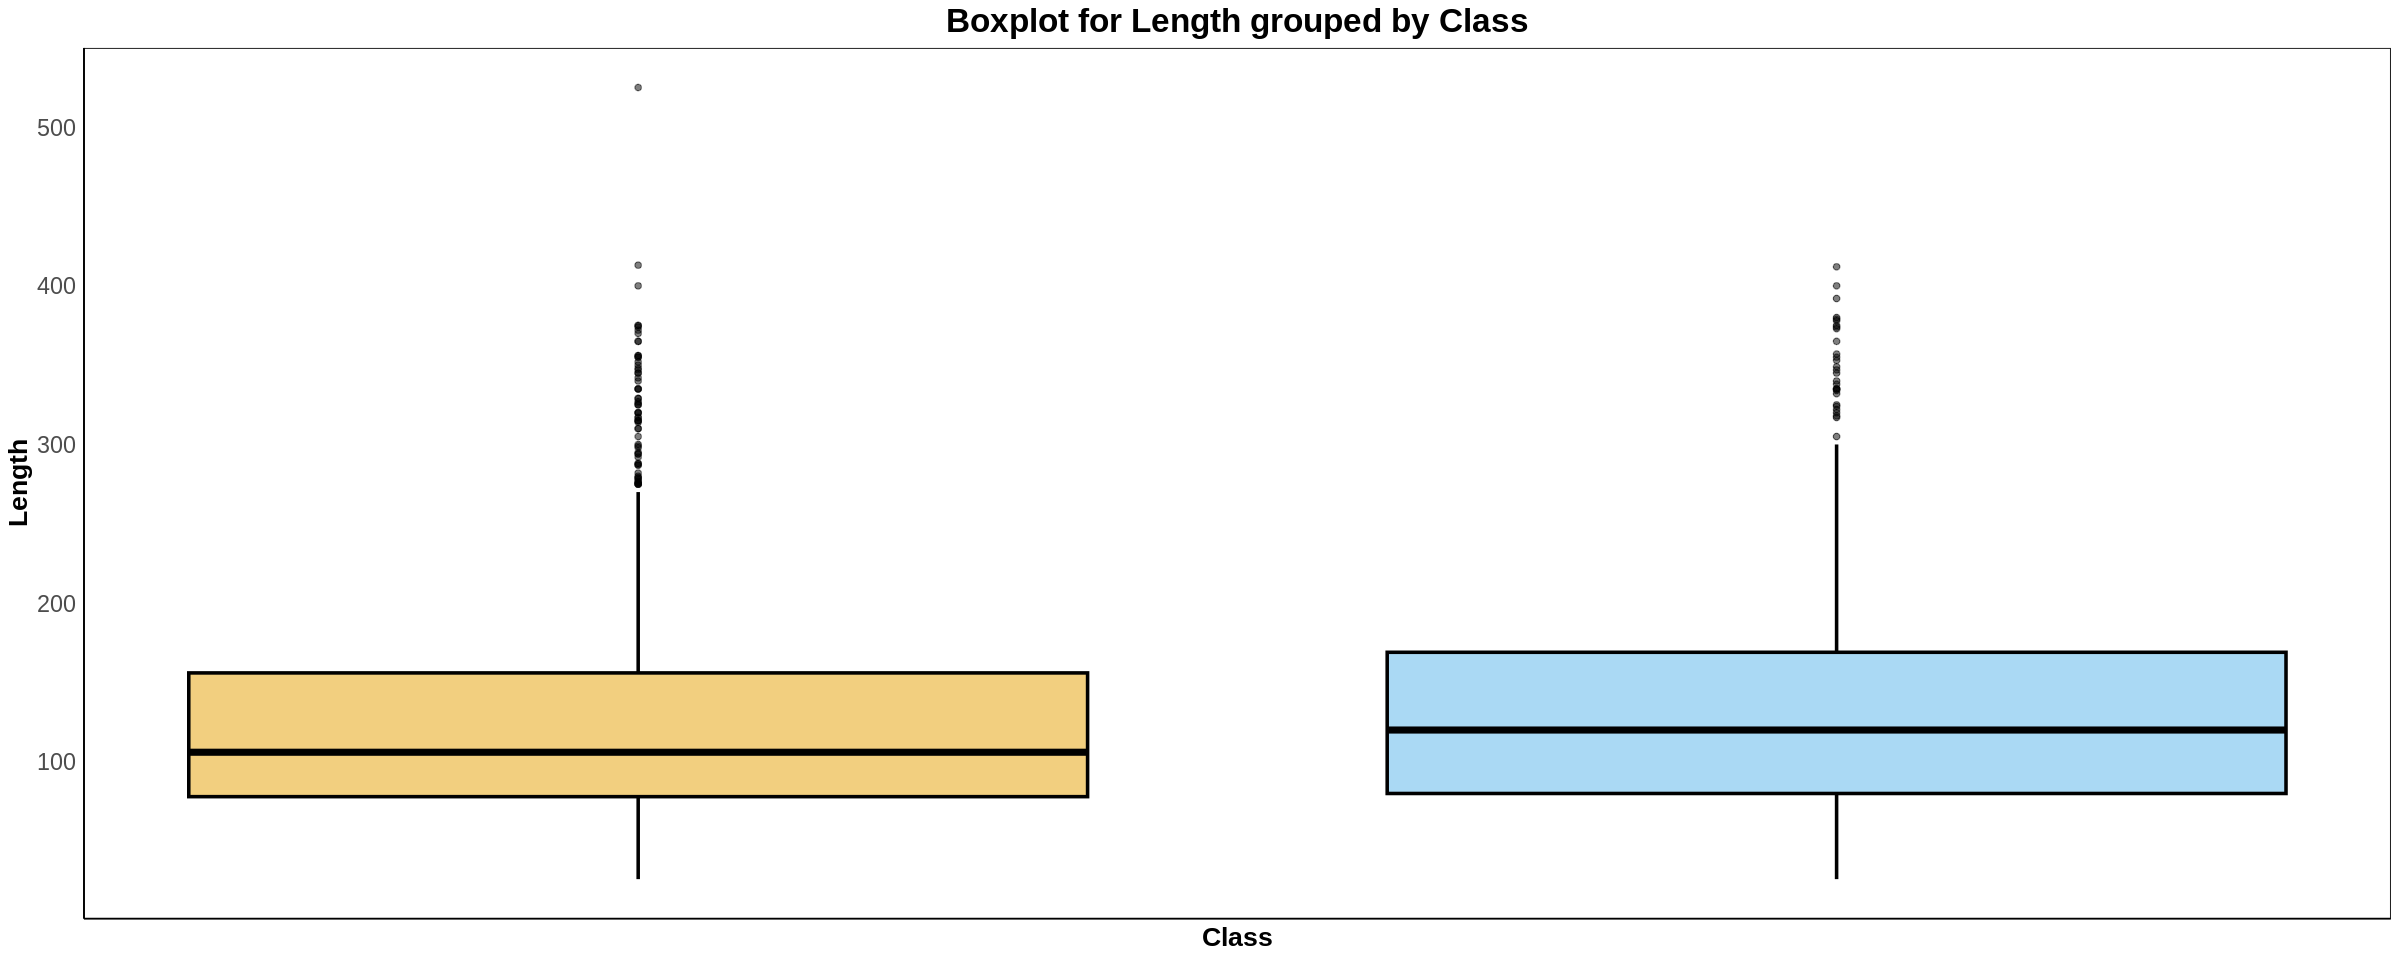

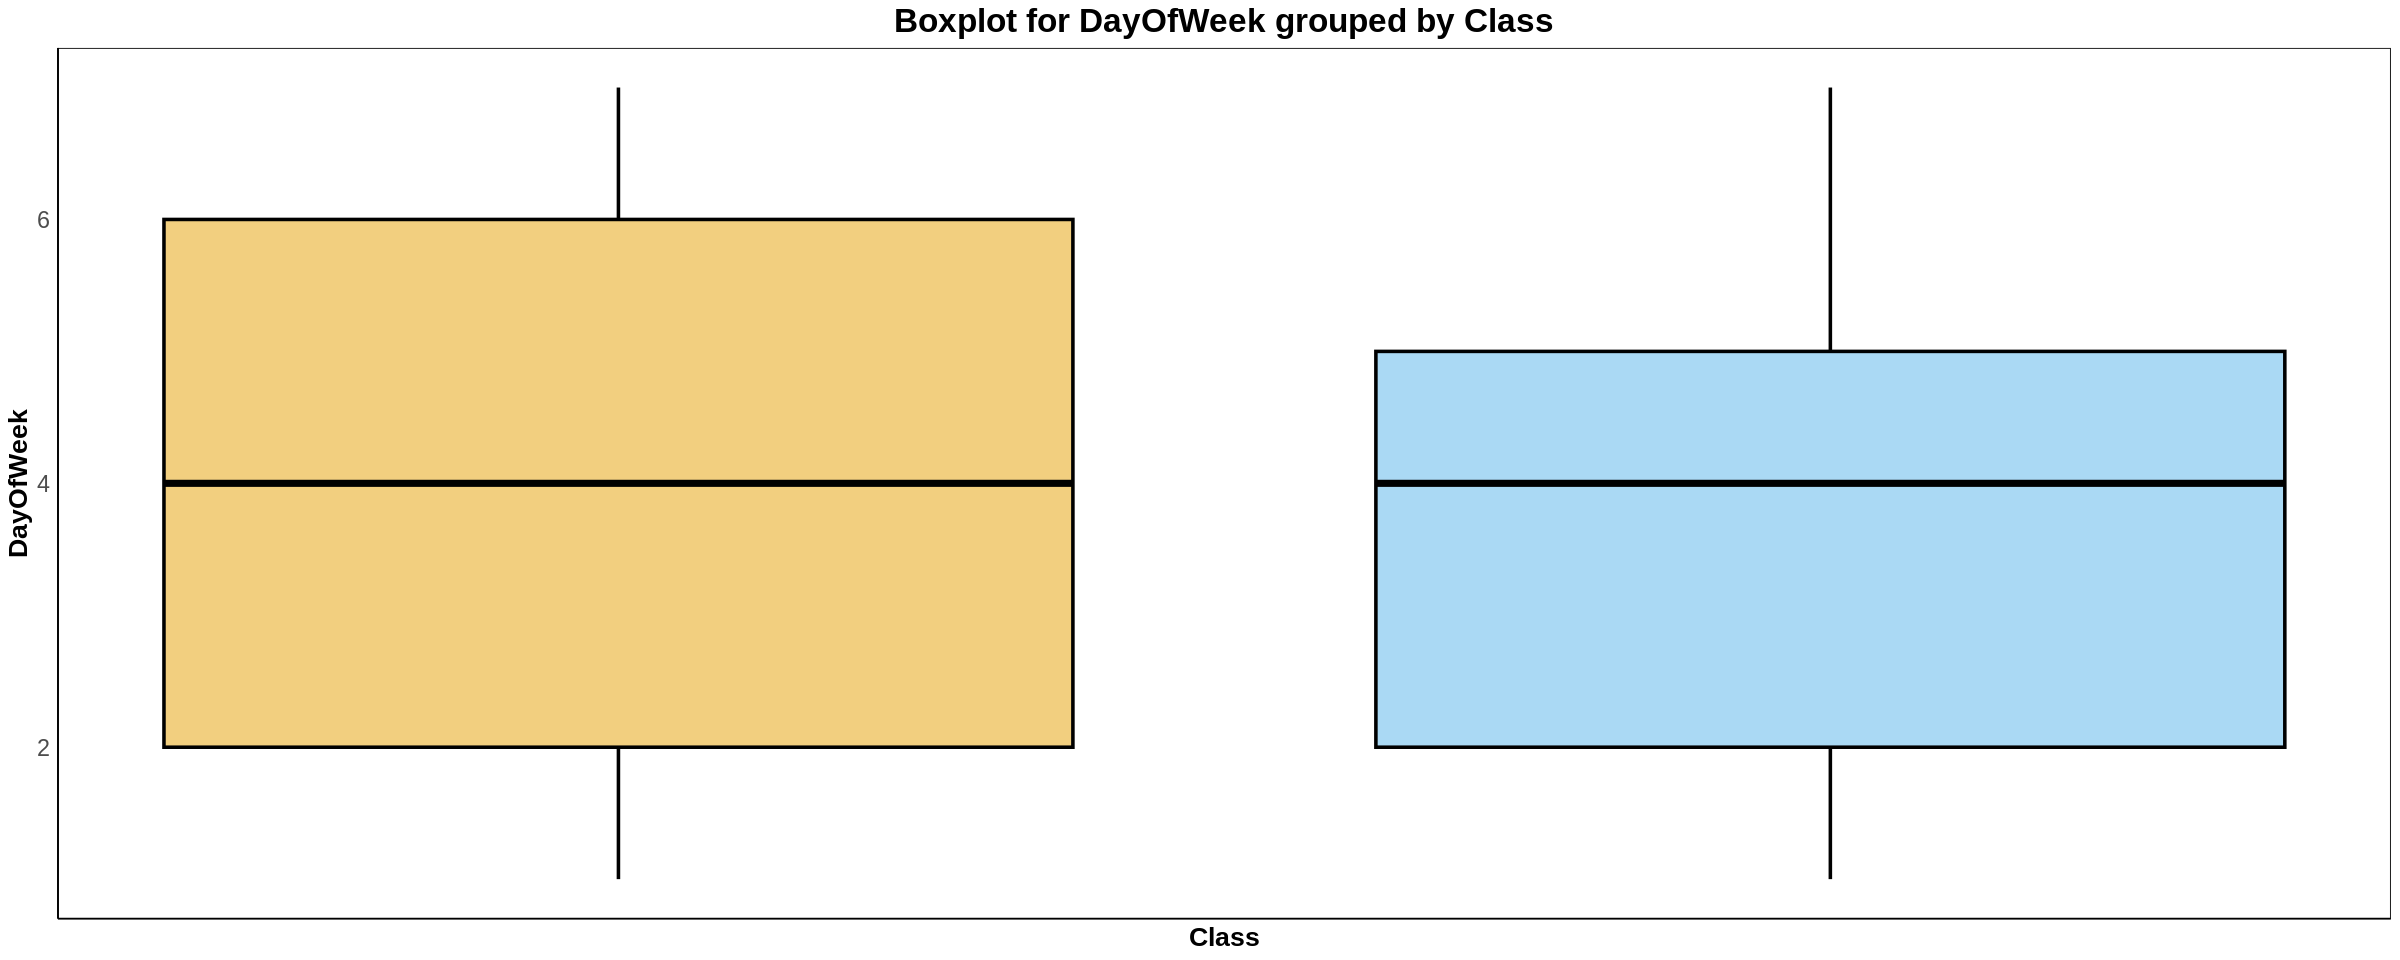

In [ ]:
## Conditioned boxplots for the target variable

ggplot(numeric_data, aes(x = Flight, y = Class, group = Class)) +
      geom_boxplot(fill = c("#E69F00", "#56B4E9"), color = "black", size = 1, alpha = 0.5) +
      labs(title = "Boxplot for Flight grouped by Class",
          x = "Flight",
          y = "Class") +
      theme_minimal() +
      theme(axis.text.x = element_blank()) +
      theme(plot.title = element_text(hjust = 0.5, size=20, face="bold")) +
      theme(panel.background = element_rect(fill = "white"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour = "black"),
          axis.text = element_text(size=14),
          axis.title = element_text(size=16, face="bold")) +
      coord_flip()

ggplot(numeric_data, aes(x = Time, y = Class, group = Class)) +
      geom_boxplot(fill = c("#E69F00", "#56B4E9"), color = "black", size = 1, alpha = 0.5) +
      labs(title = "Boxplot for Time grouped by Class",
          x = "Time",
          y = "Class") +
      theme_minimal() +
      theme(axis.text.x = element_blank()) +
      theme(plot.title = element_text(hjust = 0.5, size=20, face="bold")) +
      theme(panel.background = element_rect(fill = "white"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour = "black"),
          axis.text = element_text(size=14),
          axis.title = element_text(size=16, face="bold")) +
      coord_flip()

ggplot(numeric_data, aes(x = Length, y = Class, group = Class)) +
      geom_boxplot(fill = c("#E69F00", "#56B4E9"), color = "black", size = 1, alpha = 0.5) +
      labs(title = "Boxplot for Length grouped by Class",
          x = "Length",
          y = "Class") +
      theme_minimal() +
      theme(axis.text.x = element_blank()) +
      theme(plot.title = element_text(hjust = 0.5, size=20, face="bold")) +
      theme(panel.background = element_rect(fill = "white"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour = "black"),
          axis.text = element_text(size=14),
          axis.title = element_text(size=16, face="bold")) +
      coord_flip()

ggplot(numeric_data, aes(x = DayOfWeek, y = Class, group = Class)) +
      geom_boxplot(fill = c("#E69F00", "#56B4E9"), color = "black", size = 1, alpha = 0.5) +
      labs(title = "Boxplot for DayOfWeek grouped by Class",
          x = "DayOfWeek",
          y = "Class") +
      theme_minimal() +
      theme(axis.text.x = element_blank()) +
      theme(plot.title = element_text(hjust = 0.5, size=20, face="bold")) +
      theme(panel.background = element_rect(fill = "white"),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour = "black"),
          axis.text = element_text(size=14),
          axis.title = element_text(size=16, face="bold")) +
      coord_flip()

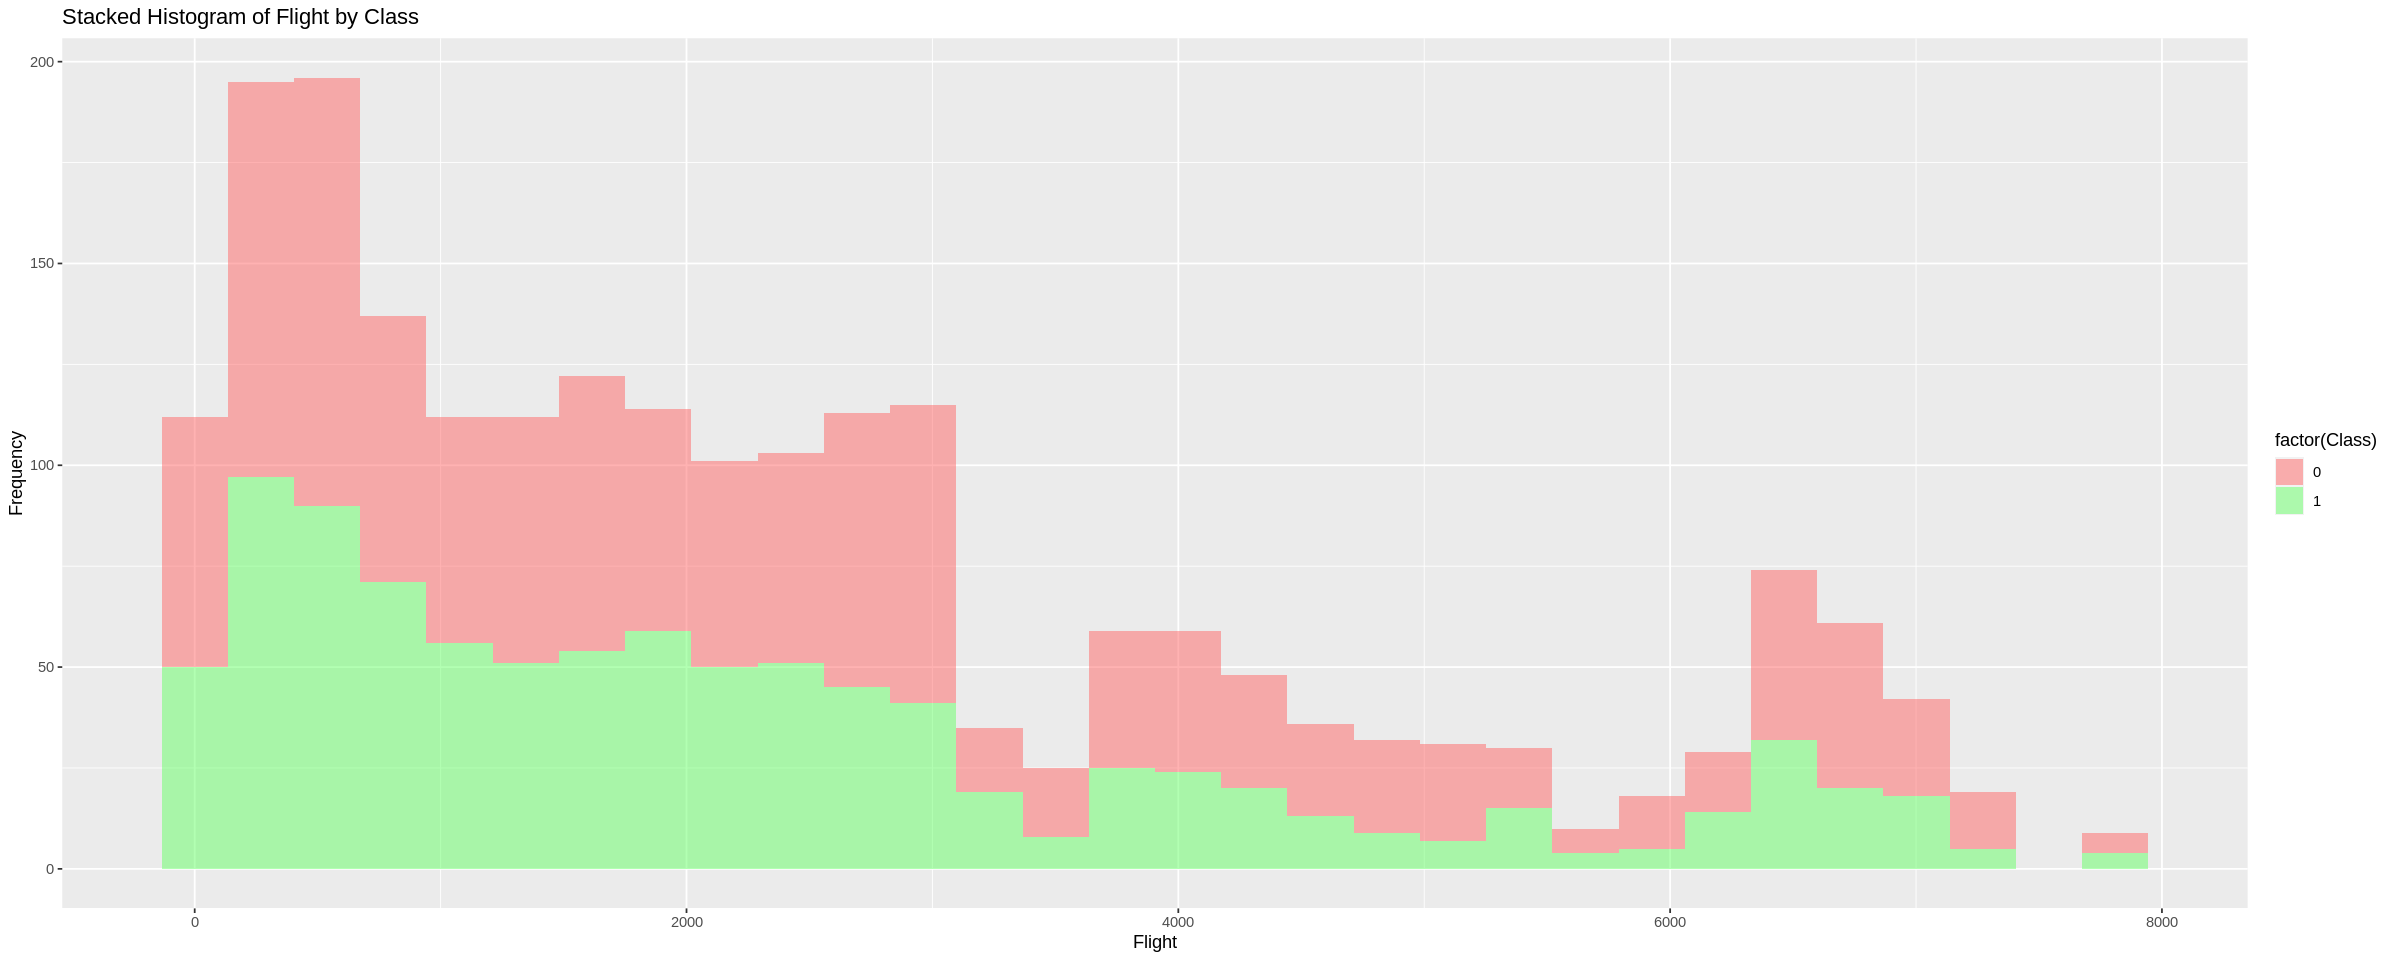

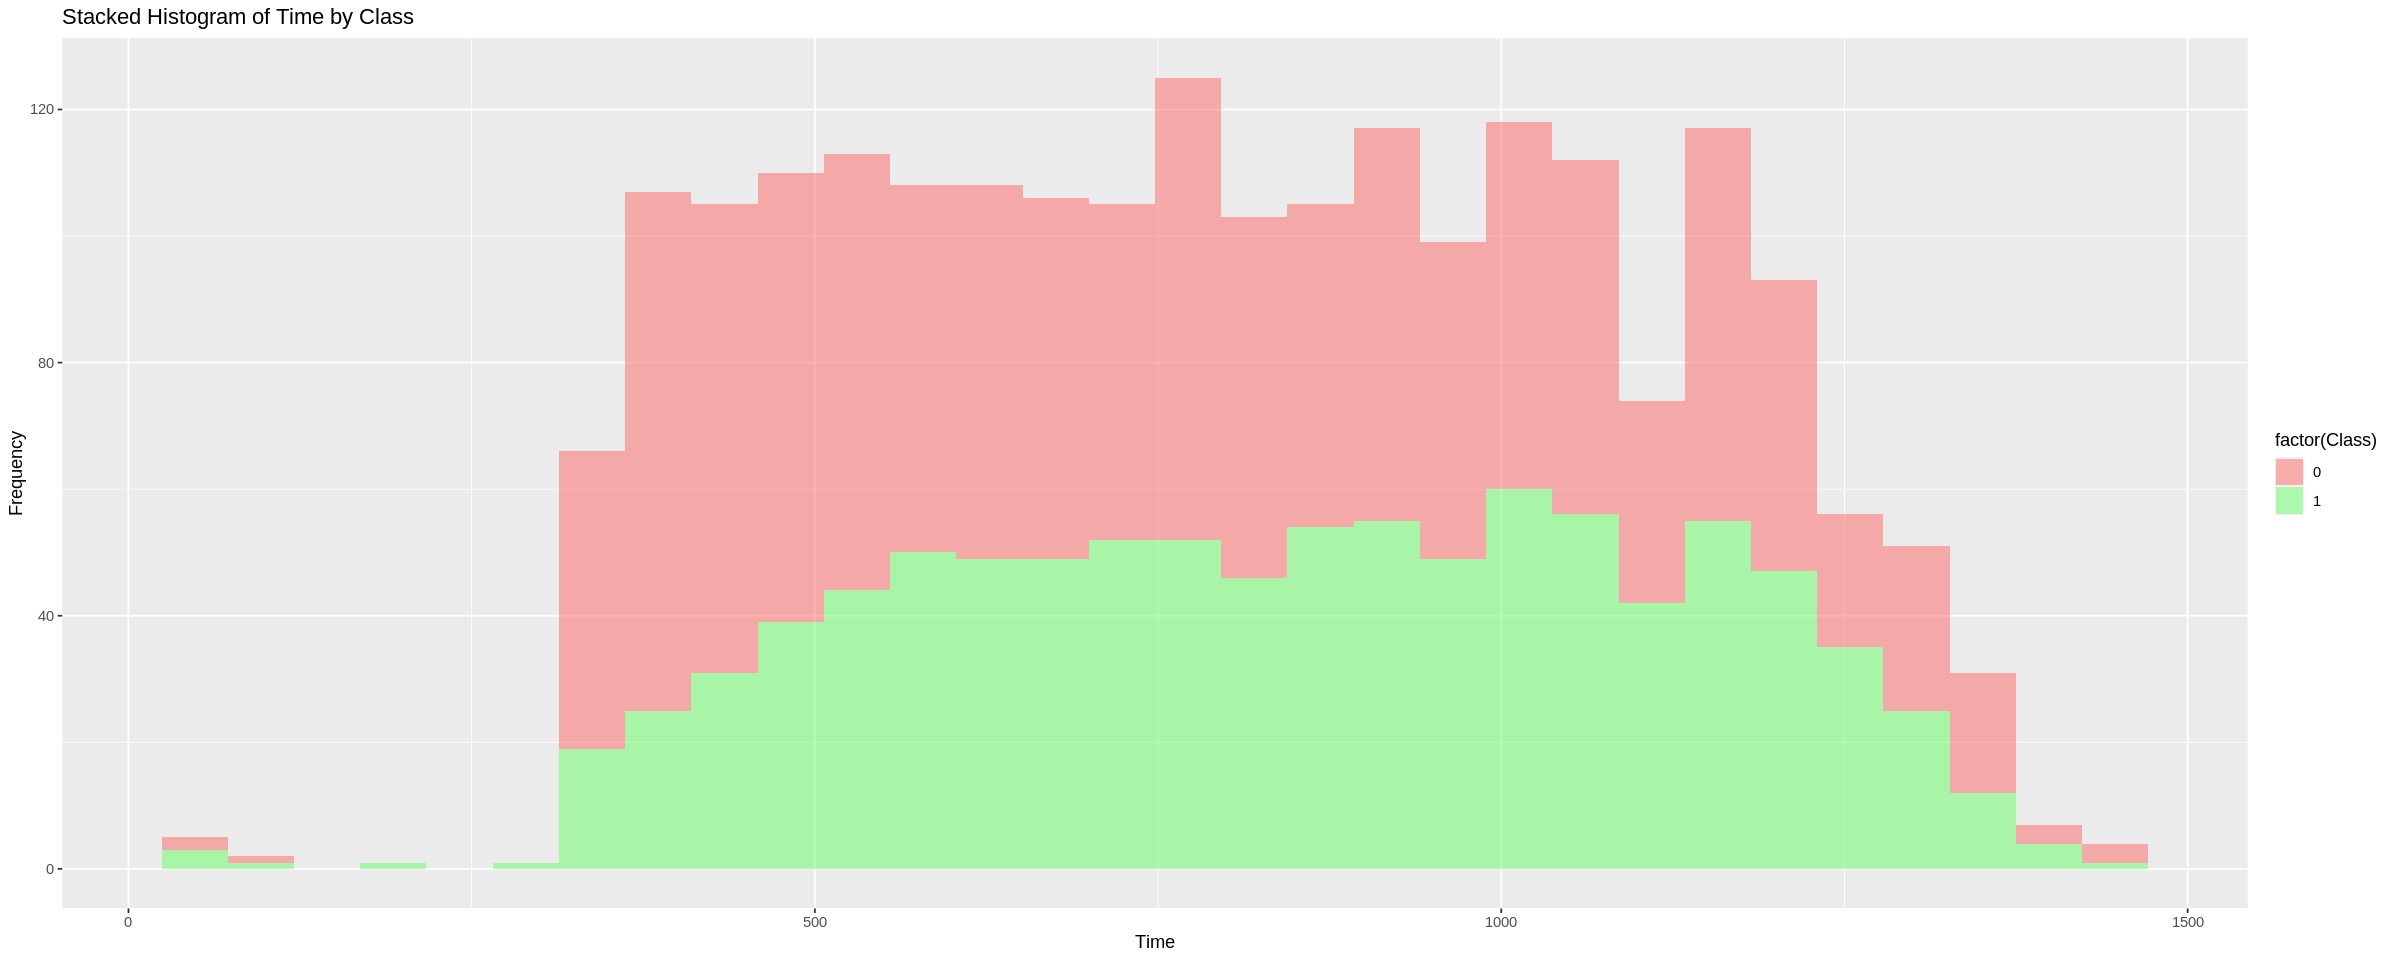

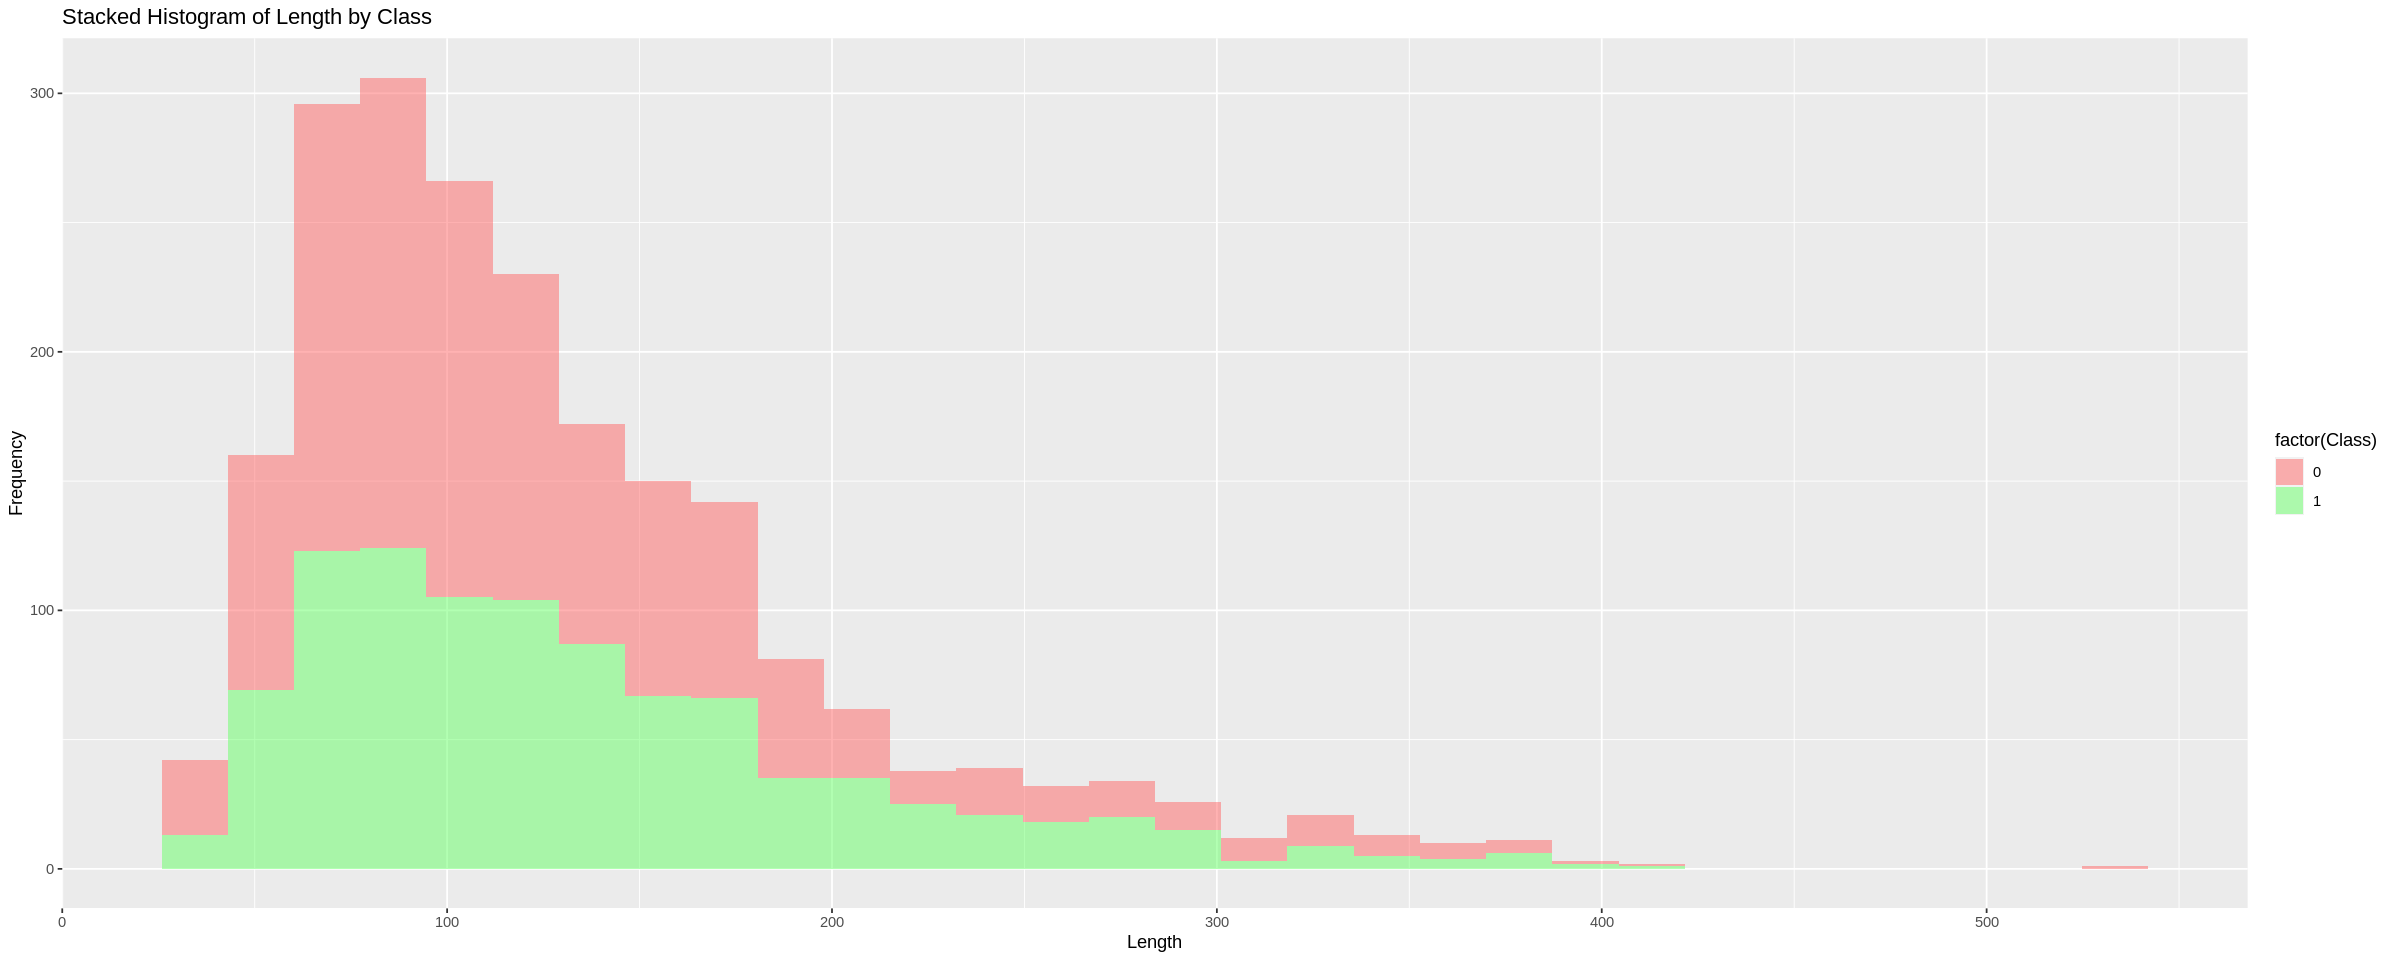

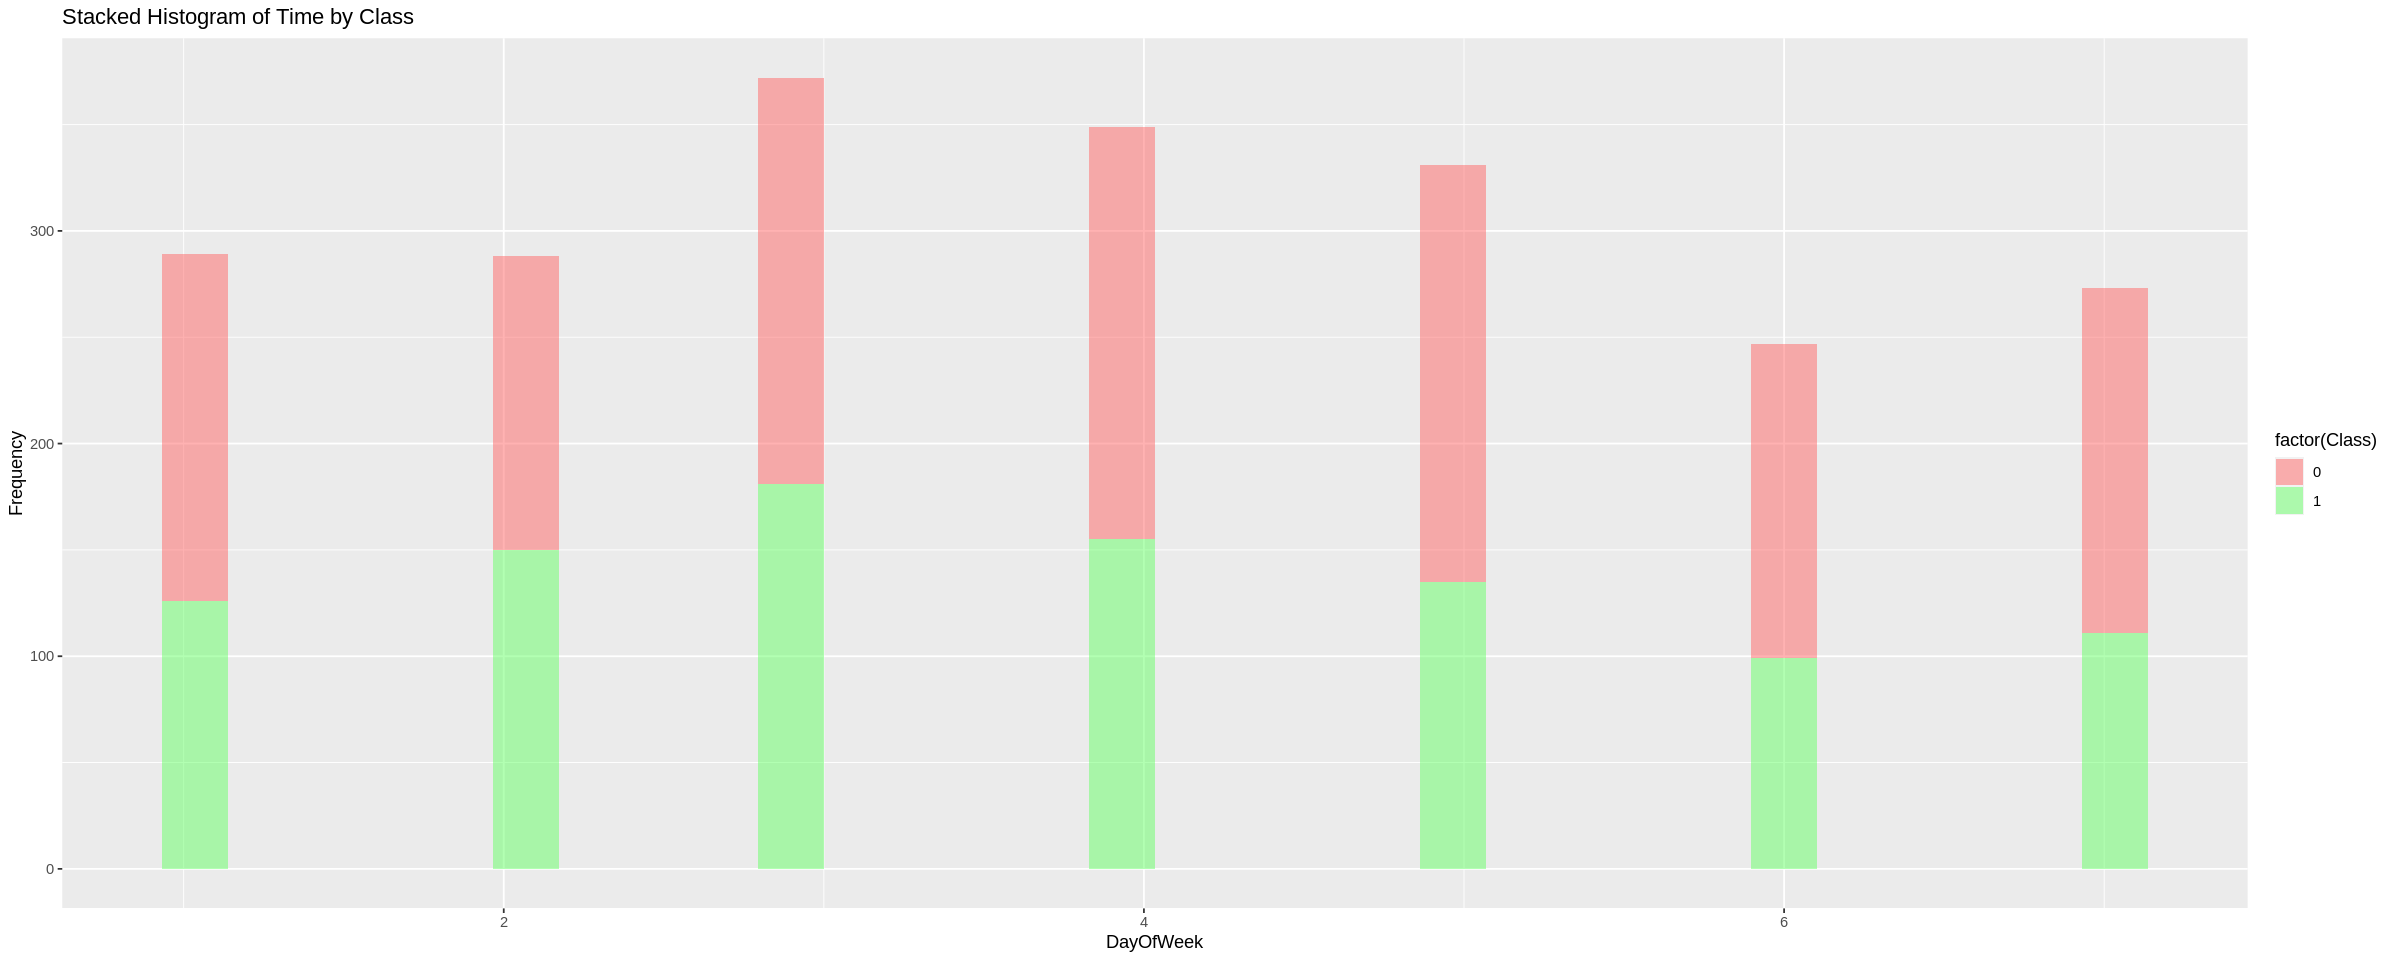

In [ ]:
## Stacked histograms for the target variable

ggplot(numeric_data, aes(x = Flight, fill = factor(Class))) +
  geom_histogram(alpha = 0.5, position = "stack", bins = 30) +
  labs(x = "Flight", y = "Frequency", title = "Stacked Histogram of Flight by Class") +
  scale_fill_manual(values = c("#FF6666", "#66FF66"))

ggplot(numeric_data, aes(x = Time, fill = factor(Class))) +
  geom_histogram(alpha = 0.5, position = "stack", bins = 30) +
  labs(x = "Time", y = "Frequency", title = "Stacked Histogram of Time by Class") +
  scale_fill_manual(values = c("#FF6666", "#66FF66"))

ggplot(numeric_data, aes(x = Length, fill = factor(Class))) +
  geom_histogram(alpha = 0.5, position = "stack", bins = 30) +
  labs(x = "Length", y = "Frequency", title = "Stacked Histogram of Length by Class") +
  scale_fill_manual(values = c("#FF6666", "#66FF66"))

ggplot(numeric_data, aes(x = DayOfWeek, fill = factor(Class))) +
  geom_histogram(alpha = 0.5, position = "stack", bins = 30) +
  labs(x = "DayOfWeek", y = "Frequency", title = "Stacked Histogram of Time by Class") +
  scale_fill_manual(values = c("#FF6666", "#66FF66"))

Analysis of the target variable :

In [ ]:
## After the analysis, we found that the variables with the greatest predictive power are Time and Length.

## This observation was made following the analysis performed on :
## 1. the correlation matrix
## 2. the independence tests
## 3. the loading values of the main components
## 4. the conditional boxplots/stacked histograms between the target variable and the other numerical variables.

## Although the Flight variable contributes the most to the variation in the data, it is not a good predictor of Class compared to the other two variables.

## Unfortunately, due to the restrictions offered by Google Colab, certain experiments failed due to not allowing interaction with 3d graphics or
## memory limitations that stopped our embedding experiments over our data set.

## But through different independence/correlation relationships and different graphs, we managed to deduce the variables with the highest predictive power.
## Categorical variables are easy to notice as they have no predictive power on our target variable Class.

## Class = the variable that tells us if the flight will have a delay or not.